# **Machine Learning**

### Markov Decision Processes (MDPs)

#### **Objective**:
The objective of this project is to apply some of the reinforced learning (RL) techniques to make decisions.

#### **Imports**

In [ ]:
!pip install bettermdptools

  Using cached gymnasium-0.27.1-py3-none-any.whl.metadata (8.5 kB)
Using cached gymnasium-0.27.1-py3-none-any.whl (883 kB)
  Attempting uninstall: gymnasium
    Found existing installation: gymnasium 1.0.0
    Uninstalling gymnasium-1.0.0:
      Successfully uninstalled gymnasium-1.0.0


In [ ]:
# I couldn't load gymnasium before and this line helped. Per ChatGPT, Gymnasium library (a fork of the OpenAI Gym library) is trying to use JAX, and there is likely an incompatibility or version mismatch between Gymnasium and JAX/Numpy in your Google Colab environment.
!pip install --upgrade gymnasium jax jaxlib

  Using cached gymnasium-1.0.0-py3-none-any.whl.metadata (9.5 kB)
Using cached gymnasium-1.0.0-py3-none-any.whl (958 kB)
  Attempting uninstall: gymnasium
    Found existing installation: gymnasium 0.27.1
    Uninstalling gymnasium-0.27.1:
      Successfully uninstalled gymnasium-0.27.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bettermdptools 0.7.2 requires gymnasium<=0.27.1,>=0.26, but you have gymnasium 1.0.0 which is incompatible.


In [ ]:
import gymnasium as gym

In [ ]:
!pip install swig

In [ ]:
!pip install "gymnasium[box2d]"

In [ ]:
# # TEST: INITIALIZE LUNEARLANDER ENVIRONMENT

# # Initialise the environment
# env = gym.make("LunarLander-v3", render_mode="human")

# # Reset the environment to generate the first observation
# observation, info = env.reset(seed=42)
# for _ in range(1000):
#     # this is where you would insert your policy
#     action = env.action_space.sample()

#     # step (transition) through the environment with the action
#     # receiving the next observation, reward and if the episode has terminated or truncated
#     observation, reward, terminated, truncated, info = env.step(action)

#     # If the episode has ended then we can reset to start a new episode
#     if terminated or truncated:
#         observation, info = env.reset()

# env.close()

## **Experiments for Report**

**Part 1: Model-Based Methods**

In this part, the environment is known. There are 2 main components to model in these environments:
- Transition probability matrix
- Reward function


**Part 2: Model-Fee Methods**

In this part, we choose a model-free algorithm, e.g. Q-Learning, SARSA, DQN, etc, to solve the 2 MDPs.

This section emphasizes the agent learning through interacting with the environment.

### **Small MDP problem: Blackjack**

#### Blackjack Description

**Reference:**

https://gymnasium.farama.org/environments/toy_text/blackjack/#


Blackjack is a card game where the goal is to beat the dealer by obtaining cards that sum to closer to 21 (without going over 21) than the dealers cards.

- Action space: Discrete(2)
- Observation space: Tuple(Discrete(32), Discrete(11), Discrete(2))




**Description:**

The game starts with the dealer having one face up and one face down card, while the player has two face up cards. All cards are drawn from an infinite deck (i.e. with replacement).

The card values are:

- Face cards (Jack, Queen, King) have a point value of 10.

- Aces can either count as 11 (called a ‘usable ace’) or 1.

- Numerical cards (2-9) have a value equal to their number.

The player has the sum of cards held. The player can request additional cards (hit) until they decide to stop (stick) or exceed 21 (bust, immediate loss).

After the player sticks, the dealer reveals their facedown card, and draws cards until their sum is 17 or greater. If the dealer goes bust, the player wins.

If neither the player nor the dealer busts, the outcome (win, lose, draw) is decided by whose sum is closer to 21.

**Action Space:**

The action shape is (1,) in the range {0, 1} indicating whether to stick or hit.

- 0: Stick

- 1: Hit

**Observation Space:**

The observation consists of a 3-tuple containing: the player’s current sum, the value of the dealer’s one showing card (1-10 where 1 is ace), and whether the player holds a usable ace (0 or 1).

The observation is returned as (int(), int(), int()).

**Starting State:**

The starting state is initialised with the following values.
- Player current sum: [4,5,...21]
- Dealer showing card value: [1,2,...,10]
- Usable Ace: [0,1]

**Rewards:**

- win game: +1

- lose game: -1

- draw game: 0

- win game with natural blackjack: +1.5 (if natural is True) +1 (if natural is False)

**Episode End:**

The episode ends if the following happens:

- Termination:

1. The player hits and the sum of hand exceeds 21.

2. The player sticks.

An ace will always be counted as usable (11) unless it busts the player.


In [ ]:
# Reference: https://github.com/jlm429/bettermdptools/blob/master/notebooks/blackjack.ipynb
# Reference: https://github.com/jlm429/bettermdptools/blob/master/bettermdptools/envs/blackjack_wrapper.py

import gymnasium as gym
from bettermdptools.envs.blackjack_wrapper import BlackjackWrapper
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.planner import Planner
from bettermdptools.algorithms.rl import RL
import numpy as np

base_env = gym.make('Blackjack-v1', render_mode=None)
blackjack = BlackjackWrapper(base_env)

# run VI
V, V_track, pi = Planner(blackjack.P).value_iteration()

#test policy
test_scores = TestEnv.test_env(env=blackjack, n_iters=100, render=False, pi=pi, user_input=False)
print("Test scores after running VI:")
print(np.mean(test_scores))

# Q-learning
Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning()

#test policy
test_scores = TestEnv.test_env(env=blackjack, n_iters=100, render=False, pi=pi, user_input=False)
print("Test scores after running Q-Learning:")
print(np.mean(test_scores))

Test scores after running VI:
-0.07


Test scores after running Q-Learning:
-0.06


#### Blackjack Sample Code

In [ ]:
# SIMPLE BLACKJACK GAME - SINGLE RUN

print("SIMPLE BLACKJACK GAME - SINGLE RUN\n")

import gymnasium as gym

# Create the Blackjack environment
env = gym.make("Blackjack-v1", render_mode="human")  # render_mode="human" shows actions if supported

# Initialize the environment
state, info = env.reset()
print(f"Initial state: {state}")  # state = (player sum, dealer showing, usable ace)

# Define a simple policy: Hit if the player's sum is below 17, else stick
def basic_policy(state):
    player_sum, dealer_card, usable_ace = state
    if player_sum < 17:
        return 1  # Hit
    else:
        return 0  # Stick

# Play one game of Blackjack
done = False
total_reward = 0

while not done:
    action = basic_policy(state)  # Decide action based on the policy
    print(f"Taking action: {'Hit' if action == 1 else 'Stick'}")

    # Perform the action in the environment
    state, reward, done, _, info = env.step(action)
    print(f"New state: {state}, Reward: {reward}")
    total_reward += reward

# Final result
print(f"Game over. Total reward: {total_reward}")
env.close()


SIMPLE BLACKJACK GAME - SINGLE RUN

Initial state: (12, 10, 0)
Taking action: Hit
New state: (22, 10, 0), Reward: -1.0
Game over. Total reward: -1.0


In [ ]:
# # SIMPLE BLACKJACK GAME - INTERACTIVE VERSION

# print("SIMPLE BLACKJACK GAME - INTERACTIVE VERSION\n")

# # Create the Blackjack environment
# env = gym.make("Blackjack-v1")

# # Initialize the game
# state, info = env.reset()
# print(f"Initial state: {state} (Player Sum, Dealer's Card, Usable Ace)")

# done = False

# # Game loop
# while not done:
#     # Display the current state
#     player_sum, dealer_card, usable_ace = state
#     print(f"\nYour cards sum to: {player_sum} | Dealer's card: {dealer_card}")
#     print(f"Do you have a usable ace? {'Yes' if usable_ace else 'No'}")

#     # Ask for the player's action
#     action = None
#     while action not in ['0', '1']:
#         action = input("What would you like to do? (0: Stick, 1: Hit): ")

#     action = int(action)

#     # Perform the action in the environment
#     state, reward, done, _, info = env.step(action)

#     if not done:
#         print(f"New state: {state} (Player Sum, Dealer's Card, Usable Ace)")

# # Game over
# if reward > 0:
#     print("\nCongratulations, you won!")
# elif reward < 0:
#     print("\nSorry, you lost!")
# else:
#     print("\nIt's a draw!")

# print(f"Final state: {state}")
# print(f"Reward: {reward}")
# env.close()


#### Value Iteration (VI) to Solve Blackjack problem

In [ ]:
# !pip install --upgrade gymnasium jax jaxlib
# from bettermdptools.envs.blackjack_wrapper import BlackjackWrapper
# from bettermdptools.utils.test_env import TestEnv
# from bettermdptools.algorithms.planner import Planner
# from bettermdptools.algorithms.rl import RL
# import numpy as np

# base_env = gym.make('Blackjack-v1', render_mode=None)
# blackjack = BlackjackWrapper(base_env)

# # run VI
# # Per source code "planner.py"
#   # Parameters:
#     # gamma: Discount factor
#     # n_iters: Number of iterations
#     # theta : Convergence criterion for value iteration.
#   # Returns:
#     # V {numpy array}, shape(possible states): State values array
#     # V_track {numpy array}, shape(n_iters, n_states): Log of V(s) for each iteration
#     # pi {lambda}, input state value, output action value: Policy mapping states to actions.
# V, V_track, pi = Planner(blackjack.P).value_iteration(gamma=1.0, n_iters=1000, theta=1e-10)

# #test policy
# # Per source code "test_env.py"
#   # Parameters:
#     # env {OpenAI Gym Environment}: MDP problem
#     # desc {numpy array}: description of the environment (for custom environments)
#     # render {Boolean}, default = False: openAI human render mode
#     # n_iters {int}, default = 10: Number of iterations to simulate the agent for
#     # pi {lambda}: Policy used to calculate action value at a given state
#     # user_input {Boolean}, default = False: Prompt for letting user decide which action to take at a given state
#     # convert_state_obs {lambda}: Optionally used in environments where state observation is transformed.
#   # Returns:
#     # test_scores {numpy array}: Log of rewards from each episode.
# reward_scores = TestEnv.test_env(env=blackjack, n_iters=100, render=False, pi=pi, user_input=False)
# print("Test scores after running VI:")
# print(np.mean(reward_scores))

In [ ]:
# # Understand better the variables and sizes of the output
# print("PLANNER")
# print("base_env:", base_env)
# print("blackjack:", blackjack)
# print("V type:", type(V))
# print("V shape:", V.shape)
# print("V_track type:", type(V_track))
# print("V_track", V_track.shape)
# print("pi type:", type(pi))
# print("pi length", len(pi))
# print("pi keys:", pi.keys())
# print("pi", pi)

# # print(V)
# # print(V_track[10,:])

# print()
# print("TEST POLICY")
# print("test_scores type:", type(test_scores))
# print("test_scores shape:", test_scores.shape)

Gamma 0: Model converged at iteration: 2
Gamma 0.05: Model converged at iteration: 7
Gamma 0.2: Model converged at iteration: 9
Gamma 0.4: Model converged at iteration: 10
Gamma 0.6: Model converged at iteration: 11
Gamma 0.8: Model converged at iteration: 11
Gamma 1.0: Model converged at iteration: 12


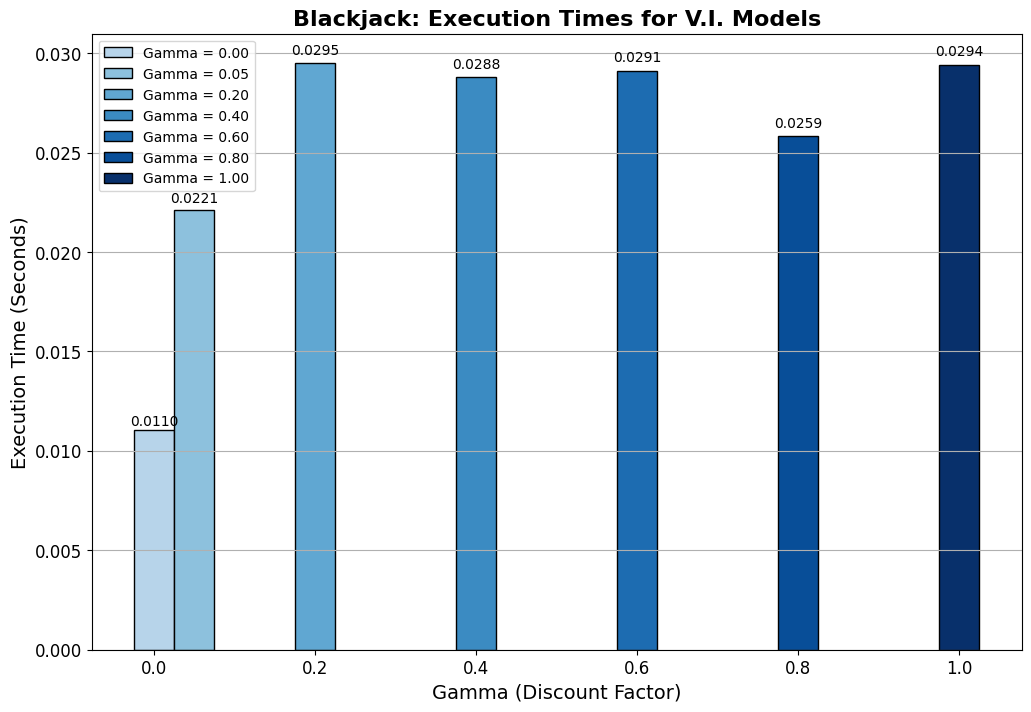

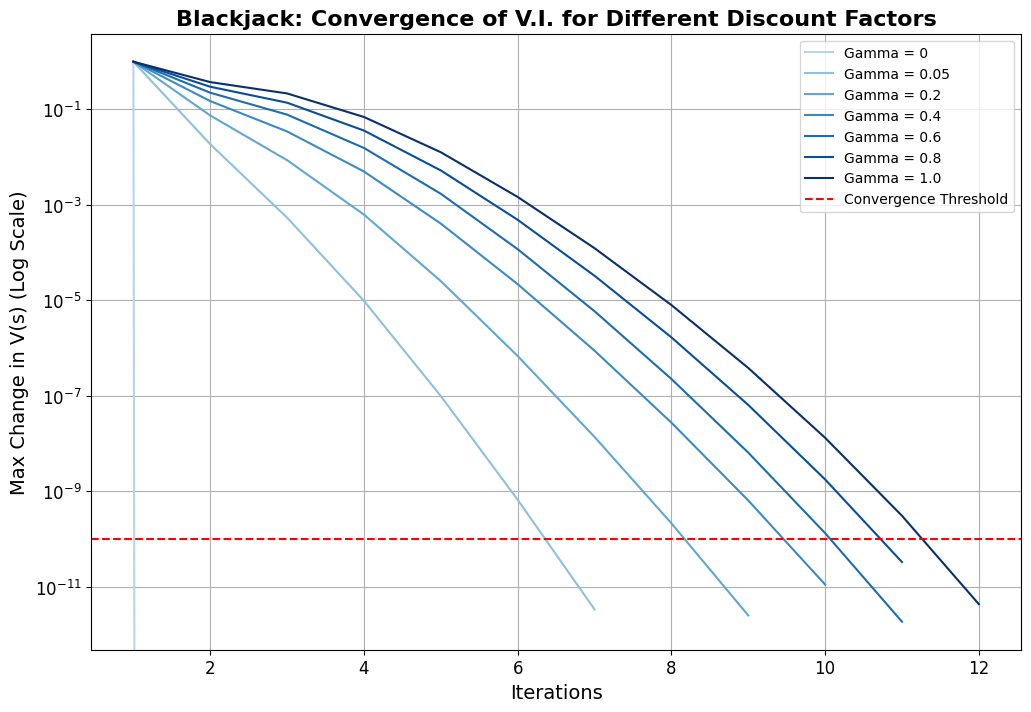


Testing policy for Gamma = 0
Gamma 0: Average reward over 100,000 episodes: -0.04643

Testing policy for Gamma = 0.05
Gamma 0.05: Average reward over 100,000 episodes: -0.04819

Testing policy for Gamma = 0.2
Gamma 0.2: Average reward over 100,000 episodes: -0.0505

Testing policy for Gamma = 0.4
Gamma 0.4: Average reward over 100,000 episodes: -0.04364

Testing policy for Gamma = 0.6
Gamma 0.6: Average reward over 100,000 episodes: -0.05184

Testing policy for Gamma = 0.8
Gamma 0.8: Average reward over 100,000 episodes: -0.04386

Testing policy for Gamma = 1.0
Gamma 1.0: Average reward over 100,000 episodes: -0.04384


In [ ]:
import matplotlib.pyplot as plt
from bettermdptools.envs.blackjack_wrapper import BlackjackWrapper
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.planner import Planner
import gymnasium as gym
import numpy as np
import time  # For tracking execution time


# Parameters for Value Iteration
gammas = [0, 0.05, 0.2, 0.4, 0.6, 0.8, 1.0]  # Discount factors to evaluate
n_iters = 15  # Maximum number of iterations
theta = 1e-10  # Convergence criterion

# Store results for plotting
results = {}
execution_times = []  # To track execution time for each gamma

for gamma in gammas:
    # Track execution time for Value Iteration
    start_time = time.time()

    # Initialize the Blackjack environment
    base_env = gym.make('Blackjack-v1', render_mode=None)
    blackjack = BlackjackWrapper(base_env)


    # Run Value Iteration for the current gamma
    planner = Planner(blackjack.P)
    V, V_track, pi = planner.value_iteration(gamma=gamma, n_iters=n_iters, theta=theta)

    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append((gamma, execution_time))  # Store gamma and its execution time

    # Find the iteration where the model converges
    convergence_iteration = 0
    for i in range(len(V_track) - 1):
        if np.all(V_track[i + 1] == 0):  # Check if the next row is all zeros
            convergence_iteration = i
            break

    # Adjust the convergence_iteration to n_iters if not converged
    if convergence_iteration == 0:
        convergence_iteration = n_iters
        print(f"Gamma {gamma}: Model did not converge within the given iterations.")
    else:
        print(f"Gamma {gamma}: Model converged at iteration: {convergence_iteration}")

    # Compute convergence deltas (up to convergence)
    convergence_deltas = [
        np.max(np.abs(V_track[i] - V_track[i - 1]))
        for i in range(1, convergence_iteration + 1)
    ]

    # Store the results
    results[gamma] = {
        "V": V,
        "V_track": V_track,
        "pi": pi,
        "convergence_deltas": convergence_deltas,
        "convergence_iteration": convergence_iteration,
        "execution_time": execution_time
    }

# Plot Execution Times
gammas_sorted, times_sorted = zip(*sorted(execution_times, key=lambda x: x[0]))  # Sort by gamma for plotting
bar_width = 0.05  # Adjust the width of the bars
colors = plt.cm.Blues(np.linspace(0.3, 1, len(gammas_sorted)))  # Generate a color map

plt.figure(figsize=(12, 8))
for idx, (gamma, time) in enumerate(zip(gammas_sorted, times_sorted)):
    plt.bar(gamma, time, width=bar_width, label=f"Gamma = {gamma:.2f}", color=colors[idx], edgecolor='black')
    # Display time with 3 decimal places on top of each bar
    plt.text(gamma, time + time * 0.01, f"{time:.4f}", ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Gamma (Discount Factor)', fontsize=14)
plt.ylabel('Execution Time (Seconds)', fontsize=14)
plt.title('Blackjack: Execution Times for V.I. Models', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10, loc='upper left')  # Place legend inside the upper-left corner
plt.grid(axis='y')
plt.show()

print()

# Plot Convergence for Different Gammas
colors = plt.cm.Blues(np.linspace(0.3, 1, len(gammas)))
plt.figure(figsize=(12, 8))
for idx, gamma in enumerate(gammas):
    plt.plot(range(1, len(results[gamma]["convergence_deltas"]) + 1),
             results[gamma]["convergence_deltas"],
             label=f"Gamma = {gamma}", color=colors[idx])
plt.axhline(y=theta, color='r', linestyle='--', label=f"Convergence Threshold")
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Max Change in V(s) (Log Scale)', fontsize=14)
plt.yscale('log')
plt.title('Blackjack: Convergence of V.I. for Different Discount Factors', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.show()

# Test and Compare Policies for Each Gamma
for gamma in gammas:
    print(f"\nTesting policy for Gamma = {gamma}")
    reward_scores = TestEnv.test_env(env=blackjack, n_iters=100_000, render=False, pi=results[gamma]["pi"], user_input=False)
    print(f"Gamma {gamma}: Average reward over 100,000 episodes: {np.mean(reward_scores)}")


Test scores after running VI:
-0.037


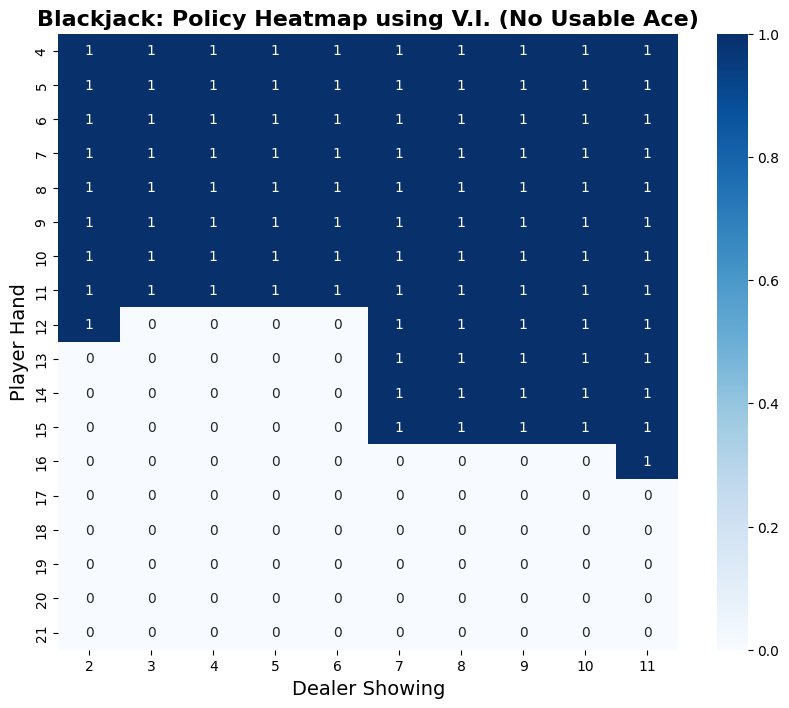

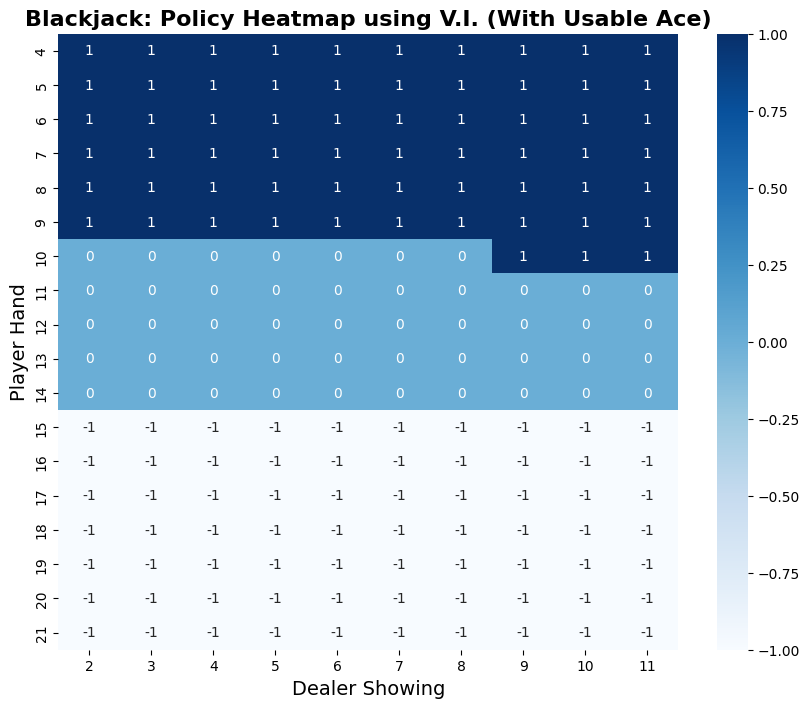

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


base_env = gym.make('Blackjack-v1', render_mode=None)
blackjack = BlackjackWrapper(base_env)

V, V_track, pi = Planner(blackjack.P).value_iteration(gamma=0.6, n_iters=15, theta=1e-10)


reward_scores = TestEnv.test_env(env=blackjack, n_iters=1000, render=False, pi=pi, user_input=False)
print("Test scores after running VI:")
print(np.mean(reward_scores))


# Define player hands and dealer cards
player_hands = list(range(4, 22))  # Player hands: H4-H21
dealer_cards = list(range(2, 12))  # Dealer cards: 2-10, Ace (11)

# Initialize policy matrices
policy_matrix_no_usable_ace = np.full((len(player_hands), len(dealer_cards)), -1)
policy_matrix_usable_ace = np.full((len(player_hands), len(dealer_cards)), -1)

# Decode states and fill the policy matrices
for state, action in pi.items():
    # Decode the state based on BlackjackWrapper logic
    if state < 180:  # States without a usable ace
        player_index = state // 10  # Integer division to get the player hand
        dealer_index = state % 10  # Modulo to get the dealer card
        if 0 <= player_index < len(player_hands) and 0 <= dealer_index < len(dealer_cards):
            policy_matrix_no_usable_ace[player_index, dealer_index] = action
    else:  # States with a usable ace
        player_index = (state - 180) // 10
        dealer_index = (state - 180) % 10
        if 0 <= player_index < len(player_hands) and 0 <= dealer_index < len(dealer_cards):
            policy_matrix_usable_ace[player_index, dealer_index] = action

# Plot heatmap for policy without usable ace
plt.figure(figsize=(10, 8))
sns.heatmap(policy_matrix_no_usable_ace, annot=True, fmt="d", cmap="Blues",
            xticklabels=dealer_cards, yticklabels=player_hands)
plt.title("Blackjack: Policy Heatmap using V.I. (No Usable Ace)", fontsize=16, fontweight='bold')
plt.xlabel("Dealer Showing", fontsize=14)
plt.ylabel("Player Hand", fontsize=14)
plt.show()

print()

# Plot heatmap for policy with usable ace
plt.figure(figsize=(10, 8))
sns.heatmap(policy_matrix_usable_ace, annot=True, fmt="d", cmap="Blues",
            xticklabels=dealer_cards, yticklabels=player_hands)
plt.title("Blackjack: Policy Heatmap using V.I. (With Usable Ace)", fontsize=16, fontweight='bold')
plt.xlabel("Dealer Showing", fontsize=14)
plt.ylabel("Player Hand", fontsize=14)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from bettermdptools.envs.blackjack_wrapper import BlackjackWrapper
from bettermdptools.algorithms.planner import Planner
import gymnasium as gym
import numpy as np
import time  # For tracking execution time


# Parameters for Value Iteration
gammas = [0, 0.05, 0.2, 0.3, 0.4, 0.6, 0.8, 1.0]  # Discount factors to evaluate
n_iters = 15  # Maximum number of iterations
theta = 1e-10  # Convergence criterion

# Store policies for comparison
policies = {}
policy_duplicates = {}  # To track which gammas share the same policy

# Run Value Iteration for each gamma
for gamma in gammas:

    # Initialize the Blackjack environment
    base_env = gym.make('Blackjack-v1', render_mode=None)
    blackjack = BlackjackWrapper(base_env)

    # Run Value Iteration
    planner = Planner(blackjack.P)
    _, _, pi = planner.value_iteration(gamma=gamma, n_iters=n_iters, theta=theta)

    # Check if this policy already exists
    duplicate_gamma = None
    for prev_gamma, prev_pi in policies.items():
        if pi == prev_pi:  # Policies are identical
            duplicate_gamma = prev_gamma
            break

    # Store policy and duplicate info
    if duplicate_gamma is None:
        policies[gamma] = pi  # New unique policy
        policy_duplicates[gamma] = [gamma]  # Initialize with itself
    else:
        policy_duplicates[duplicate_gamma].append(gamma)  # Add gamma to duplicate list

# Display Results
print("Policies grouped by identical results:")
for base_gamma, duplicate_gammas in policy_duplicates.items():
    print(f"Base Gamma {base_gamma:.2f}: Duplicate Gammas: {', '.join([f'{g:.2f}' for g in duplicate_gammas])}")


Policies grouped by identical results:
Base Gamma 0.00: Duplicate Gammas: 0.00, 0.05
Base Gamma 0.20: Duplicate Gammas: 0.20
Base Gamma 0.30: Duplicate Gammas: 0.30
Base Gamma 0.40: Duplicate Gammas: 0.40
Base Gamma 0.60: Duplicate Gammas: 0.60
Base Gamma 0.80: Duplicate Gammas: 0.80
Base Gamma 1.00: Duplicate Gammas: 1.00


#### Policy Iteration (PI) to Solve Blackjack problem

In [ ]:
# import matplotlib.pyplot as plt
# from bettermdptools.envs.blackjack_wrapper import BlackjackWrapper
# from bettermdptools.utils.test_env import TestEnv
# from bettermdptools.algorithms.planner import Planner
# import gymnasium as gym
# import numpy as np
# import time  # For tracking execution time

# # Initialize the Blackjack environment
# base_env = gym.make('Blackjack-v1', render_mode=None)
# blackjack = BlackjackWrapper(base_env)

# # Parameters for Policy Iteration
# gammas = [0, 0.05, 0.2, 0.4, 0.6, 0.8, 1.0]  # Discount factors to evaluate
# n_iters = 10  # Maximum number of iterations
# theta = 1e-10  # Convergence criterion for policy evaluation

# # Store results for plotting
# results = {}
# execution_times = []  # To track execution time for each gamma

# for gamma in gammas:
#     # Track execution time for Policy Iteration
#     start_time = time.time()

#     # Run Policy Iteration for the current gamma
#     planner = Planner(blackjack.P)
#     V, V_track, pi = planner.policy_iteration(gamma=gamma, n_iters=n_iters, theta=theta)

#     end_time = time.time()
#     execution_time = end_time - start_time
#     execution_times.append((gamma, execution_time))  # Store gamma and its execution time

#     # Convergence for Policy Iteration: Defined when the policy stops changing
#     convergence_iteration = len(V_track) - 1 if len(V_track) > 1 else 0
#     print(f"Gamma {gamma}: Model converged at iteration: {convergence_iteration}")

#     # Compute convergence deltas (up to convergence)
#     convergence_deltas = [
#         np.max(np.abs(V_track[i] - V_track[i - 1]))
#         for i in range(1, len(V_track))
#     ]

#     # Store the results
#     results[gamma] = {
#         "V": V,
#         "V_track": V_track,
#         "pi": pi,
#         "convergence_deltas": convergence_deltas,
#         "convergence_iteration": convergence_iteration,
#         "execution_time": execution_time
#     }

# # Plot Execution Times
# gammas_sorted, times_sorted = zip(*sorted(execution_times, key=lambda x: x[0]))  # Sort by gamma for plotting
# bar_width = 0.05  # Adjust the width of the bars
# colors = plt.cm.Blues(np.linspace(0.3, 1, len(gammas_sorted)))  # Generate a color map

# plt.figure(figsize=(12, 8))
# for idx, (gamma, time) in enumerate(zip(gammas_sorted, times_sorted)):
#     plt.bar(gamma, time, width=bar_width, label=f"Gamma = {gamma:.2f}", color=colors[idx], edgecolor='black')

# plt.xlabel('Gamma (Discount Factor)', fontsize=14)
# plt.ylabel('Execution Time (Seconds)', fontsize=14)
# plt.title('Blackjack: Execution Times for P.I. Models', fontsize=16, fontweight='bold')
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.legend(fontsize=10, loc='upper left')  # Place legend inside the upper-left corner
# plt.grid(axis='y')
# plt.show()

# # Plot Convergence for Different Gammas
# plt.figure(figsize=(12, 8))
# for idx, gamma in enumerate(gammas):
#     plt.plot(range(1, len(results[gamma]["convergence_deltas"]) + 1),
#              results[gamma]["convergence_deltas"],
#              label=f"Gamma = {gamma}", color=colors[idx])
# plt.axhline(y=theta, color='r', linestyle='--', label=f"Convergence Threshold")
# plt.xlabel('Iterations', fontsize=14)
# plt.ylabel('Max Change in V(s) (Log Scale)', fontsize=14)
# # plt.yscale('log')
# plt.title('Blackjack: Convergence of P.I. for Different Discount Factors', fontsize=16, fontweight='bold')
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.legend(fontsize=10)
# plt.grid()
# plt.show()

# # Test and Compare Policies for Each Gamma
# for gamma in gammas:
#     print(f"\nTesting policy for Gamma = {gamma}")
#     reward_scores = TestEnv.test_env(env=blackjack, n_iters=10_000, render=False, pi=results[gamma]["pi"], user_input=False)
#     print(f"Gamma {gamma}: Average reward over 10,000 episodes: {np.mean(reward_scores)}")


Gamma 0: Model converged at iteration: 2
Gamma 0.05: Model converged at iteration: 3
Gamma 0.2: Model converged at iteration: 3
Gamma 0.4: Model converged at iteration: 3
Gamma 0.6: Model converged at iteration: 3
Gamma 0.8: Model converged at iteration: 3
Gamma 1.0: Model converged at iteration: 4


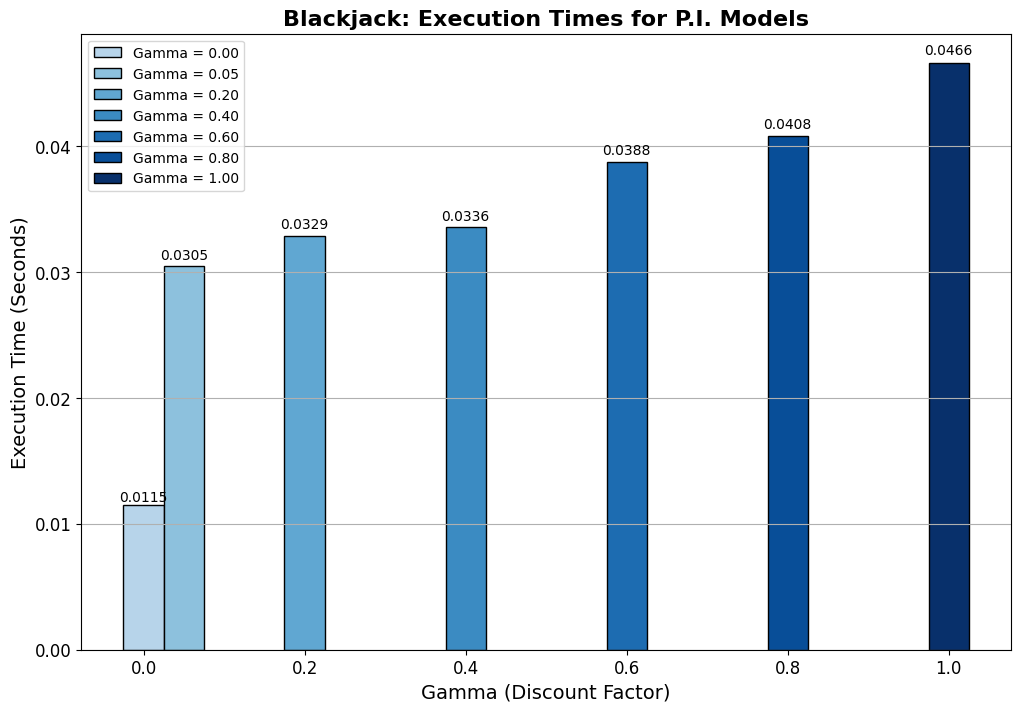

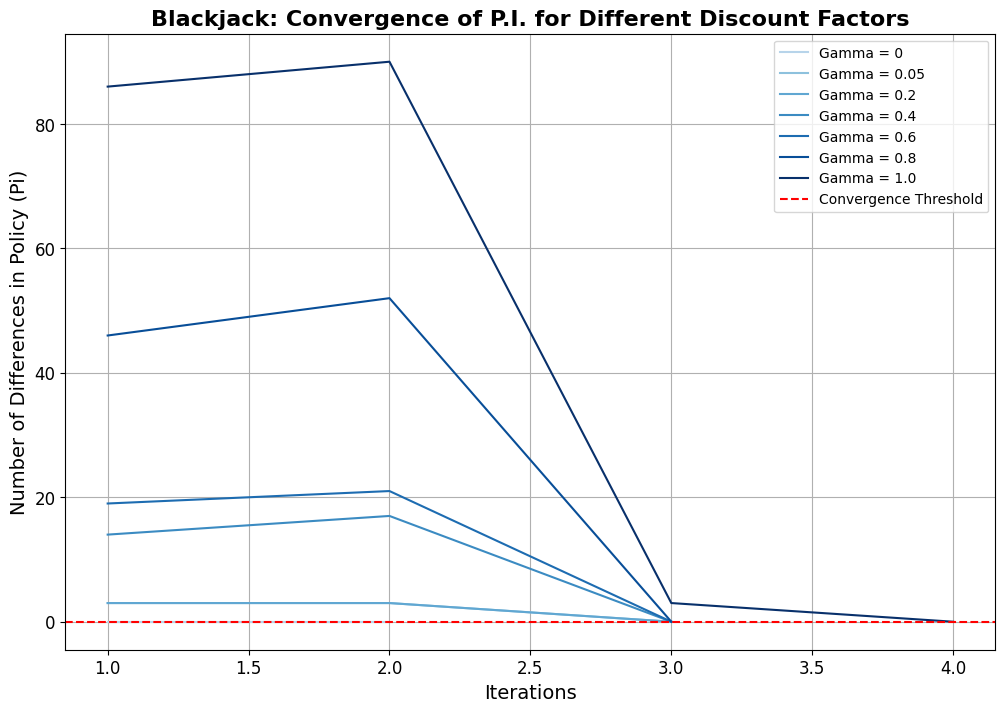


Testing policy for Gamma = 0
Gamma 0: Average reward over 100,000 episodes: -0.04344

Testing policy for Gamma = 0.05
Gamma 0.05: Average reward over 100,000 episodes: -0.0513

Testing policy for Gamma = 0.2
Gamma 0.2: Average reward over 100,000 episodes: -0.04816

Testing policy for Gamma = 0.4
Gamma 0.4: Average reward over 100,000 episodes: -0.04379

Testing policy for Gamma = 0.6
Gamma 0.6: Average reward over 100,000 episodes: -0.04975

Testing policy for Gamma = 0.8
Gamma 0.8: Average reward over 100,000 episodes: -0.04828

Testing policy for Gamma = 1.0
Gamma 1.0: Average reward over 100,000 episodes: -0.04399


In [ ]:
import matplotlib.pyplot as plt
from bettermdptools.envs.blackjack_wrapper import BlackjackWrapper
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.planner import Planner
import gymnasium as gym
import numpy as np
import time  # For tracking execution time


# Parameters for Policy Iteration
gammas = [0, 0.05, 0.2, 0.4, 0.6, 0.8, 1.0]  # Discount factors to evaluate
n_iters = 10  # Maximum number of iterations
theta = 1e-10  # Convergence criterion for policy evaluation

# Store results for plotting
results = {}
execution_times = []  # To track execution time for each gamma

for gamma in gammas:
    # Track execution time for Policy Iteration
    start_time = time.time()

    # Initialize the Blackjack environment
    base_env = gym.make('Blackjack-v1', render_mode=None)
    blackjack = BlackjackWrapper(base_env)

    # Run Policy Iteration for the current gamma
    planner = Planner(blackjack.P)
    V, V_track, pi = planner.policy_iteration(gamma=gamma, n_iters=n_iters, theta=theta)

    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append((gamma, execution_time))  # Store gamma and its execution time



    # Find the convergence iteration based on V_track being all zeros
    convergence_iteration = 0
    for i in range(1, len(V_track)):
        if np.all(V_track[i] == 0):
            convergence_iteration = i - 1
            break

    # If no convergence detected, set it to n_iters
    if convergence_iteration == 0:
        convergence_iteration = n_iters
        print(f"Gamma {gamma}: Model did not converge within the given iterations.")
    else:
        print(f"Gamma {gamma}: Model converged at iteration: {convergence_iteration}")



    # Track the number of differences in pi between successive iterations
    differences_in_pi = []
    for i in range(1, len(V_track)):
        if np.all(V_track[i] == 0):  # Stop when V_track is all zeros
            break
        pi_current = planner.policy_improvement(V_track[i], gamma)
        pi_previous = planner.policy_improvement(V_track[i - 1], gamma)
        differences = sum(1 for s in pi_current.keys() if pi_current[s] != pi_previous[s])
        differences_in_pi.append(differences)

    # Store the results
    results[gamma] = {
        "V": V,
        "V_track": V_track,
        "pi": pi,
        "convergence_iteration": convergence_iteration,
        "execution_time": execution_time,
        "differences_in_pi": differences_in_pi
    }

# Plot Execution Times
gammas_sorted, times_sorted = zip(*sorted(execution_times, key=lambda x: x[0]))  # Sort by gamma for plotting
bar_width = 0.05  # Adjust the width of the bars
colors = plt.cm.Blues(np.linspace(0.3, 1, len(gammas_sorted)))  # Generate a color map

plt.figure(figsize=(12, 8))
for idx, (gamma, time) in enumerate(zip(gammas_sorted, times_sorted)):
    plt.bar(gamma, time, width=bar_width, label=f"Gamma = {gamma:.2f}", color=colors[idx], edgecolor='black')
    # Display time with 3 decimal places on top of each bar
    plt.text(gamma, time + time * 0.01, f"{time:.4f}", ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Gamma (Discount Factor)', fontsize=14)
plt.ylabel('Execution Time (Seconds)', fontsize=14)
plt.title('Blackjack: Execution Times for P.I. Models', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10, loc='upper left')  # Place legend inside the upper-left corner
plt.grid(axis='y')
plt.show()

print()
# Plot the number of differences in pi for each gamma (from CODE 2)
plt.figure(figsize=(12, 8))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(gammas)))  # Generate a color map

for idx, gamma in enumerate(gammas):
    plt.plot(range(1, len(results[gamma]["differences_in_pi"]) + 1),
             results[gamma]["differences_in_pi"],
             label=f"Gamma = {gamma}", color=colors[idx])
plt.axhline(y=theta, color='r', linestyle='--', label=f"Convergence Threshold")
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Number of Differences in Policy (Pi)', fontsize=14)
plt.title('Blackjack: Convergence of P.I. for Different Discount Factors', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.show()

# Test and Compare Policies for Each Gamma
for gamma in gammas:
    print(f"\nTesting policy for Gamma = {gamma}")
    reward_scores = TestEnv.test_env(env=blackjack, n_iters=100_000, render=False, pi=results[gamma]["pi"], user_input=False)
    print(f"Gamma {gamma}: Average reward over 100,000 episodes: {np.mean(reward_scores)}")


Test scores after running P.I.:
-0.057


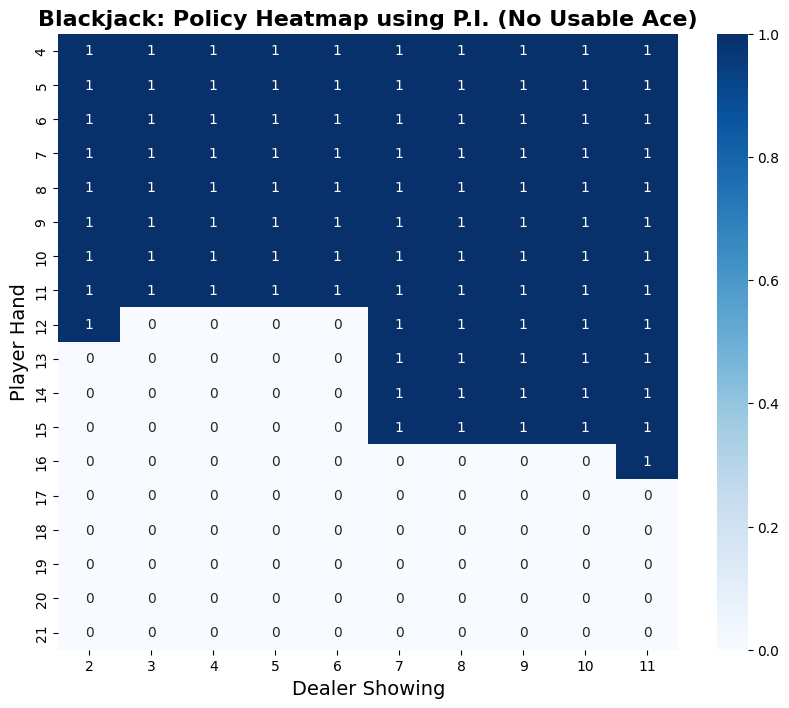

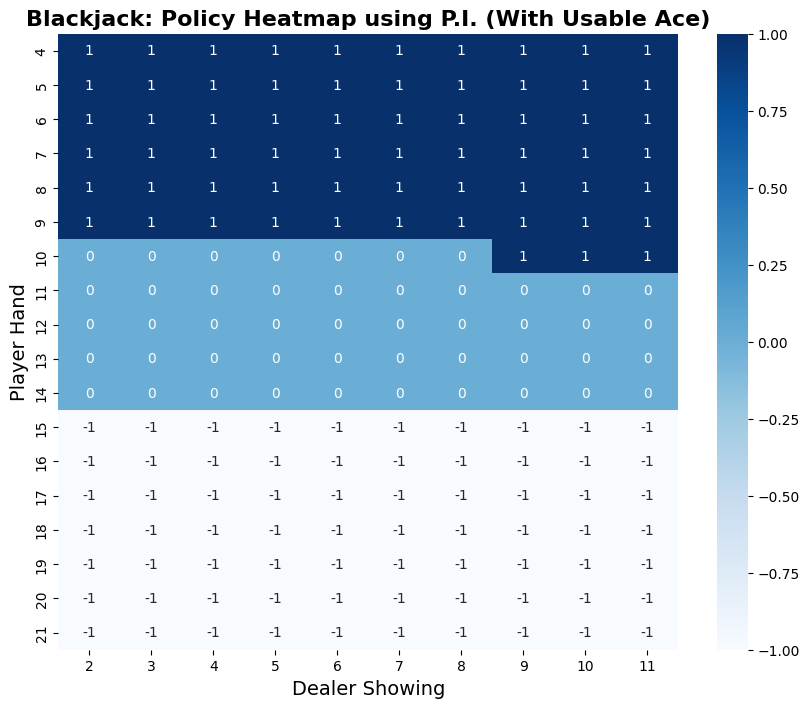

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bettermdptools.envs.blackjack_wrapper import BlackjackWrapper
from bettermdptools.algorithms.planner import Planner
from bettermdptools.utils.test_env import TestEnv
import gymnasium as gym

# Initialize the Blackjack environment
base_env = gym.make('Blackjack-v1', render_mode=None)
blackjack = BlackjackWrapper(base_env)

# Run Policy Iteration with gamma=0.6
gamma = 0.6
n_iters = 15
theta = 1e-10

planner = Planner(blackjack.P)
V, V_track, pi = planner.policy_iteration(gamma=gamma, n_iters=n_iters, theta=theta)

# Test the policy
reward_scores = TestEnv.test_env(env=blackjack, n_iters=1000, render=False, pi=pi, user_input=False)
print("Test scores after running P.I.:")
print(np.mean(reward_scores))

# Define player hands and dealer cards
player_hands = list(range(4, 22))  # Player hands: H4-H21
dealer_cards = list(range(2, 12))  # Dealer cards: 2-10, Ace (11)

# Initialize policy matrices
policy_matrix_no_usable_ace = np.full((len(player_hands), len(dealer_cards)), -1)
policy_matrix_usable_ace = np.full((len(player_hands), len(dealer_cards)), -1)

# Decode states and fill the policy matrices
for state, action in pi.items():
    # Decode the state based on BlackjackWrapper logic
    if state < 180:  # States without a usable ace
        player_index = state // 10  # Integer division to get the player hand
        dealer_index = state % 10  # Modulo to get the dealer card
        if 0 <= player_index < len(player_hands) and 0 <= dealer_index < len(dealer_cards):
            policy_matrix_no_usable_ace[player_index, dealer_index] = action
    else:  # States with a usable ace
        player_index = (state - 180) // 10
        dealer_index = (state - 180) % 10
        if 0 <= player_index < len(player_hands) and 0 <= dealer_index < len(dealer_cards):
            policy_matrix_usable_ace[player_index, dealer_index] = action

# Plot heatmap for policy without usable ace
plt.figure(figsize=(10, 8))
sns.heatmap(policy_matrix_no_usable_ace, annot=True, fmt="d", cmap="Blues",
            xticklabels=dealer_cards, yticklabels=player_hands)
plt.title("Blackjack: Policy Heatmap using P.I. (No Usable Ace)", fontsize=16, fontweight='bold')
plt.xlabel("Dealer Showing", fontsize=14)
plt.ylabel("Player Hand", fontsize=14)
plt.show()

print()

# Plot heatmap for policy with usable ace
plt.figure(figsize=(10, 8))
sns.heatmap(policy_matrix_usable_ace, annot=True, fmt="d", cmap="Blues",
            xticklabels=dealer_cards, yticklabels=player_hands)
plt.title("Blackjack: Policy Heatmap using P.I. (With Usable Ace)", fontsize=16, fontweight='bold')
plt.xlabel("Dealer Showing", fontsize=14)
plt.ylabel("Player Hand", fontsize=14)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from bettermdptools.envs.blackjack_wrapper import BlackjackWrapper
from bettermdptools.algorithms.planner import Planner
import gymnasium as gym
import numpy as np
import time  # For tracking execution time

# Parameters for Policy Iteration
gammas = [0, 0.05, 0.2, 0.3, 0.4, 0.6, 0.8, 1.0]  # Discount factors to evaluate
n_iters = 15  # Maximum number of iterations
theta = 1e-10  # Convergence criterion

# Store policies for comparison
policies = {}
policy_duplicates = {}  # To track which gammas share the same policy

# Run Policy Iteration for each gamma
for gamma in gammas:
    # Initialize the Blackjack environment
    base_env = gym.make('Blackjack-v1', render_mode=None)
    blackjack = BlackjackWrapper(base_env)

    # Run Policy Iteration
    planner = Planner(blackjack.P)
    _, _, pi = planner.policy_iteration(gamma=gamma, n_iters=n_iters, theta=theta)

    # Check if this policy already exists
    duplicate_gamma = None
    for prev_gamma, prev_pi in policies.items():
        if pi == prev_pi:  # Policies are identical
            duplicate_gamma = prev_gamma
            break

    # Store policy and duplicate info
    if duplicate_gamma is None:
        policies[gamma] = pi  # New unique policy
        policy_duplicates[gamma] = [gamma]  # Initialize with itself
    else:
        policy_duplicates[duplicate_gamma].append(gamma)  # Add gamma to duplicate list

# Display Results
print("Policies grouped by identical results:")
for base_gamma, duplicate_gammas in policy_duplicates.items():
    print(f"Base Gamma {base_gamma:.2f}: Duplicate Gammas: {', '.join([f'{g:.2f}' for g in duplicate_gammas])}")


Policies grouped by identical results:
Base Gamma 0.00: Duplicate Gammas: 0.00, 0.05
Base Gamma 0.20: Duplicate Gammas: 0.20
Base Gamma 0.30: Duplicate Gammas: 0.30
Base Gamma 0.40: Duplicate Gammas: 0.40
Base Gamma 0.60: Duplicate Gammas: 0.60
Base Gamma 0.80: Duplicate Gammas: 0.80
Base Gamma 1.00: Duplicate Gammas: 1.00


#### Q-Learning (RL algorithm) to Solve Blackjack problem

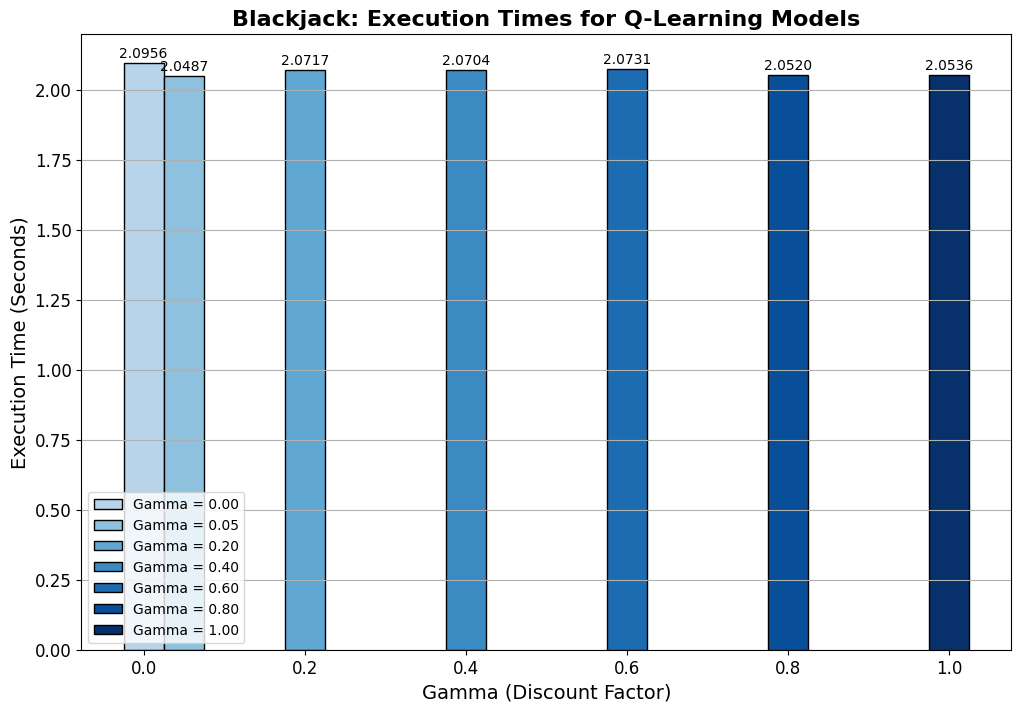

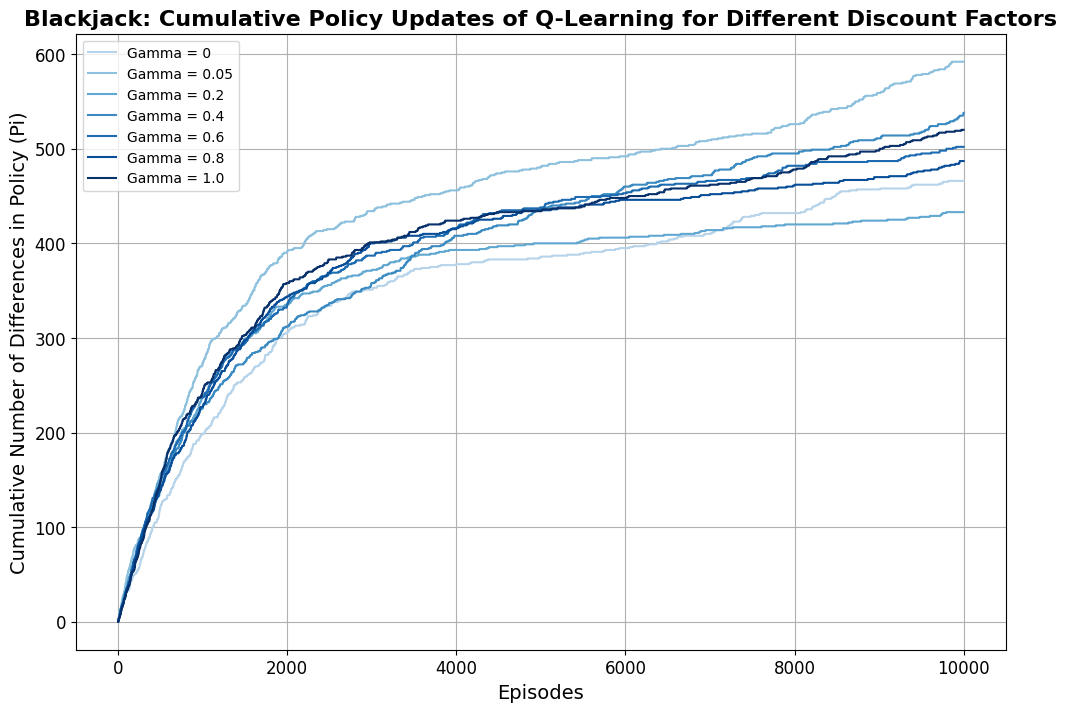


Testing policy for Gamma = 0
Gamma 0: Average reward over 100,000 episodes: -0.07027

Testing policy for Gamma = 0.05
Gamma 0.05: Average reward over 100,000 episodes: -0.0643

Testing policy for Gamma = 0.2
Gamma 0.2: Average reward over 100,000 episodes: -0.06422

Testing policy for Gamma = 0.4
Gamma 0.4: Average reward over 100,000 episodes: -0.0758

Testing policy for Gamma = 0.6
Gamma 0.6: Average reward over 100,000 episodes: -0.0661

Testing policy for Gamma = 0.8
Gamma 0.8: Average reward over 100,000 episodes: -0.07945

Testing policy for Gamma = 1.0
Gamma 1.0: Average reward over 100,000 episodes: -0.0736


In [ ]:
import matplotlib.pyplot as plt
from bettermdptools.envs.blackjack_wrapper import BlackjackWrapper
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.rl import RL  # For Q-Learning
import gymnasium as gym
import numpy as np
import time  # For tracking execution time


# Parameters for Q-Learning
gammas = [0, 0.05, 0.2, 0.4, 0.6, 0.8, 1.0]  # Discount factors to evaluate
n_episodes = 10_000  # Maximum number of episodes for training
# n_episodes = 4  # test
theta = 1e-10  # Convergence criterion

# Store results for plotting
results = {}
execution_times = []  # To track execution time for each gamma

for gamma in gammas:

    # Track execution time for Q-Learning
    start_time = time.time()

    # Initialize the Blackjack environment
    base_env = gym.make('Blackjack-v1', render_mode=None)
    blackjack = BlackjackWrapper(base_env)

    # Run Q-Learning for the current gamma
    rl = RL(blackjack)
    Q, V, pi, Q_track, pi_track = rl.q_learning(gamma = gamma,                                                # Discount factor
                                                init_alpha=0.5, min_alpha=0.01, alpha_decay_ratio=0.5,        # Learning rate exponential decay
                                                init_epsilon=1.0, min_epsilon=0.1, epsilon_decay_ratio=0.9,   # Epsilon-greedy strategy for exploration rate exponential decay
                                                n_episodes=n_episodes)

    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append((gamma, execution_time))  # Store gamma and its execution time

    # Track the number of differences in pi between successive iterations
    differences_in_pi = []
    cum_differences_in_pi = []  # List to store cumulative differences

    for i in range(1, len(pi_track)):
        # print(i)
        pi_current = pi_track[i]
        # print("pi_current:", pi_current)
        pi_previous = pi_track[i - 1]
        # print("pi_previous:", pi_previous)

        # Compute differences: Count mismatched elements
        differences = np.sum(pi_current != pi_previous)
        # print("differences:", differences)
        differences_in_pi.append(differences)

        # Compute cumulative differences
        cumulative_difference = sum(differences_in_pi)
        cum_differences_in_pi.append(cumulative_difference)


    # Store the results
    results[gamma] = {
      "Q": Q,
      "V": V,
      "pi": pi,
      "execution_time": execution_time,
      "differences_in_pi": differences_in_pi,
      "cum_differences_in_pi": cum_differences_in_pi  # Add cumulative differences
    }


# Plot Execution Times
gammas_sorted, times_sorted = zip(*sorted(execution_times, key=lambda x: x[0]))  # Sort by gamma for plotting
bar_width = 0.05  # Adjust the width of the bars
colors = plt.cm.Blues(np.linspace(0.3, 1, len(gammas_sorted)))  # Generate a color map

plt.figure(figsize=(12, 8))
for idx, (gamma, time) in enumerate(zip(gammas_sorted, times_sorted)):
    plt.bar(gamma, time, width=bar_width, label=f"Gamma = {gamma:.2f}", color=colors[idx], edgecolor='black')
    # Display time with 3 decimal places on top of each bar
    plt.text(gamma, time + 0.01, f"{time:.4f}", ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Gamma (Discount Factor)', fontsize=14)
plt.ylabel('Execution Time (Seconds)', fontsize=14)
plt.title('Blackjack: Execution Times for Q-Learning Models', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10, loc='lower left')  # Place legend inside the upper-left corner
plt.grid(axis='y')
plt.show()

# Plot the number of cumulative differences in pi for each gamma
plt.figure(figsize=(12, 8))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(gammas)))  # Generate a color map

for idx, gamma in enumerate(gammas):
    plt.plot(range(1, len(results[gamma]["cum_differences_in_pi"]) + 1),
             results[gamma]["cum_differences_in_pi"],
             label=f"Gamma = {gamma}", color=colors[idx])

plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Cumulative Number of Differences in Policy (Pi)', fontsize=14)
plt.title('Blackjack: Cumulative Policy Updates of Q-Learning for Different Discount Factors', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.show()

# Test and Compare Policies for Each Gamma
for gamma in gammas:
    print(f"\nTesting policy for Gamma = {gamma}")
    reward_scores = TestEnv.test_env(env=blackjack, n_iters=100_000, render=False, pi=results[gamma]["pi"], user_input=False)
    print(f"Gamma {gamma}: Average reward over 100,000 episodes: {np.mean(reward_scores)}")


Test scores after running Q-Learning (Gamma = 0.6):
-0.058


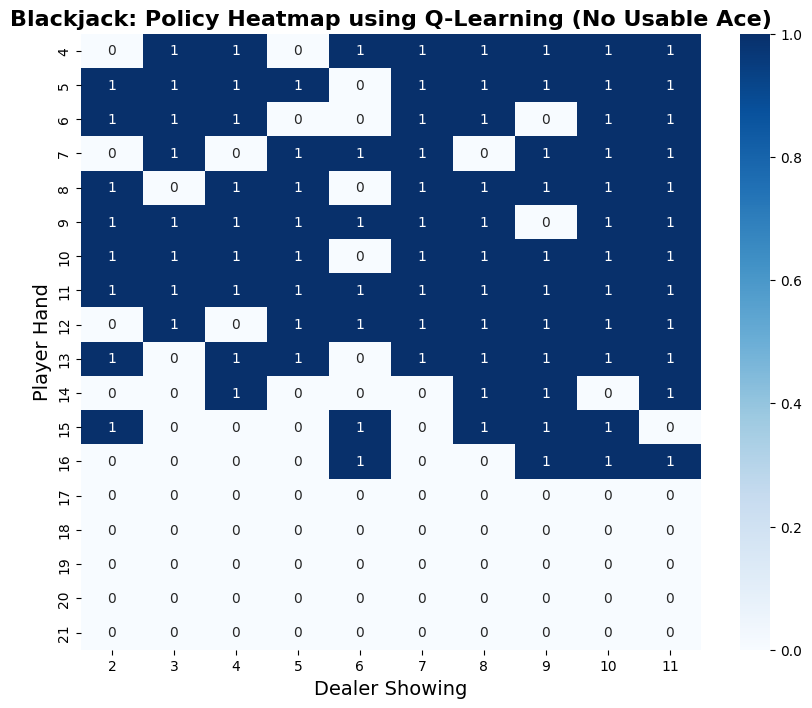

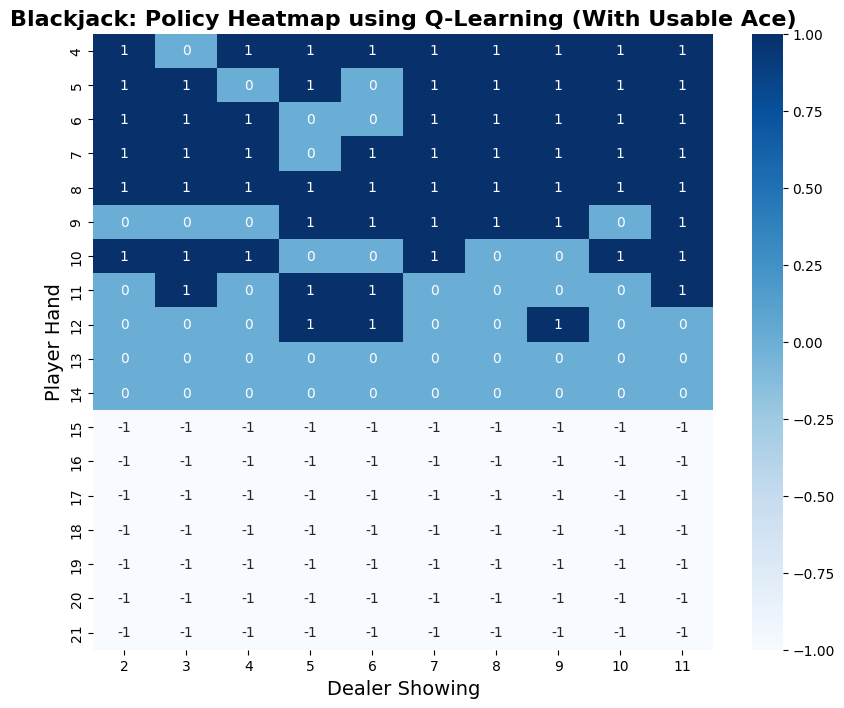

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bettermdptools.envs.blackjack_wrapper import BlackjackWrapper
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.rl import RL  # For Q-Learning
import gymnasium as gym

# Initialize the Blackjack environment
base_env = gym.make('Blackjack-v1', render_mode=None)
blackjack = BlackjackWrapper(base_env)

# Q-Learning Parameters
gamma = 0.6  # Discount factor
n_episodes = 10_000  # Number of episodes for training

# Run Q-Learning
rl = RL(blackjack)
Q, V, pi, Q_track, pi_track = rl.q_learning(
    gamma=gamma,
    init_alpha=0.5, min_alpha=0.01, alpha_decay_ratio=0.5,        # Learning rate exponential decay
    init_epsilon=1.0, min_epsilon=0.1, epsilon_decay_ratio=0.9,   # Epsilon-greedy strategy for exploration rate exponential decay
    n_episodes=n_episodes
)

# Test the trained policy
reward_scores = TestEnv.test_env(env=blackjack, n_iters=1000, render=False, pi=pi, user_input=False)
print(f"Test scores after running Q-Learning (Gamma = {gamma}):")
print(np.mean(reward_scores))

# Define player hands and dealer cards
player_hands = list(range(4, 22))  # Player hands: H4-H21
dealer_cards = list(range(2, 12))  # Dealer cards: 2-10, Ace (11)

# Initialize policy matrices
policy_matrix_no_usable_ace = np.full((len(player_hands), len(dealer_cards)), -1)
policy_matrix_usable_ace = np.full((len(player_hands), len(dealer_cards)), -1)

# Decode states and fill the policy matrices
for state, action in pi.items():
    # Decode the state based on BlackjackWrapper logic
    if state < 180:  # States without a usable ace
        player_index = state // 10  # Integer division to get the player hand
        dealer_index = state % 10  # Modulo to get the dealer card
        if 0 <= player_index < len(player_hands) and 0 <= dealer_index < len(dealer_cards):
            policy_matrix_no_usable_ace[player_index, dealer_index] = action
    else:  # States with a usable ace
        player_index = (state - 180) // 10
        dealer_index = (state - 180) % 10
        if 0 <= player_index < len(player_hands) and 0 <= dealer_index < len(dealer_cards):
            policy_matrix_usable_ace[player_index, dealer_index] = action

# Plot heatmap for policy without usable ace
plt.figure(figsize=(10, 8))
sns.heatmap(policy_matrix_no_usable_ace, annot=True, fmt="d", cmap="Blues",
            xticklabels=dealer_cards, yticklabels=player_hands)
plt.title("Blackjack: Policy Heatmap using Q-Learning (No Usable Ace)", fontsize=16, fontweight='bold')
plt.xlabel("Dealer Showing", fontsize=14)
plt.ylabel("Player Hand", fontsize=14)
plt.show()

print()

# Plot heatmap for policy with usable ace
plt.figure(figsize=(10, 8))
sns.heatmap(policy_matrix_usable_ace, annot=True, fmt="d", cmap="Blues",
            xticklabels=dealer_cards, yticklabels=player_hands)
plt.title("Blackjack: Policy Heatmap using Q-Learning (With Usable Ace)", fontsize=16, fontweight='bold')
plt.xlabel("Dealer Showing", fontsize=14)
plt.ylabel("Player Hand", fontsize=14)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from bettermdptools.envs.blackjack_wrapper import BlackjackWrapper
from bettermdptools.algorithms.rl import RL  # For Q-Learning
import gymnasium as gym
import numpy as np
import time  # For tracking execution time

# Parameters for Q-Learning
gammas = [0, 0.05, 0.2, 0.3, 0.4, 0.6, 0.8, 1.0]  # Discount factors to evaluate
n_episodes = 10_000  # Number of episodes for training

# Store policies for comparison
policies = {}
policy_duplicates = {}  # To track which gammas share the same policy

# Run Q-Learning for each gamma
for gamma in gammas:

    # Initialize the Blackjack environment
    base_env = gym.make('Blackjack-v1', render_mode=None)
    blackjack = BlackjackWrapper(base_env)

    # Run Q-Learning
    rl = RL(blackjack)
    Q, _, pi, _, _ = rl.q_learning(
        gamma=gamma,
        init_alpha=0.5, min_alpha=0.01, alpha_decay_ratio=0.5,        # Learning rate exponential decay
        init_epsilon=1.0, min_epsilon=0.1, epsilon_decay_ratio=0.9,   # Epsilon-greedy strategy for exploration rate exponential decay
        n_episodes=n_episodes
    )

    # Check if this policy already exists
    duplicate_gamma = None
    for prev_gamma, prev_pi in policies.items():
        if pi == prev_pi:  # Policies are identical
            duplicate_gamma = prev_gamma
            break

    # Store policy and duplicate info
    if duplicate_gamma is None:
        policies[gamma] = pi  # New unique policy
        policy_duplicates[gamma] = [gamma]  # Initialize with itself
    else:
        policy_duplicates[duplicate_gamma].append(gamma)  # Add gamma to duplicate list

# Display Results
print()
print("Policies grouped by identical results:")
for base_gamma, duplicate_gammas in policy_duplicates.items():
    print(f"Base Gamma {base_gamma:.2f}: Duplicate Gammas: {', '.join([f'{g:.2f}' for g in duplicate_gammas])}")



Policies grouped by identical results:
Base Gamma 0.00: Duplicate Gammas: 0.00
Base Gamma 0.05: Duplicate Gammas: 0.05
Base Gamma 0.20: Duplicate Gammas: 0.20
Base Gamma 0.30: Duplicate Gammas: 0.30
Base Gamma 0.40: Duplicate Gammas: 0.40
Base Gamma 0.60: Duplicate Gammas: 0.60
Base Gamma 0.80: Duplicate Gammas: 0.80
Base Gamma 1.00: Duplicate Gammas: 1.00


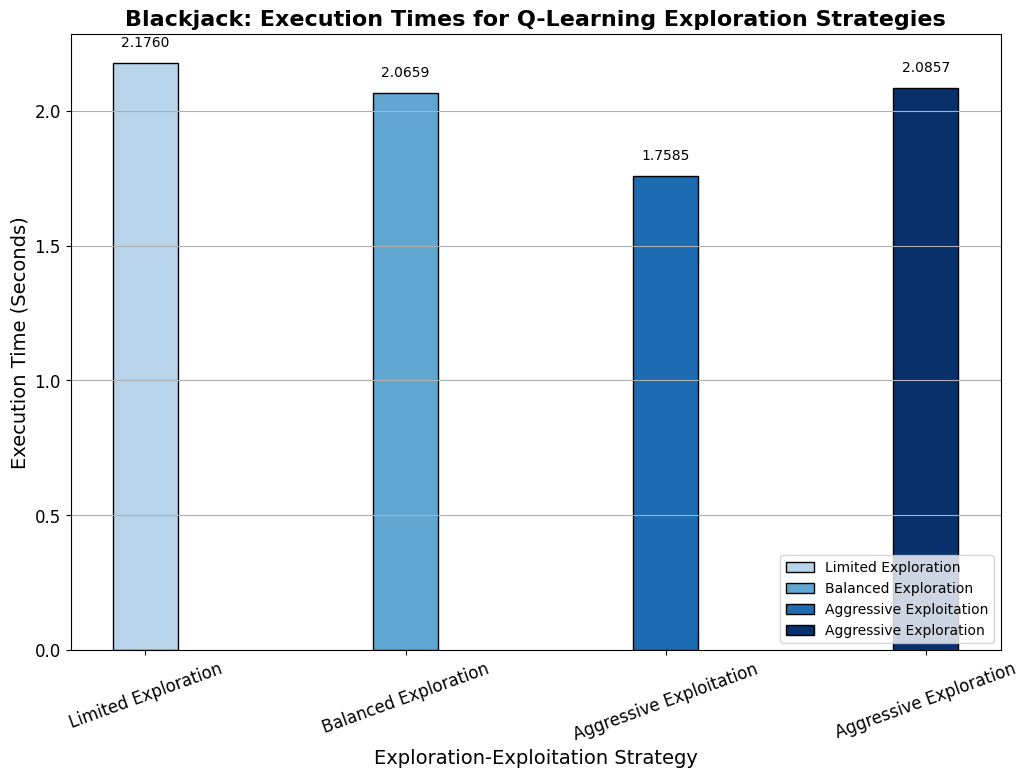

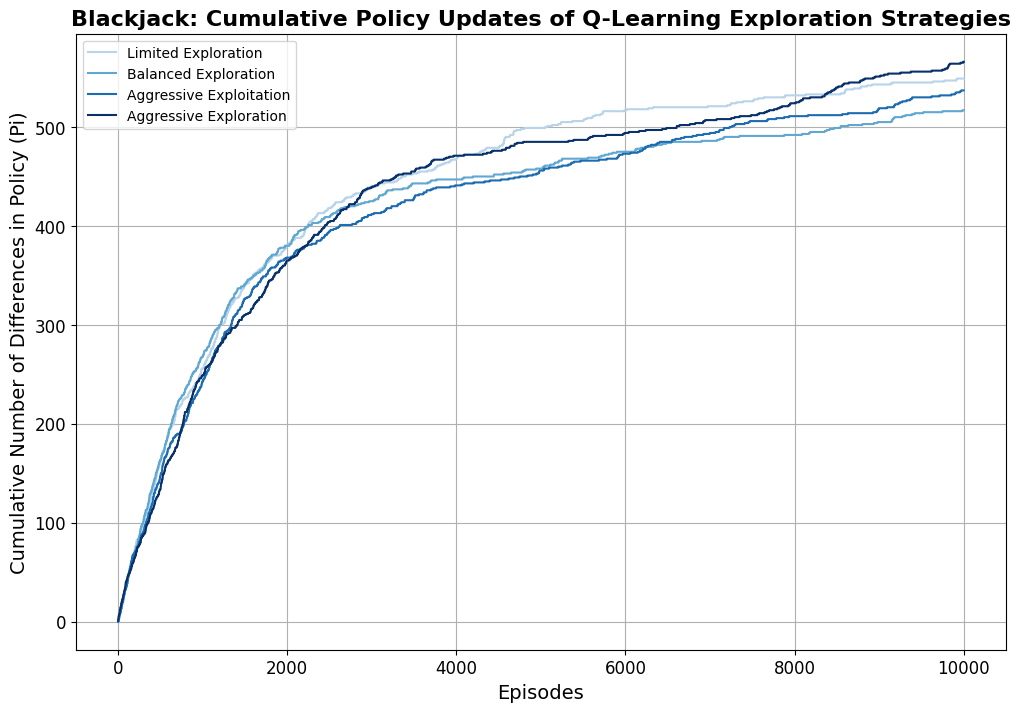


Testing policy for Limited Exploration
Limited Exploration: Average reward over 100,000 episodes: -0.0695

Testing policy for Balanced Exploration
Balanced Exploration: Average reward over 100,000 episodes: -0.0740

Testing policy for Aggressive Exploitation
Aggressive Exploitation: Average reward over 100,000 episodes: -0.0716

Testing policy for Aggressive Exploration
Aggressive Exploration: Average reward over 100,000 episodes: -0.0864


In [ ]:
import matplotlib.pyplot as plt
from bettermdptools.envs.blackjack_wrapper import BlackjackWrapper
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.rl import RL  # For Q-Learning
import gymnasium as gym
import numpy as np
import time  # For tracking execution time

# Parameters for the experiment
exploration_strategies = [
    {"description": "Limited Exploration", "init_epsilon": 0.5, "min_epsilon": 0.1, "epsilon_decay_ratio": 0.9},  # Limited exploration
    {"description": "Balanced Exploration", "init_epsilon": 1.0, "min_epsilon": 0.1, "epsilon_decay_ratio": 0.9},  # Balanced exploration
    {"description": "Aggressive Exploitation", "init_epsilon": 1.0, "min_epsilon": 0.5, "epsilon_decay_ratio": 0.5},  # Aggressive exploitation
    {"description": "Aggressive Exploration", "init_epsilon": 1.0, "min_epsilon": 0.01, "epsilon_decay_ratio": 0.99},  # Aggressive exploration
]
gamma = 0.6  # Fixed discount factor
n_episodes = 10_000  # Maximum number of episodes for training
results = {}
execution_times = []

for strategy_idx, strategy in enumerate(exploration_strategies):

    # Track execution time for Q-Learning
    start_time = time.time()

    # Initialize the Blackjack environment
    base_env = gym.make('Blackjack-v1', render_mode=None)
    blackjack = BlackjackWrapper(base_env)

    # Run Q-Learning with the current exploration strategy
    rl = RL(blackjack)
    Q, V, pi, Q_track, pi_track = rl.q_learning(
        gamma=gamma,  # Fixed discount factor
        init_alpha=0.5, min_alpha=0.01, alpha_decay_ratio=0.5,        # Learning rate exponential decay
        init_epsilon=strategy["init_epsilon"], min_epsilon=strategy["min_epsilon"], epsilon_decay_ratio=strategy["epsilon_decay_ratio"],  # Exploration-exploitation strategy
        n_episodes=n_episodes
    )

    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append((strategy_idx, execution_time))  # Store index and its execution time

    # Track the number of differences in pi between successive iterations
    differences_in_pi = []
    cum_differences_in_pi = []  # List to store cumulative differences

    for i in range(1, len(pi_track)):
        pi_current = pi_track[i]
        pi_previous = pi_track[i - 1]
        differences = np.sum(pi_current != pi_previous)  # Compute differences
        differences_in_pi.append(differences)
        cumulative_difference = sum(differences_in_pi)
        cum_differences_in_pi.append(cumulative_difference)

    # Store the results
    results[strategy_idx] = {
        "description": strategy["description"],
        "Q": Q,
        "V": V,
        "pi": pi,
        "execution_time": execution_time,
        "differences_in_pi": differences_in_pi,
        "cum_differences_in_pi": cum_differences_in_pi  # Add cumulative differences
    }

# Plot Execution Times
strategies_sorted, times_sorted = zip(*sorted(execution_times, key=lambda x: x[0]))  # Sort by strategy index for plotting
bar_width = 0.25  # Adjust the width of the bars
colors = plt.cm.Blues(np.linspace(0.3, 1, len(strategies_sorted)))  # Generate a color map

plt.figure(figsize=(12, 8))
for idx, (strategy_idx, time) in enumerate(zip(strategies_sorted, times_sorted)):
    description = exploration_strategies[strategy_idx]["description"]
    plt.bar(strategy_idx, time, width=bar_width, label=f"{description}", color=colors[idx], edgecolor='black')
    plt.text(strategy_idx, time + 0.05, f"{time:.4f}", ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Exploration-Exploitation Strategy', fontsize=14)
plt.ylabel('Execution Time (Seconds)', fontsize=14)
plt.title('Blackjack: Execution Times for Q-Learning Exploration Strategies', fontsize=16, fontweight='bold')
plt.xticks(ticks=range(len(exploration_strategies)), labels=[strategy["description"] for strategy in exploration_strategies], fontsize=12, rotation=20)
plt.yticks(fontsize=12)
plt.legend(fontsize=10, loc='lower right')
plt.grid(axis='y')
plt.show()
print()

# Plot the cumulative number of differences in pi for each strategy
plt.figure(figsize=(12, 8))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(exploration_strategies)))  # Generate a color map

for idx, strategy_idx in enumerate(strategies_sorted):
    description = exploration_strategies[strategy_idx]["description"]
    plt.plot(range(1, len(results[strategy_idx]["cum_differences_in_pi"]) + 1),
             results[strategy_idx]["cum_differences_in_pi"],
             label=f"{description}", color=colors[idx])

plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Cumulative Number of Differences in Policy (Pi)', fontsize=14)
plt.title('Blackjack: Cumulative Policy Updates of Q-Learning Exploration Strategies', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.show()

# Test and Compare Policies for Each Strategy
for strategy_idx, strategy in enumerate(exploration_strategies):
    description = strategy["description"]
    print(f"\nTesting policy for {description}")
    reward_scores = TestEnv.test_env(env=blackjack, n_iters=100_000, render=False, pi=results[strategy_idx]["pi"], user_input=False)
    print(f"{description}: Average reward over 100,000 episodes: {np.mean(reward_scores):.4f}")


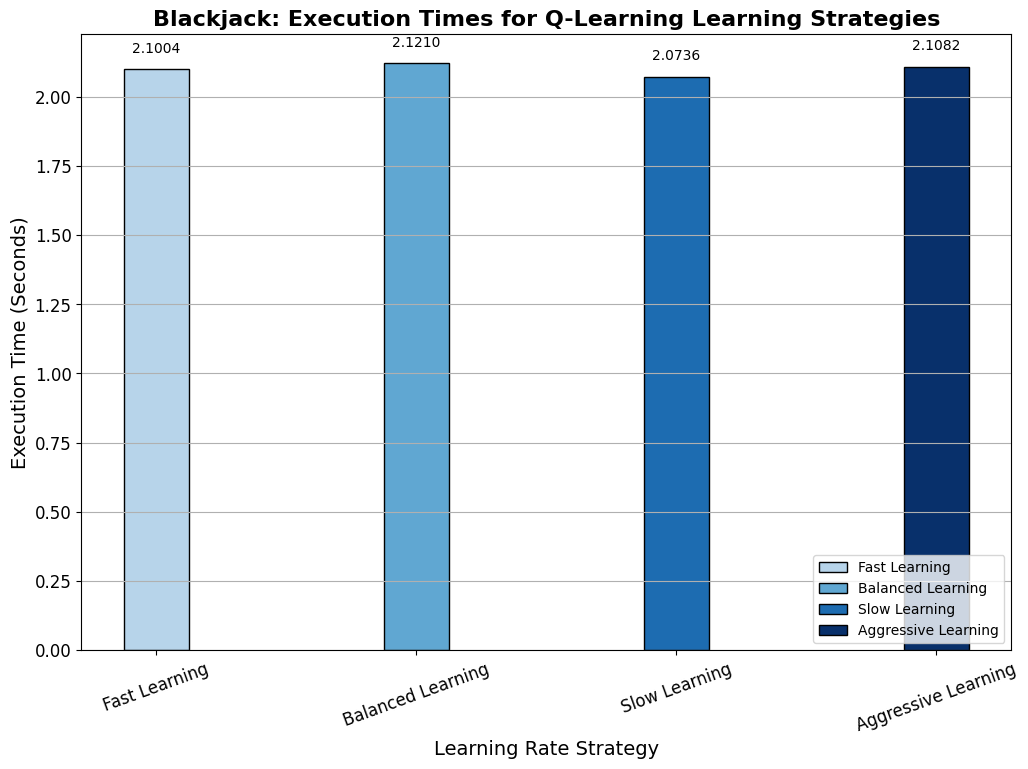

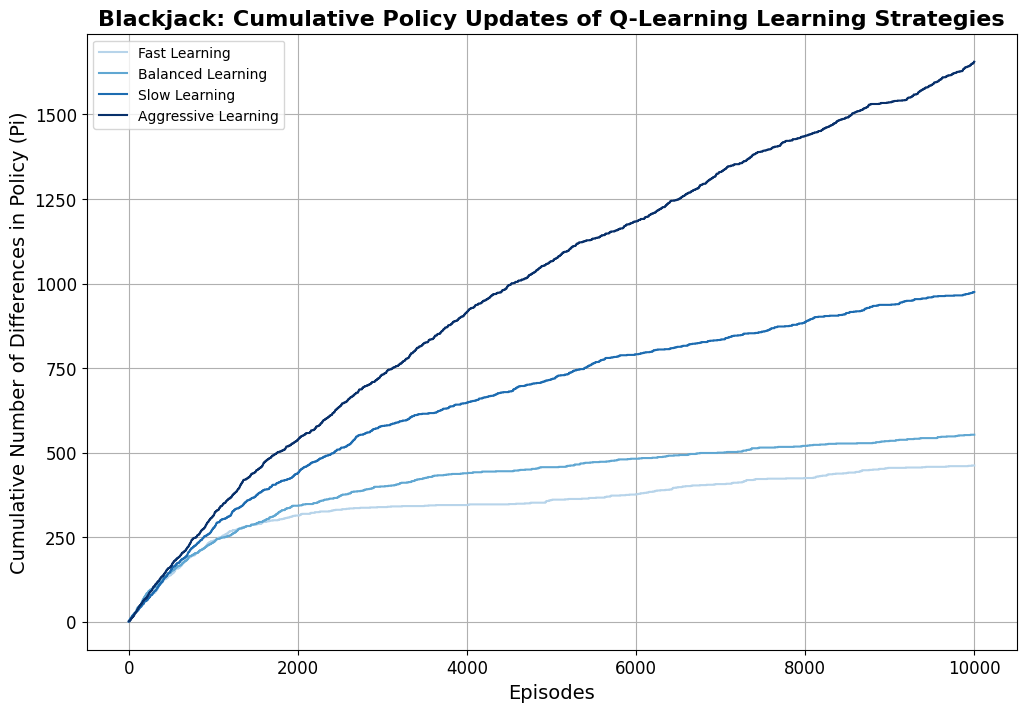


Testing policy for Fast Learning
Fast Learning: Average reward over 100,000 episodes: -0.0922

Testing policy for Balanced Learning
Balanced Learning: Average reward over 100,000 episodes: -0.0694

Testing policy for Slow Learning
Slow Learning: Average reward over 100,000 episodes: -0.0577

Testing policy for Aggressive Learning
Aggressive Learning: Average reward over 100,000 episodes: -0.0967


In [ ]:
import matplotlib.pyplot as plt
from bettermdptools.envs.blackjack_wrapper import BlackjackWrapper
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.rl import RL  # For Q-Learning
import gymnasium as gym
import numpy as np
import time  # For tracking execution time

# Parameters for the experiment
alpha_strategies = [
    {"description": "Fast Learning", "init_alpha": 0.9, "min_alpha": 0.01, "alpha_decay_ratio": 0.3},  # High initial learning rate, fast decay
    {"description": "Balanced Learning", "init_alpha": 0.5, "min_alpha": 0.01, "alpha_decay_ratio": 0.5},  # Moderate learning rate and decay
    {"description": "Slow Learning", "init_alpha": 0.5, "min_alpha": 0.1, "alpha_decay_ratio": 0.8},  # Slower decay with higher minimum learning rate
    {"description": "Aggressive Learning", "init_alpha": 0.9, "min_alpha": 0.5, "alpha_decay_ratio": 0.1},  # Very high initial learning rate, very slow decay
]
gamma = 0.6  # Fixed discount factor
n_episodes = 10_000  # Maximum number of episodes for training
results = {}
execution_times = []

for strategy_idx, strategy in enumerate(alpha_strategies):

    # Track execution time for Q-Learning
    start_time = time.time()

    # Initialize the Blackjack environment
    base_env = gym.make('Blackjack-v1', render_mode=None)
    blackjack = BlackjackWrapper(base_env)

    # Run Q-Learning with the current alpha strategy
    rl = RL(blackjack)
    Q, V, pi, Q_track, pi_track = rl.q_learning(
        gamma=gamma,  # Fixed discount factor
        init_alpha=strategy["init_alpha"], min_alpha=strategy["min_alpha"], alpha_decay_ratio=strategy["alpha_decay_ratio"],  # Learning rate strategy
        init_epsilon=1.0, min_epsilon=0.1, epsilon_decay_ratio=0.9,  # Fixed exploration strategy for all
        n_episodes=n_episodes
    )

    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append((strategy_idx, execution_time))  # Store index and its execution time

    # Track the number of differences in pi between successive iterations
    differences_in_pi = []
    cum_differences_in_pi = []  # List to store cumulative differences

    for i in range(1, len(pi_track)):
        pi_current = pi_track[i]
        pi_previous = pi_track[i - 1]
        differences = np.sum(pi_current != pi_previous)  # Compute differences
        differences_in_pi.append(differences)
        cumulative_difference = sum(differences_in_pi)
        cum_differences_in_pi.append(cumulative_difference)

    # Store the results
    results[strategy_idx] = {
        "description": strategy["description"],
        "Q": Q,
        "V": V,
        "pi": pi,
        "execution_time": execution_time,
        "differences_in_pi": differences_in_pi,
        "cum_differences_in_pi": cum_differences_in_pi  # Add cumulative differences
    }

# Plot Execution Times
strategies_sorted, times_sorted = zip(*sorted(execution_times, key=lambda x: x[0]))  # Sort by strategy index for plotting
bar_width = 0.25  # Adjust the width of the bars
colors = plt.cm.Blues(np.linspace(0.3, 1, len(strategies_sorted)))  # Generate a color map

plt.figure(figsize=(12, 8))
for idx, (strategy_idx, time) in enumerate(zip(strategies_sorted, times_sorted)):
    description = alpha_strategies[strategy_idx]["description"]
    plt.bar(strategy_idx, time, width=bar_width, label=f"{description}", color=colors[idx], edgecolor='black')
    plt.text(strategy_idx, time + 0.05, f"{time:.4f}", ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Learning Rate Strategy', fontsize=14)
plt.ylabel('Execution Time (Seconds)', fontsize=14)
plt.title('Blackjack: Execution Times for Q-Learning Learning Strategies', fontsize=16, fontweight='bold')
plt.xticks(ticks=range(len(alpha_strategies)), labels=[strategy["description"] for strategy in alpha_strategies], fontsize=12, rotation=20)
plt.yticks(fontsize=12)
plt.legend(fontsize=10, loc='lower right')
plt.grid(axis='y')
plt.show()
print()

# Plot the cumulative number of differences in pi for each strategy
plt.figure(figsize=(12, 8))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(alpha_strategies)))  # Generate a color map

for idx, strategy_idx in enumerate(strategies_sorted):
    description = alpha_strategies[strategy_idx]["description"]
    plt.plot(range(1, len(results[strategy_idx]["cum_differences_in_pi"]) + 1),
             results[strategy_idx]["cum_differences_in_pi"],
             label=f"{description}", color=colors[idx])

plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Cumulative Number of Differences in Policy (Pi)', fontsize=14)
plt.title('Blackjack: Cumulative Policy Updates of Q-Learning Learning Strategies', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.show()

# Test and Compare Policies for Each Strategy
for strategy_idx, strategy in enumerate(alpha_strategies):
    description = strategy["description"]
    print(f"\nTesting policy for {description}")
    reward_scores = TestEnv.test_env(env=blackjack, n_iters=100_000, render=False, pi=results[strategy_idx]["pi"], user_input=False)
    print(f"{description}: Average reward over 100,000 episodes: {np.mean(reward_scores):.4f}")


#### SARSA (RL algorithm) to Solve Blackjack problem

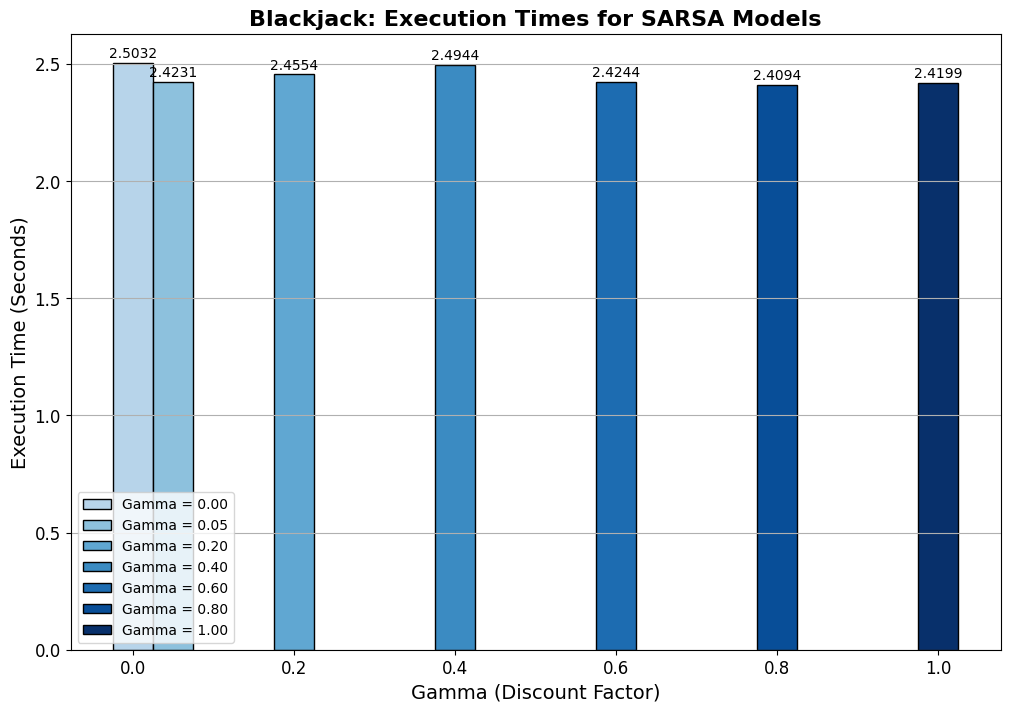

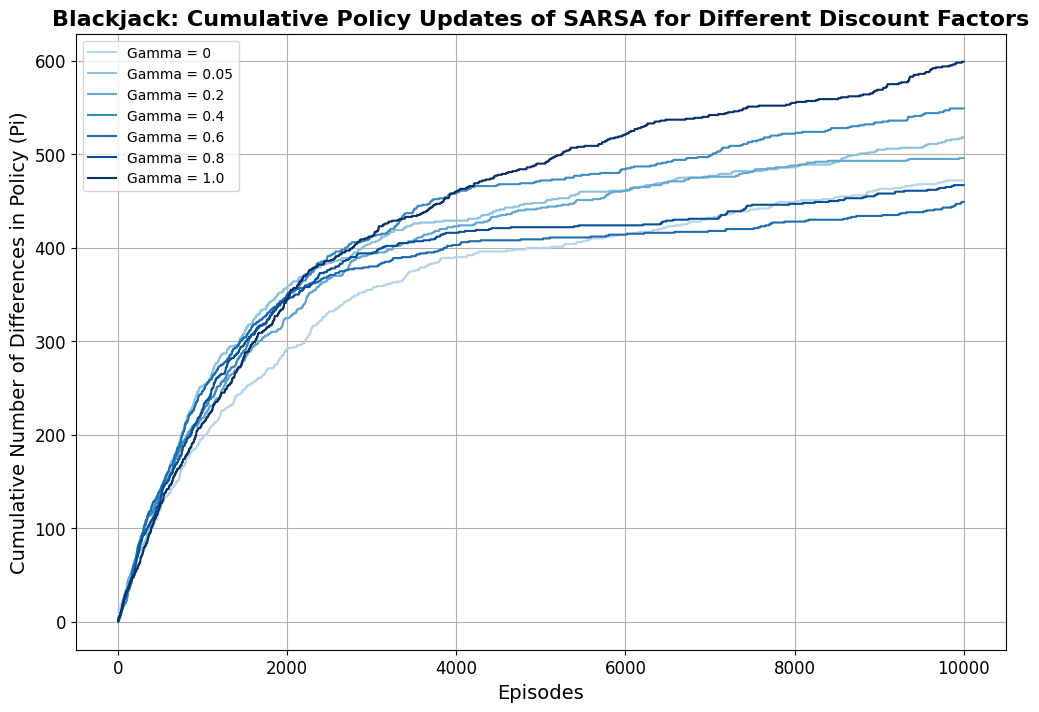


Testing policy for Gamma = 0
Gamma 0: Average reward over 100,000 episodes: -0.0726

Testing policy for Gamma = 0.05
Gamma 0.05: Average reward over 100,000 episodes: -0.0716

Testing policy for Gamma = 0.2
Gamma 0.2: Average reward over 100,000 episodes: -0.0579

Testing policy for Gamma = 0.4
Gamma 0.4: Average reward over 100,000 episodes: -0.0810

Testing policy for Gamma = 0.6
Gamma 0.6: Average reward over 100,000 episodes: -0.0804

Testing policy for Gamma = 0.8
Gamma 0.8: Average reward over 100,000 episodes: -0.0726

Testing policy for Gamma = 1.0
Gamma 1.0: Average reward over 100,000 episodes: -0.0877


In [ ]:
import matplotlib.pyplot as plt
from bettermdptools.envs.blackjack_wrapper import BlackjackWrapper
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.rl import RL  # For SARSA
import gymnasium as gym
import numpy as np
import time  # For tracking execution time

# Parameters for SARSA
gammas = [0, 0.05, 0.2, 0.4, 0.6, 0.8, 1.0]  # Discount factors to evaluate
n_episodes = 10_000  # Maximum number of episodes for training
results = {}
execution_times = []

for gamma in gammas:

    # Track execution time for SARSA
    start_time = time.time()

    # Initialize the Blackjack environment
    base_env = gym.make('Blackjack-v1', render_mode=None)
    blackjack = BlackjackWrapper(base_env)

    # Run SARSA for the current gamma
    rl = RL(blackjack)
    Q, V, pi, Q_track, pi_track = rl.sarsa(
        gamma=gamma,  # Discount factor
        init_alpha=0.5, min_alpha=0.01, alpha_decay_ratio=0.5,        # Learning rate exponential decay
        init_epsilon=1.0, min_epsilon=0.1, epsilon_decay_ratio=0.9,   # Epsilon-greedy strategy for exploration rate exponential decay
        n_episodes=n_episodes
    )

    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append((gamma, execution_time))  # Store gamma and its execution time

    # Track the number of differences in pi between successive iterations
    differences_in_pi = []
    cum_differences_in_pi = []  # List to store cumulative differences

    for i in range(1, len(pi_track)):
        pi_current = pi_track[i]
        pi_previous = pi_track[i - 1]
        differences = np.sum(pi_current != pi_previous)  # Compute differences
        differences_in_pi.append(differences)
        cumulative_difference = sum(differences_in_pi)
        cum_differences_in_pi.append(cumulative_difference)

    # Store the results
    results[gamma] = {
        "Q": Q,
        "V": V,
        "pi": pi,
        "execution_time": execution_time,
        "differences_in_pi": differences_in_pi,
        "cum_differences_in_pi": cum_differences_in_pi  # Add cumulative differences
    }

# Plot Execution Times
gammas_sorted, times_sorted = zip(*sorted(execution_times, key=lambda x: x[0]))  # Sort by gamma for plotting
bar_width = 0.05  # Adjust the width of the bars
colors = plt.cm.Blues(np.linspace(0.3, 1, len(gammas_sorted)))  # Generate a color map

plt.figure(figsize=(12, 8))
for idx, (gamma, time) in enumerate(zip(gammas_sorted, times_sorted)):
    plt.bar(gamma, time, width=bar_width, label=f"Gamma = {gamma:.2f}", color=colors[idx], edgecolor='black')
    # Display time with 3 decimal places on top of each bar
    plt.text(gamma, time + 0.01, f"{time:.4f}", ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Gamma (Discount Factor)', fontsize=14)
plt.ylabel('Execution Time (Seconds)', fontsize=14)
plt.title('Blackjack: Execution Times for SARSA Models', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10, loc='lower left')  # Place legend inside the upper-left corner
plt.grid(axis='y')
plt.show()

# Plot the number of cumulative differences in pi for each gamma
plt.figure(figsize=(12, 8))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(gammas)))  # Generate a color map

for idx, gamma in enumerate(gammas):
    plt.plot(range(1, len(results[gamma]["cum_differences_in_pi"]) + 1),
             results[gamma]["cum_differences_in_pi"],
             label=f"Gamma = {gamma}", color=colors[idx])

plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Cumulative Number of Differences in Policy (Pi)', fontsize=14)
plt.title('Blackjack: Cumulative Policy Updates of SARSA for Different Discount Factors', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.show()

# Test and Compare Policies for Each Gamma
for gamma in gammas:
    print(f"\nTesting policy for Gamma = {gamma}")
    reward_scores = TestEnv.test_env(env=blackjack, n_iters=100_000, render=False, pi=results[gamma]["pi"], user_input=False)
    print(f"Gamma {gamma}: Average reward over 100,000 episodes: {np.mean(reward_scores):.4f}")


Test scores after running SARSA (Gamma = 0.6):
-0.008


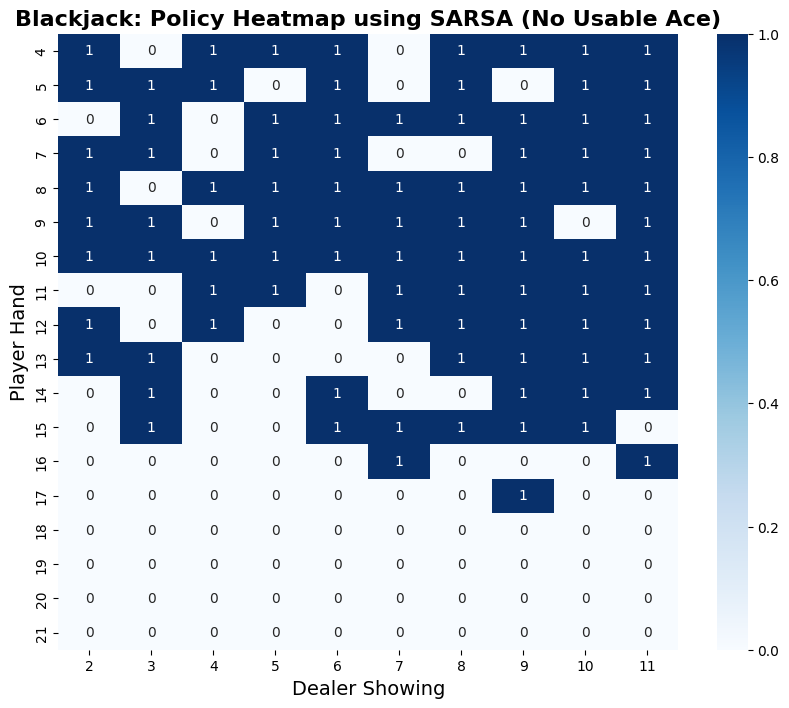

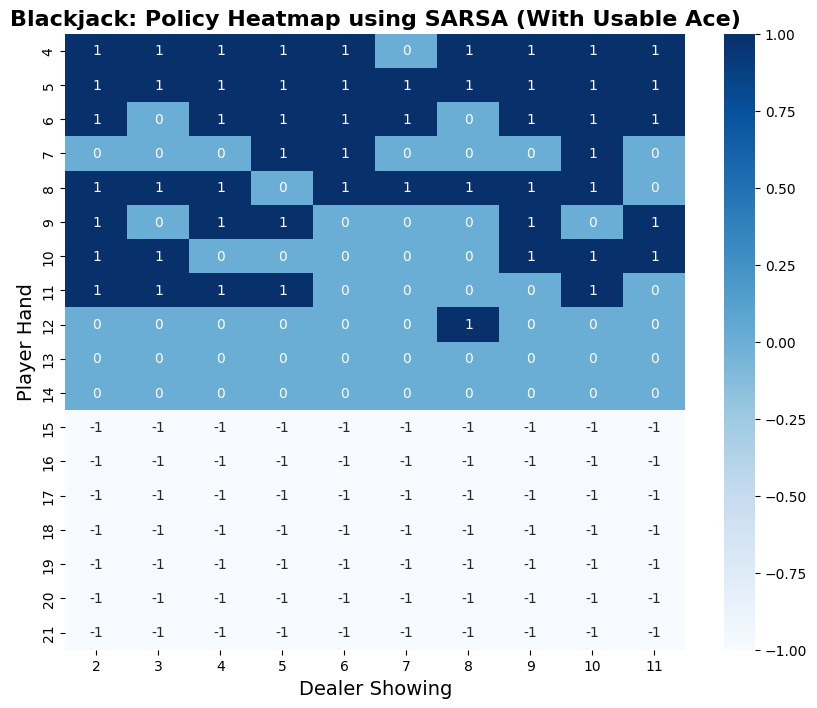

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bettermdptools.envs.blackjack_wrapper import BlackjackWrapper
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.rl import RL  # For SARSA
import gymnasium as gym

# Initialize the Blackjack environment
base_env = gym.make('Blackjack-v1', render_mode=None)
blackjack = BlackjackWrapper(base_env)

# SARSA Parameters
gamma = 0.6  # Discount factor
n_episodes = 10_000  # Number of episodes for training

# Run SARSA
rl = RL(blackjack)
Q, V, pi, Q_track, pi_track = rl.sarsa(
    gamma=gamma,
    init_alpha=0.5, min_alpha=0.01, alpha_decay_ratio=0.5,        # Learning rate exponential decay
    init_epsilon=1.0, min_epsilon=0.1, epsilon_decay_ratio=0.9,   # Epsilon-greedy strategy for exploration rate exponential decay
    n_episodes=n_episodes
)

# Test the trained policy
reward_scores = TestEnv.test_env(env=blackjack, n_iters=1000, render=False, pi=pi, user_input=False)
print(f"Test scores after running SARSA (Gamma = {gamma}):")
print(np.mean(reward_scores))

# Define player hands and dealer cards
player_hands = list(range(4, 22))  # Player hands: H4-H21
dealer_cards = list(range(2, 12))  # Dealer cards: 2-10, Ace (11)

# Initialize policy matrices
policy_matrix_no_usable_ace = np.full((len(player_hands), len(dealer_cards)), -1)
policy_matrix_usable_ace = np.full((len(player_hands), len(dealer_cards)), -1)

# Decode states and fill the policy matrices
for state, action in pi.items():
    # Decode the state based on BlackjackWrapper logic
    if state < 180:  # States without a usable ace
        player_index = state // 10  # Integer division to get the player hand
        dealer_index = state % 10  # Modulo to get the dealer card
        if 0 <= player_index < len(player_hands) and 0 <= dealer_index < len(dealer_cards):
            policy_matrix_no_usable_ace[player_index, dealer_index] = action
    else:  # States with a usable ace
        player_index = (state - 180) // 10
        dealer_index = (state - 180) % 10
        if 0 <= player_index < len(player_hands) and 0 <= dealer_index < len(dealer_cards):
            policy_matrix_usable_ace[player_index, dealer_index] = action

# Plot heatmap for policy without usable ace
plt.figure(figsize=(10, 8))
sns.heatmap(policy_matrix_no_usable_ace, annot=True, fmt="d", cmap="Blues",
            xticklabels=dealer_cards, yticklabels=player_hands)
plt.title("Blackjack: Policy Heatmap using SARSA (No Usable Ace)", fontsize=16, fontweight='bold')
plt.xlabel("Dealer Showing", fontsize=14)
plt.ylabel("Player Hand", fontsize=14)
plt.show()

print()

# Plot heatmap for policy with usable ace
plt.figure(figsize=(10, 8))
sns.heatmap(policy_matrix_usable_ace, annot=True, fmt="d", cmap="Blues",
            xticklabels=dealer_cards, yticklabels=player_hands)
plt.title("Blackjack: Policy Heatmap using SARSA (With Usable Ace)", fontsize=16, fontweight='bold')
plt.xlabel("Dealer Showing", fontsize=14)
plt.ylabel("Player Hand", fontsize=14)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from bettermdptools.envs.blackjack_wrapper import BlackjackWrapper
from bettermdptools.algorithms.rl import RL  # For SARSA
import gymnasium as gym
import numpy as np
import time  # For tracking execution time

# Parameters for SARSA
gammas = [0, 0.05, 0.2, 0.3, 0.4, 0.6, 0.8, 1.0]  # Discount factors to evaluate
n_episodes = 10_000  # Number of episodes for training

# Store policies for comparison
policies = {}
policy_duplicates = {}  # To track which gammas share the same policy

# Run SARSA for each gamma
for gamma in gammas:

    # Initialize the Blackjack environment
    base_env = gym.make('Blackjack-v1', render_mode=None)
    blackjack = BlackjackWrapper(base_env)

    # Run SARSA
    rl = RL(blackjack)
    Q, _, pi, _, _ = rl.sarsa(
        gamma=gamma,
        init_alpha=0.5, min_alpha=0.01, alpha_decay_ratio=0.5,        # Learning rate exponential decay
        init_epsilon=1.0, min_epsilon=0.1, epsilon_decay_ratio=0.9,   # Epsilon-greedy strategy for exploration rate exponential decay
        n_episodes=n_episodes
    )

    # Check if this policy already exists
    duplicate_gamma = None
    for prev_gamma, prev_pi in policies.items():
        if pi == prev_pi:  # Policies are identical
            duplicate_gamma = prev_gamma
            break

    # Store policy and duplicate info
    if duplicate_gamma is None:
        policies[gamma] = pi  # New unique policy
        policy_duplicates[gamma] = [gamma]  # Initialize with itself
    else:
        policy_duplicates[duplicate_gamma].append(gamma)  # Add gamma to duplicate list

# Display Results
print()
print("Policies grouped by identical results:")
for base_gamma, duplicate_gammas in policy_duplicates.items():
    print(f"Base Gamma {base_gamma:.2f}: Duplicate Gammas: {', '.join([f'{g:.2f}' for g in duplicate_gammas])}")



Policies grouped by identical results:
Base Gamma 0.00: Duplicate Gammas: 0.00
Base Gamma 0.05: Duplicate Gammas: 0.05
Base Gamma 0.20: Duplicate Gammas: 0.20
Base Gamma 0.30: Duplicate Gammas: 0.30
Base Gamma 0.40: Duplicate Gammas: 0.40
Base Gamma 0.60: Duplicate Gammas: 0.60
Base Gamma 0.80: Duplicate Gammas: 0.80
Base Gamma 1.00: Duplicate Gammas: 1.00


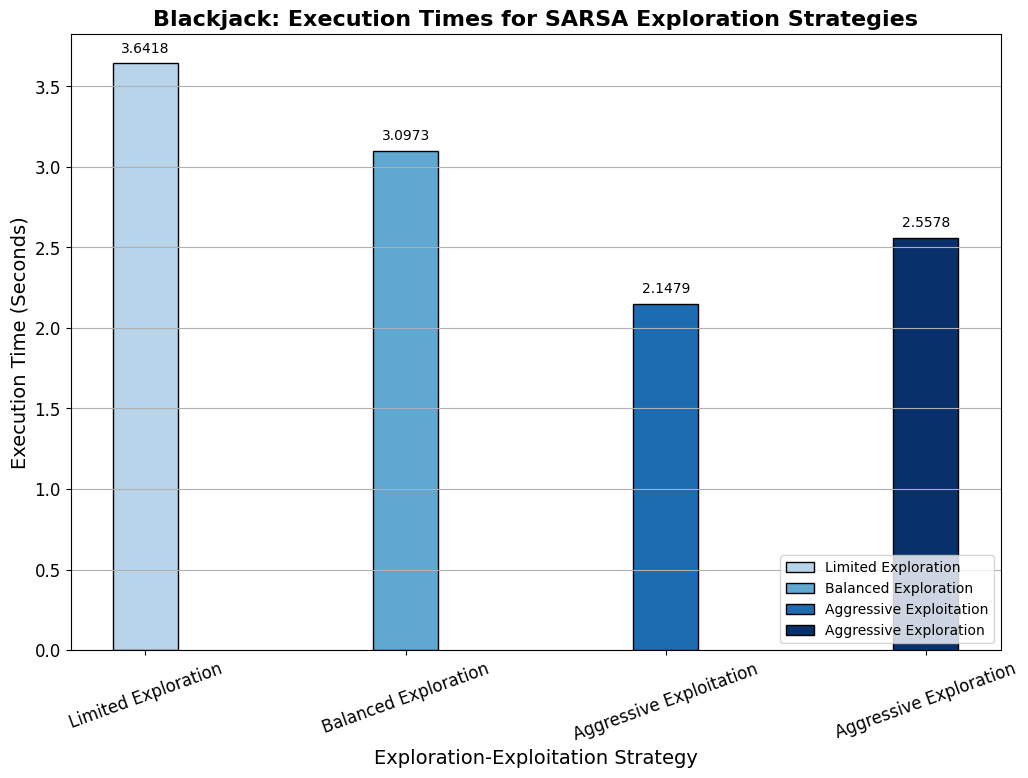

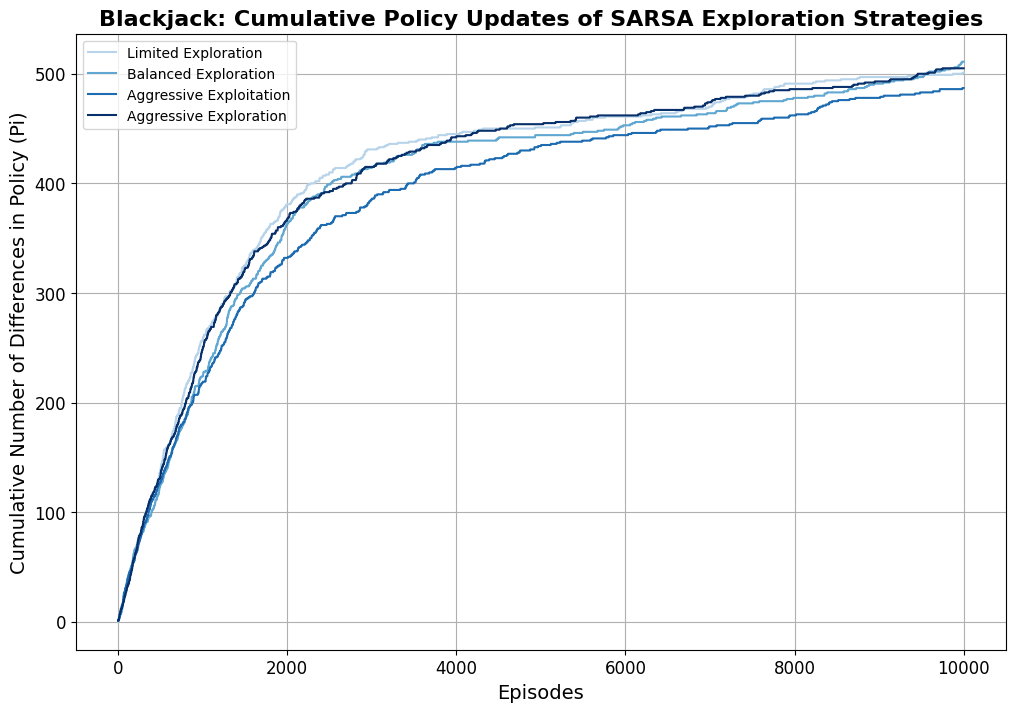


Testing policy for Limited Exploration
Limited Exploration: Average reward over 100,000 episodes: -0.0626

Testing policy for Balanced Exploration
Balanced Exploration: Average reward over 100,000 episodes: -0.0723

Testing policy for Aggressive Exploitation
Aggressive Exploitation: Average reward over 100,000 episodes: -0.0621

Testing policy for Aggressive Exploration
Aggressive Exploration: Average reward over 100,000 episodes: -0.0781


In [ ]:
import matplotlib.pyplot as plt
from bettermdptools.envs.blackjack_wrapper import BlackjackWrapper
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.rl import RL  # For SARSA
import gymnasium as gym
import numpy as np
import time  # For tracking execution time

# Parameters for the experiment
exploration_strategies = [
    {"description": "Limited Exploration", "init_epsilon": 0.5, "min_epsilon": 0.1, "epsilon_decay_ratio": 0.9},  # Limited exploration
    {"description": "Balanced Exploration", "init_epsilon": 1.0, "min_epsilon": 0.1, "epsilon_decay_ratio": 0.9},  # Balanced exploration
    {"description": "Aggressive Exploitation", "init_epsilon": 1.0, "min_epsilon": 0.5, "epsilon_decay_ratio": 0.5},  # Aggressive exploitation
    {"description": "Aggressive Exploration", "init_epsilon": 1.0, "min_epsilon": 0.01, "epsilon_decay_ratio": 0.99},  # Aggressive exploration
]
gamma = 0.6  # Fixed discount factor
n_episodes = 10_000  # Maximum number of episodes for training
results = {}
execution_times = []

for strategy_idx, strategy in enumerate(exploration_strategies):

    # Track execution time for SARSA
    start_time = time.time()

    # Initialize the Blackjack environment
    base_env = gym.make('Blackjack-v1', render_mode=None)
    blackjack = BlackjackWrapper(base_env)

    # Run SARSA with the current exploration strategy
    rl = RL(blackjack)
    Q, V, pi, Q_track, pi_track = rl.sarsa(
        gamma=gamma,  # Fixed discount factor
        init_alpha=0.5, min_alpha=0.01, alpha_decay_ratio=0.5,        # Learning rate exponential decay
        init_epsilon=strategy["init_epsilon"], min_epsilon=strategy["min_epsilon"], epsilon_decay_ratio=strategy["epsilon_decay_ratio"],  # Exploration-exploitation strategy
        n_episodes=n_episodes
    )

    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append((strategy_idx, execution_time))  # Store index and its execution time

    # Track the number of differences in pi between successive iterations
    differences_in_pi = []
    cum_differences_in_pi = []  # List to store cumulative differences

    for i in range(1, len(pi_track)):
        pi_current = pi_track[i]
        pi_previous = pi_track[i - 1]
        differences = np.sum(pi_current != pi_previous)  # Compute differences
        differences_in_pi.append(differences)
        cumulative_difference = sum(differences_in_pi)
        cum_differences_in_pi.append(cumulative_difference)

    # Store the results
    results[strategy_idx] = {
        "description": strategy["description"],
        "Q": Q,
        "V": V,
        "pi": pi,
        "execution_time": execution_time,
        "differences_in_pi": differences_in_pi,
        "cum_differences_in_pi": cum_differences_in_pi  # Add cumulative differences
    }

# Plot Execution Times
strategies_sorted, times_sorted = zip(*sorted(execution_times, key=lambda x: x[0]))  # Sort by strategy index for plotting
bar_width = 0.25  # Adjust the width of the bars
colors = plt.cm.Blues(np.linspace(0.3, 1, len(strategies_sorted)))  # Generate a color map

plt.figure(figsize=(12, 8))
for idx, (strategy_idx, time) in enumerate(zip(strategies_sorted, times_sorted)):
    description = exploration_strategies[strategy_idx]["description"]
    plt.bar(strategy_idx, time, width=bar_width, label=f"{description}", color=colors[idx], edgecolor='black')
    plt.text(strategy_idx, time + 0.05, f"{time:.4f}", ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Exploration-Exploitation Strategy', fontsize=14)
plt.ylabel('Execution Time (Seconds)', fontsize=14)
plt.title('Blackjack: Execution Times for SARSA Exploration Strategies', fontsize=16, fontweight='bold')
plt.xticks(ticks=range(len(exploration_strategies)), labels=[strategy["description"] for strategy in exploration_strategies], fontsize=12, rotation=20)
plt.yticks(fontsize=12)
plt.legend(fontsize=10, loc='lower right')
plt.grid(axis='y')
plt.show()
print()

# Plot the cumulative number of differences in pi for each strategy
plt.figure(figsize=(12, 8))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(exploration_strategies)))  # Generate a color map

for idx, strategy_idx in enumerate(strategies_sorted):
    description = exploration_strategies[strategy_idx]["description"]
    plt.plot(range(1, len(results[strategy_idx]["cum_differences_in_pi"]) + 1),
             results[strategy_idx]["cum_differences_in_pi"],
             label=f"{description}", color=colors[idx])

plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Cumulative Number of Differences in Policy (Pi)', fontsize=14)
plt.title('Blackjack: Cumulative Policy Updates of SARSA Exploration Strategies', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.show()

# Test and Compare Policies for Each Strategy
for strategy_idx, strategy in enumerate(exploration_strategies):
    description = strategy["description"]
    print(f"\nTesting policy for {description}")
    reward_scores = TestEnv.test_env(env=blackjack, n_iters=100_000, render=False, pi=results[strategy_idx]["pi"], user_input=False)
    print(f"{description}: Average reward over 100,000 episodes: {np.mean(reward_scores):.4f}")


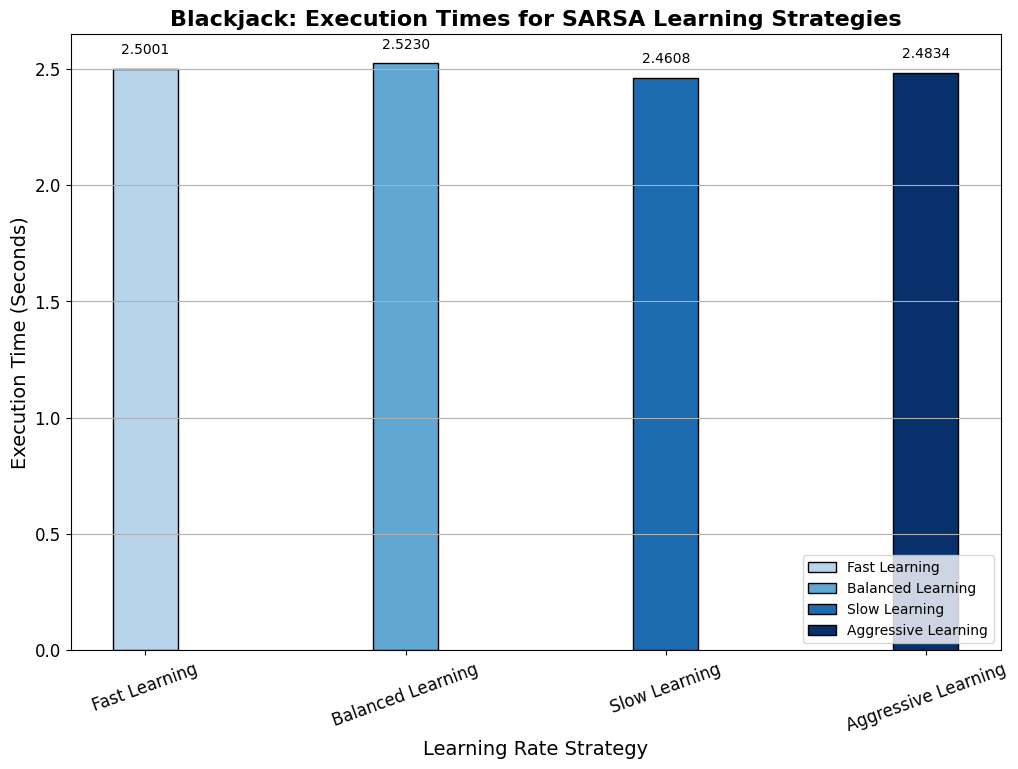

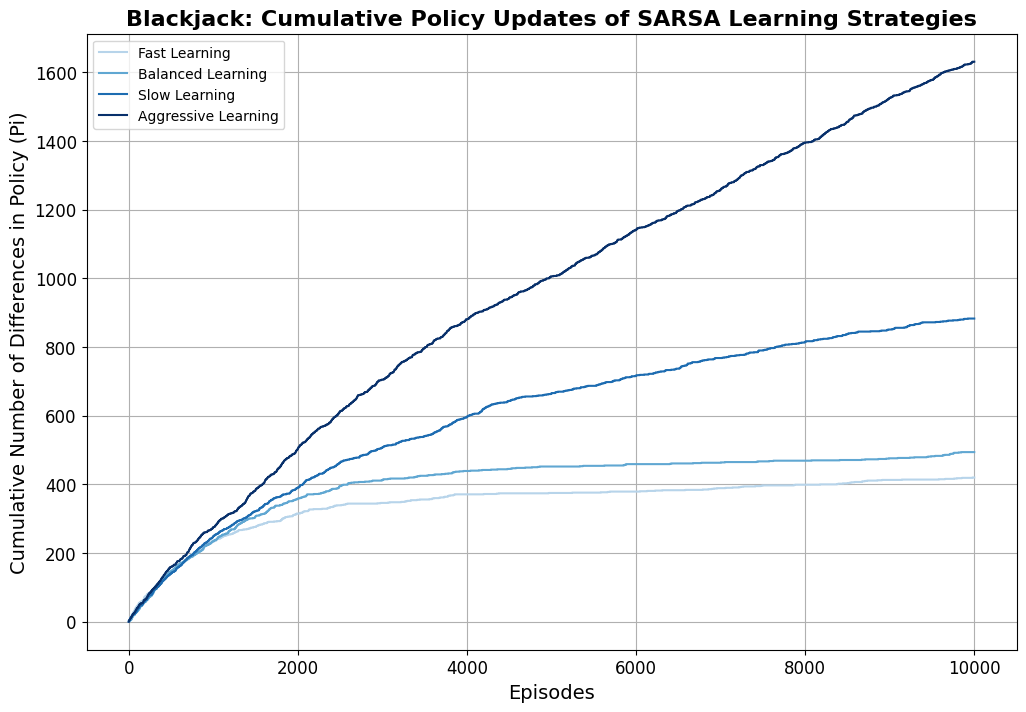


Testing policy for Fast Learning
Fast Learning: Average reward over 100,000 episodes: -0.0842

Testing policy for Balanced Learning
Balanced Learning: Average reward over 100,000 episodes: -0.0744

Testing policy for Slow Learning
Slow Learning: Average reward over 100,000 episodes: -0.0615

Testing policy for Aggressive Learning
Aggressive Learning: Average reward over 100,000 episodes: -0.0918


In [ ]:
import matplotlib.pyplot as plt
from bettermdptools.envs.blackjack_wrapper import BlackjackWrapper
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.rl import RL  # For SARSA
import gymnasium as gym
import numpy as np
import time  # For tracking execution time

# Parameters for the experiment
alpha_strategies = [
    {"description": "Fast Learning", "init_alpha": 0.9, "min_alpha": 0.01, "alpha_decay_ratio": 0.3},  # High initial learning rate, fast decay
    {"description": "Balanced Learning", "init_alpha": 0.5, "min_alpha": 0.01, "alpha_decay_ratio": 0.5},  # Moderate learning rate and decay
    {"description": "Slow Learning", "init_alpha": 0.5, "min_alpha": 0.1, "alpha_decay_ratio": 0.8},  # Slower decay with higher minimum learning rate
    {"description": "Aggressive Learning", "init_alpha": 0.9, "min_alpha": 0.5, "alpha_decay_ratio": 0.1},  # Very high initial learning rate, very slow decay
]
gamma = 0.6  # Fixed discount factor
n_episodes = 10_000  # Maximum number of episodes for training
results = {}
execution_times = []

for strategy_idx, strategy in enumerate(alpha_strategies):

    # Track execution time for SARSA
    start_time = time.time()

    # Initialize the Blackjack environment
    base_env = gym.make('Blackjack-v1', render_mode=None)
    blackjack = BlackjackWrapper(base_env)

    # Run SARSA with the current learning rate strategy
    rl = RL(blackjack)
    Q, V, pi, Q_track, pi_track = rl.sarsa(
        gamma=gamma,  # Fixed discount factor
        init_alpha=strategy["init_alpha"], min_alpha=strategy["min_alpha"], alpha_decay_ratio=strategy["alpha_decay_ratio"],  # Learning rate strategy
        init_epsilon=1.0, min_epsilon=0.1, epsilon_decay_ratio=0.9,  # Fixed exploration strategy for all
        n_episodes=n_episodes
    )

    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append((strategy_idx, execution_time))  # Store index and its execution time

    # Track the number of differences in pi between successive iterations
    differences_in_pi = []
    cum_differences_in_pi = []  # List to store cumulative differences

    for i in range(1, len(pi_track)):
        pi_current = pi_track[i]
        pi_previous = pi_track[i - 1]
        differences = np.sum(pi_current != pi_previous)  # Compute differences
        differences_in_pi.append(differences)
        cumulative_difference = sum(differences_in_pi)
        cum_differences_in_pi.append(cumulative_difference)

    # Store the results
    results[strategy_idx] = {
        "description": strategy["description"],
        "Q": Q,
        "V": V,
        "pi": pi,
        "execution_time": execution_time,
        "differences_in_pi": differences_in_pi,
        "cum_differences_in_pi": cum_differences_in_pi  # Add cumulative differences
    }

# Plot Execution Times
strategies_sorted, times_sorted = zip(*sorted(execution_times, key=lambda x: x[0]))  # Sort by strategy index for plotting
bar_width = 0.25  # Adjust the width of the bars
colors = plt.cm.Blues(np.linspace(0.3, 1, len(strategies_sorted)))  # Generate a color map

plt.figure(figsize=(12, 8))
for idx, (strategy_idx, time) in enumerate(zip(strategies_sorted, times_sorted)):
    description = alpha_strategies[strategy_idx]["description"]
    plt.bar(strategy_idx, time, width=bar_width, label=f"{description}", color=colors[idx], edgecolor='black')
    plt.text(strategy_idx, time + 0.05, f"{time:.4f}", ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Learning Rate Strategy', fontsize=14)
plt.ylabel('Execution Time (Seconds)', fontsize=14)
plt.title('Blackjack: Execution Times for SARSA Learning Strategies', fontsize=16, fontweight='bold')
plt.xticks(ticks=range(len(alpha_strategies)), labels=[strategy["description"] for strategy in alpha_strategies], fontsize=12, rotation=20)
plt.yticks(fontsize=12)
plt.legend(fontsize=10, loc='lower right')
plt.grid(axis='y')
plt.show()
print()

# Plot the cumulative number of differences in pi for each strategy
plt.figure(figsize=(12, 8))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(alpha_strategies)))  # Generate a color map

for idx, strategy_idx in enumerate(strategies_sorted):
    description = alpha_strategies[strategy_idx]["description"]
    plt.plot(range(1, len(results[strategy_idx]["cum_differences_in_pi"]) + 1),
             results[strategy_idx]["cum_differences_in_pi"],
             label=f"{description}", color=colors[idx])

plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Cumulative Number of Differences in Policy (Pi)', fontsize=14)
plt.title('Blackjack: Cumulative Policy Updates of SARSA Learning Strategies', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.show()

# Test and Compare Policies for Each Strategy
for strategy_idx, strategy in enumerate(alpha_strategies):
    description = strategy["description"]
    print(f"\nTesting policy for {description}")
    reward_scores = TestEnv.test_env(env=blackjack, n_iters=100_000, render=False, pi=results[strategy_idx]["pi"], user_input=False)
    print(f"{description}: Average reward over 100,000 episodes: {np.mean(reward_scores):.4f}")


#### Combined RL algorithms to Solve Blackjack problem

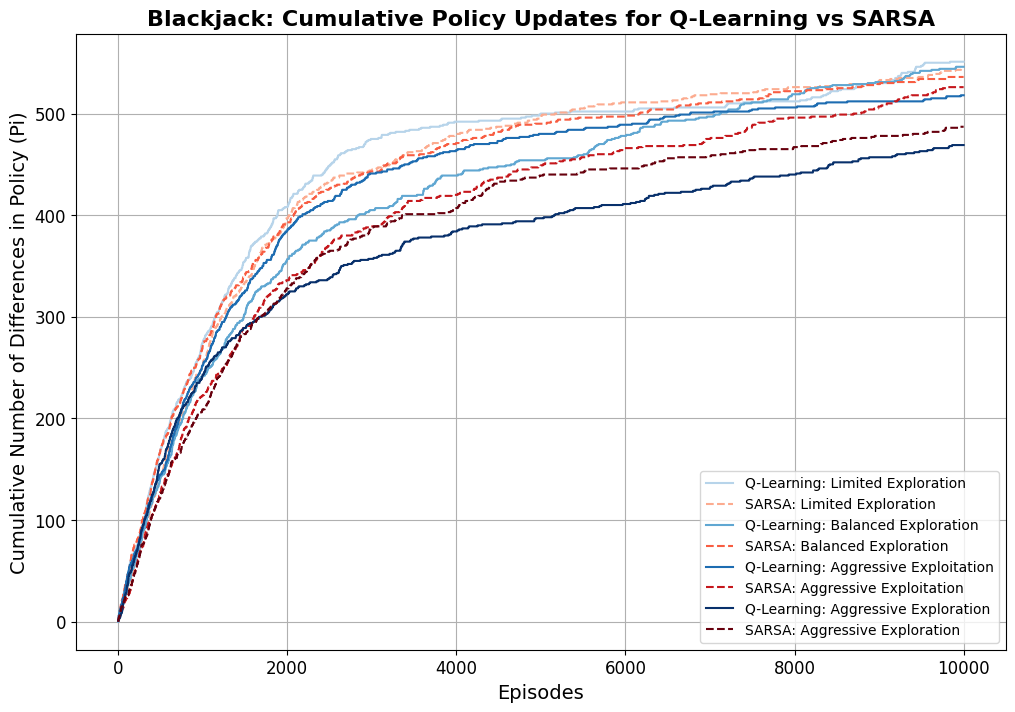

Comparison of Average Rewards:

Limited Exploration:
  Q-Learning Average Reward: -0.0671
  SARSA Average Reward: -0.0758

Balanced Exploration:
  Q-Learning Average Reward: -0.0732
  SARSA Average Reward: -0.0787

Aggressive Exploitation:
  Q-Learning Average Reward: -0.0799
  SARSA Average Reward: -0.0698

Aggressive Exploration:
  Q-Learning Average Reward: -0.0746
  SARSA Average Reward: -0.0675


In [ ]:
import matplotlib.pyplot as plt
from bettermdptools.envs.blackjack_wrapper import BlackjackWrapper
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.rl import RL
import gymnasium as gym
import numpy as np
import time

# Parameters for the experiment
exploration_strategies = [
    {"description": "Limited Exploration", "init_epsilon": 0.5, "min_epsilon": 0.1, "epsilon_decay_ratio": 0.9},
    {"description": "Balanced Exploration", "init_epsilon": 1.0, "min_epsilon": 0.1, "epsilon_decay_ratio": 0.9},
    {"description": "Aggressive Exploitation", "init_epsilon": 1.0, "min_epsilon": 0.5, "epsilon_decay_ratio": 0.5},
    {"description": "Aggressive Exploration", "init_epsilon": 1.0, "min_epsilon": 0.01, "epsilon_decay_ratio": 0.99},
]
gamma = 0.6  # Fixed discount factor
n_episodes = 10_000  # Maximum number of episodes for training

# Initialize results
q_learning_results = {}
sarsa_results = {}

# Function to run Q-Learning or SARSA
def run_experiment(algorithm, strategies, result_store):
    execution_times = []
    for strategy_idx, strategy in enumerate(strategies):
        start_time = time.time()
        base_env = gym.make('Blackjack-v1', render_mode=None)
        blackjack = BlackjackWrapper(base_env)
        rl = RL(blackjack)
        if algorithm == "q_learning":
            Q, V, pi, Q_track, pi_track = rl.q_learning(
                gamma=gamma,
                init_alpha=0.5, min_alpha=0.01, alpha_decay_ratio=0.5,
                init_epsilon=strategy["init_epsilon"], min_epsilon=strategy["min_epsilon"], epsilon_decay_ratio=strategy["epsilon_decay_ratio"],
                n_episodes=n_episodes
            )
        elif algorithm == "sarsa":
            Q, V, pi, Q_track, pi_track = rl.sarsa(
                gamma=gamma,
                init_alpha=0.5, min_alpha=0.01, alpha_decay_ratio=0.5,
                init_epsilon=strategy["init_epsilon"], min_epsilon=strategy["min_epsilon"], epsilon_decay_ratio=strategy["epsilon_decay_ratio"],
                n_episodes=n_episodes
            )
        else:
            raise ValueError("Invalid algorithm. Choose 'q_learning' or 'sarsa'.")
        execution_time = time.time() - start_time
        execution_times.append((strategy_idx, execution_time))
        differences_in_pi = []
        cum_differences_in_pi = []
        for i in range(1, len(pi_track)):
            pi_current = pi_track[i]
            pi_previous = pi_track[i - 1]
            differences = np.sum(pi_current != pi_previous)
            differences_in_pi.append(differences)
            cum_differences_in_pi.append(sum(differences_in_pi))
        result_store[strategy_idx] = {
            "description": strategy["description"],
            "Q": Q,
            "V": V,
            "pi": pi,
            "execution_time": execution_time,
            "differences_in_pi": differences_in_pi,
            "cum_differences_in_pi": cum_differences_in_pi,
        }
    return execution_times

# Run experiments
q_learning_execution_times = run_experiment("q_learning", exploration_strategies, q_learning_results)
sarsa_execution_times = run_experiment("sarsa", exploration_strategies, sarsa_results)

# Plot cumulative differences for both algorithms
plt.figure(figsize=(12, 8))
q_colors = plt.cm.Blues(np.linspace(0.3, 1, len(exploration_strategies)))
sarsa_colors = plt.cm.Reds(np.linspace(0.3, 1, len(exploration_strategies)))

for idx, strategy_idx in enumerate(range(len(exploration_strategies))):
    description = exploration_strategies[strategy_idx]["description"]
    plt.plot(range(1, len(q_learning_results[strategy_idx]["cum_differences_in_pi"]) + 1),
             q_learning_results[strategy_idx]["cum_differences_in_pi"],
             label=f"Q-Learning: {description}", color=q_colors[idx], linestyle='-')
    plt.plot(range(1, len(sarsa_results[strategy_idx]["cum_differences_in_pi"]) + 1),
             sarsa_results[strategy_idx]["cum_differences_in_pi"],
             label=f"SARSA: {description}", color=sarsa_colors[idx], linestyle='--')

plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Cumulative Number of Differences in Policy (Pi)', fontsize=14)
plt.title('Blackjack: Cumulative Policy Updates for Q-Learning vs SARSA', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.show()

# Test and Compare Policies for Each Strategy
print("Comparison of Average Rewards:")
for strategy_idx, strategy in enumerate(exploration_strategies):
    description = strategy["description"]
    base_env = gym.make('Blackjack-v1', render_mode=None)
    blackjack = BlackjackWrapper(base_env)
    q_learning_rewards = TestEnv.test_env(env=blackjack, n_iters=100_000, render=False, pi=q_learning_results[strategy_idx]["pi"], user_input=False)
    sarsa_rewards = TestEnv.test_env(env=blackjack, n_iters=100_000, render=False, pi=sarsa_results[strategy_idx]["pi"], user_input=False)
    print(f"\n{description}:")
    print(f"  Q-Learning Average Reward: {np.mean(q_learning_rewards):.4f}")
    print(f"  SARSA Average Reward: {np.mean(sarsa_rewards):.4f}")


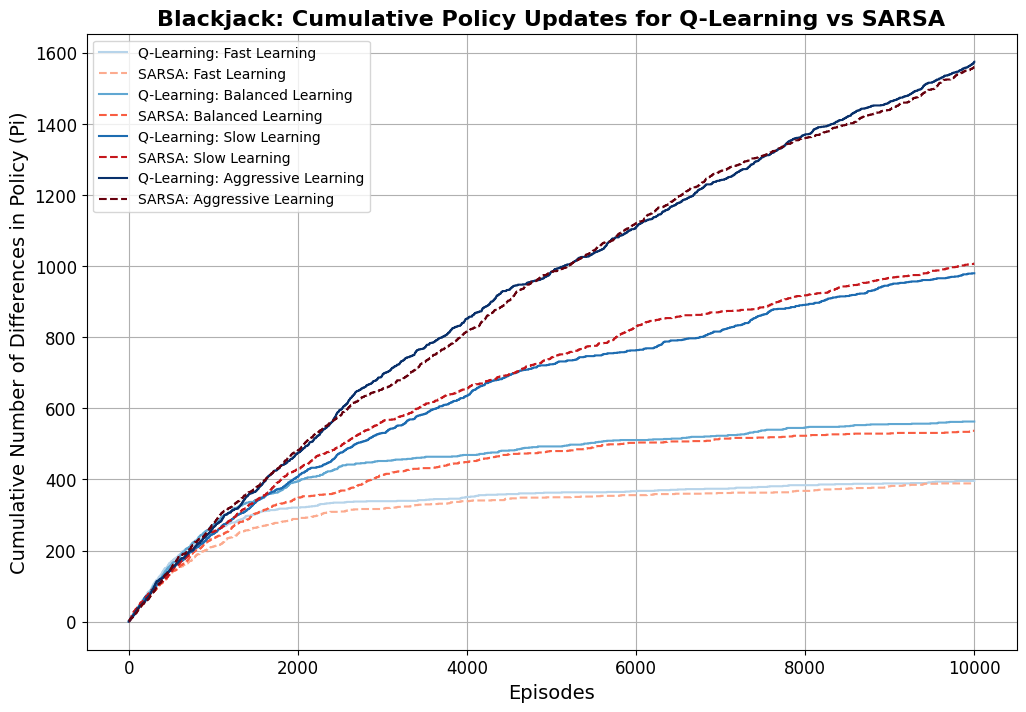

Comparison of Average Rewards:

Fast Learning:
  Q-Learning Average Reward: -0.0867
  SARSA Average Reward: -0.0858

Balanced Learning:
  Q-Learning Average Reward: -0.0816
  SARSA Average Reward: -0.0820

Slow Learning:
  Q-Learning Average Reward: -0.0604
  SARSA Average Reward: -0.0694

Aggressive Learning:
  Q-Learning Average Reward: -0.1183
  SARSA Average Reward: -0.0874


In [ ]:
import matplotlib.pyplot as plt
from bettermdptools.envs.blackjack_wrapper import BlackjackWrapper
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.rl import RL
import gymnasium as gym
import numpy as np
import time

# Parameters for the experiment
alpha_strategies = [
    {"description": "Fast Learning", "init_alpha": 0.9, "min_alpha": 0.01, "alpha_decay_ratio": 0.3},  # High initial learning rate, fast decay
    {"description": "Balanced Learning", "init_alpha": 0.5, "min_alpha": 0.01, "alpha_decay_ratio": 0.5},  # Moderate learning rate and decay
    {"description": "Slow Learning", "init_alpha": 0.5, "min_alpha": 0.1, "alpha_decay_ratio": 0.8},  # Slower decay with higher minimum learning rate
    {"description": "Aggressive Learning", "init_alpha": 0.9, "min_alpha": 0.5, "alpha_decay_ratio": 0.1},  # Very high initial learning rate, very slow decay
]
gamma = 0.6  # Fixed discount factor
n_episodes = 10_000  # Maximum number of episodes for training

# Initialize results
q_learning_results = {}
sarsa_results = {}

# Function to run Q-Learning or SARSA
def run_experiment(algorithm, strategies, result_store):
    execution_times = []
    for strategy_idx, strategy in enumerate(strategies):
        start_time = time.time()
        base_env = gym.make('Blackjack-v1', render_mode=None)
        blackjack = BlackjackWrapper(base_env)
        rl = RL(blackjack)
        if algorithm == "q_learning":
            Q, V, pi, Q_track, pi_track = rl.q_learning(
                gamma=gamma,
                init_alpha=strategy["init_alpha"], min_alpha=strategy["min_alpha"], alpha_decay_ratio=strategy["alpha_decay_ratio"],
                init_epsilon=1.0, min_epsilon=0.1, epsilon_decay_ratio=0.9,
                n_episodes=n_episodes
            )
        elif algorithm == "sarsa":
            Q, V, pi, Q_track, pi_track = rl.sarsa(
                gamma=gamma,
                init_alpha=strategy["init_alpha"], min_alpha=strategy["min_alpha"], alpha_decay_ratio=strategy["alpha_decay_ratio"],
                init_epsilon=1.0, min_epsilon=0.1, epsilon_decay_ratio=0.9,
                n_episodes=n_episodes
            )
        else:
            raise ValueError("Invalid algorithm. Choose 'q_learning' or 'sarsa'.")
        execution_time = time.time() - start_time
        execution_times.append((strategy_idx, execution_time))
        differences_in_pi = []
        cum_differences_in_pi = []
        for i in range(1, len(pi_track)):
            pi_current = pi_track[i]
            pi_previous = pi_track[i - 1]
            differences = np.sum(pi_current != pi_previous)
            differences_in_pi.append(differences)
            cum_differences_in_pi.append(sum(differences_in_pi))
        result_store[strategy_idx] = {
            "description": strategy["description"],
            "Q": Q,
            "V": V,
            "pi": pi,
            "execution_time": execution_time,
            "differences_in_pi": differences_in_pi,
            "cum_differences_in_pi": cum_differences_in_pi,
        }
    return execution_times

# Run experiments for Q-Learning and SARSA
q_learning_execution_times = run_experiment("q_learning", alpha_strategies, q_learning_results)
sarsa_execution_times = run_experiment("sarsa", alpha_strategies, sarsa_results)

# Plot cumulative differences for both algorithms
plt.figure(figsize=(12, 8))
q_colors = plt.cm.Blues(np.linspace(0.3, 1, len(alpha_strategies)))
sarsa_colors = plt.cm.Reds(np.linspace(0.3, 1, len(alpha_strategies)))

for idx, strategy_idx in enumerate(range(len(alpha_strategies))):
    description = alpha_strategies[strategy_idx]["description"]
    plt.plot(range(1, len(q_learning_results[strategy_idx]["cum_differences_in_pi"]) + 1),
             q_learning_results[strategy_idx]["cum_differences_in_pi"],
             label=f"Q-Learning: {description}", color=q_colors[idx], linestyle='-')
    plt.plot(range(1, len(sarsa_results[strategy_idx]["cum_differences_in_pi"]) + 1),
             sarsa_results[strategy_idx]["cum_differences_in_pi"],
             label=f"SARSA: {description}", color=sarsa_colors[idx], linestyle='--')

plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Cumulative Number of Differences in Policy (Pi)', fontsize=14)
plt.title('Blackjack: Cumulative Policy Updates for Q-Learning vs SARSA', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.show()

# Test and Compare Policies for Each Strategy
print("Comparison of Average Rewards:")
for strategy_idx, strategy in enumerate(alpha_strategies):
    description = strategy["description"]
    base_env = gym.make('Blackjack-v1', render_mode=None)
    blackjack = BlackjackWrapper(base_env)
    q_learning_rewards = TestEnv.test_env(env=blackjack, n_iters=100_000, render=False, pi=q_learning_results[strategy_idx]["pi"], user_input=False)
    sarsa_rewards = TestEnv.test_env(env=blackjack, n_iters=100_000, render=False, pi=sarsa_results[strategy_idx]["pi"], user_input=False)
    print(f"\n{description}:")
    print(f"  Q-Learning Average Reward: {np.mean(q_learning_rewards):.4f}")
    print(f"  SARSA Average Reward: {np.mean(sarsa_rewards):.4f}")


### **Large MDP problem: Cart Pole**

#### Cart Pole Description

**Reference:**

https://gymnasium.farama.org/environments/classic_control/cart_pole/


This environment corresponds to the version of the cart-pole problem described by Barto, Sutton, and Anderson in “Neuronlike Adaptive Elements That Can Solve Difficult Learning Control Problem”.

- Action space: Discrete(2)
- Observation space: Box([-4.8 -inf -0.41887903 -inf], [4.8 inf 0.41887903 inf], (4,), float32)



**Description:**

A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The pendulum is placed upright on the cart and the goal is to balance the pole by applying forces in the left and right direction on the cart.


**Action Space:**

The action is a ndarray with shape (1,) which can take values {0, 1} indicating the direction of the fixed force the cart is pushed with.

- 0: Push cart to the left

- 1: Push cart to the right

Note: The velocity that is reduced or increased by the applied force is not fixed and it depends on the angle the pole is pointing. The center of gravity of the pole varies the amount of energy needed to move the cart underneath it

**Observation Space:**

The observation is a ndarray with shape (4,) with the values corresponding to the following positions and velocities:

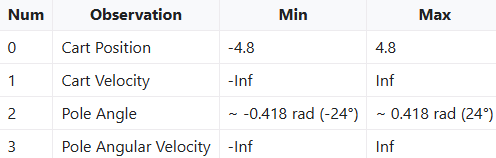

Note: While the ranges above denote the possible values for observation space of each element, it is not reflective of the allowed values of the state space in an unterminated episode. Particularly:

The cart x-position (index 0) can be take values between (-4.8, 4.8), but the episode terminates if the cart leaves the (-2.4, 2.4) range.

The pole angle can be observed between (-.418, .418) radians (or ±24°), but the episode terminates if the pole angle is not in the range (-.2095, .2095) (or ±12°)

**Starting State:**

All observations are assigned a uniformly random value in (-0.05, 0.05)

**Rewards:**

Since the goal is to keep the pole upright for as long as possible, by default, a reward of +1 is given for every step taken, including the termination step. The default reward threshold is 500 for v1 and 200 for v0 due to the time limit on the environment.

If sutton_barto_reward=True, then a reward of 0 is awarded for every non-terminating step and -1 for the terminating step. As a result, the reward threshold is 0 for v0 and v1.

**Episode End:**

The episode ends if any one of the following occurs:

Termination: Pole Angle is greater than ±12°

Termination: Cart Position is greater than ±2.4 (center of the cart reaches the edge of the display)

Truncation: Episode length is greater than 500 (200 for v0)

In [ ]:
# Reference: https://github.com/jlm429/bettermdptools/blob/master/notebooks/cartpole.ipynb
# Reference: https://github.com/jlm429/bettermdptools/blob/master/bettermdptools/envs/cartpole_wrapper.py

import gymnasium as gym
from bettermdptools.envs.cartpole_wrapper import CartpoleWrapper
from bettermdptools.envs.cartpole_model import DiscretizedCartPole
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.planner import Planner
from bettermdptools.algorithms.rl import RL
import numpy as np

base_env = gym.make('CartPole-v1', render_mode=None)

# cartpole = CartpoleWrapper(base_env,
#                 position_bins=10, velocity_bins=10, angular_velocity_bins=10,
#                 angular_center_resolution=.1, angular_outer_resolution=.5)    # Standard disretization per cartpole wrapper

cartpole = CartpoleWrapper(base_env,
                position_bins=10, velocity_bins=10, angular_velocity_bins=10,
                angular_center_resolution=.1, angular_outer_resolution=.2)    # test

#  Parameters:
#  - position_bins (int): Number of discrete bins for the cart's position.
#  - velocity_bins (int): Number of discrete bins for the cart's velocity.
#  - angular_velocity_bins (int): Number of discrete bins for the pole's angular velocity.
#  - angular_center_resolution (float): The resolution of angle bins near the center (around zero).
#  - angular_outer_resolution (float): The resolution of angle bins away from the center.


# run VI
V, V_track, pi = Planner(cartpole.P).value_iteration(gamma=0.6, n_iters=5000, theta= 1e-10)

#test policy
test_scores = TestEnv.test_env(env=cartpole, n_iters=10_000, render=False, pi=pi, user_input=False)
print("Test scores after running VI:")
print(np.mean(test_scores))

# Q-learning
Q, V, pi, Q_track, pi_track = RL(cartpole).q_learning(gamma = 0.6,                                                # Discount factor
                                                init_alpha=0.5, min_alpha=0.01, alpha_decay_ratio=0.5,        # Learning rate exponential decay
                                                init_epsilon=1.0, min_epsilon=0.1, epsilon_decay_ratio=0.9,   # Epsilon-greedy strategy for exploration rate exponential decay
                                                n_episodes=20_000)

#test policy
test_scores = TestEnv.test_env(env=cartpole, n_iters=10_000, render=False, pi=pi, user_input=False)
print("Test scores after running Q-Learning:")
print(np.mean(test_scores))

Test scores after running VI:
9.3617


Test scores after running Q-Learning:
66.9007


#### Cart Pole Sample Code

In [ ]:
# SIMPLE CART POLE RUN

print("SIMPLE CART POLE RUN\n")

import gymnasium as gym

# Create the CartPole environment
env = gym.make("CartPole-v1", render_mode="human")  # render_mode="human" to visualize the environment

# Initialize the environment
state, info = env.reset()
print(f"Initial state: {state}")  # state includes cart position, velocity, pole angle, and angular velocity

# Define a simple policy: Push right if the pole is leaning to the right, otherwise push left
def simple_policy(state):
    cart_pos, cart_vel, pole_angle, pole_angular_vel = state
    if pole_angle > 0:  # Pole is leaning to the right
        return 1  # Push right
    else:  # Pole is leaning to the left
        return 0  # Push left

# Play one game of CartPole
done = False
total_reward = 0

while not done:
    action = simple_policy(state)  # Decide action based on the policy
    print(f"Taking action: {'Push Right' if action == 1 else 'Push Left'}")

    # Perform the action in the environment
    state, reward, done, _, info = env.step(action)
    print(f"New state: {state}, Reward: {reward}")
    total_reward += reward

# Final result
print(f"Game over. Total reward: {total_reward}")
env.close()


SIMPLE CART POLE RUN

Initial state: [ 0.03683989 -0.02814301  0.02592199  0.02895495]
Taking action: Push Right
New state: [ 0.03627703  0.1665978   0.02650109 -0.2554379 ], Reward: 1.0
Taking action: Push Right
New state: [ 0.03960899  0.36133155  0.02139233 -0.53964555], Reward: 1.0
Taking action: Push Right
New state: [ 0.04683562  0.5561463   0.01059942 -0.82551205], Reward: 1.0
Taking action: Push Right
New state: [ 0.05795854  0.75112176 -0.00591082 -1.1148425 ], Reward: 1.0
Taking action: Push Left
New state: [ 0.07298098  0.5560779  -0.02820767 -0.8240196 ], Reward: 1.0
Taking action: Push Left
New state: [ 0.08410254  0.36135292 -0.04468807 -0.5403403 ], Reward: 1.0
Taking action: Push Left
New state: [ 0.0913296   0.16688667 -0.05549487 -0.2620661 ], Reward: 1.0
Taking action: Push Left
New state: [ 0.09466733 -0.02740101 -0.0607362   0.01260966], Reward: 1.0
Taking action: Push Left
New state: [ 0.09411931 -0.22160171 -0.060484    0.28552812], Reward: 1.0
Taking action: Pus

In [ ]:
# # SIMPLE CART POLE - INTERACTIVE VERSION

# print("SIMPLE CART POLE - INTERACTIVE VERSION\n")

# import gymnasium as gym

# # Create the CartPole environment
# env = gym.make("CartPole-v1", render_mode="human")  # render_mode="human" allows you to see the environment

# # Initialize the game
# state, info = env.reset()
# print("\nWelcome to the Interactive CartPole Game!")
# print(f"Initial state: {state} (Cart Position, Cart Velocity, Pole Angle, Pole Angular Velocity)")

# done = False
# total_reward = 0

# # Game loop
# while not done:
#     # Display the current state
#     cart_pos, cart_vel, pole_angle, pole_angular_vel = state
#     print(f"\nCurrent State:")
#     print(f"  Cart Position: {cart_pos:.2f}")
#     print(f"  Cart Velocity: {cart_vel:.2f}")
#     print(f"  Pole Angle: {pole_angle:.2f}")
#     print(f"  Pole Angular Velocity: {pole_angular_vel:.2f}")

#     # Ask for the player's action
#     action = None
#     while action not in ['0', '1']:
#         action = input("What would you like to do? (0: Push Left, 1: Push Right): ")

#     action = int(action)

#     # Perform the action in the environment
#     state, reward, done, _, info = env.step(action)
#     total_reward += reward

#     if done:
#         print("\nGame Over!")
#     else:
#         print(f"Action Taken: {'Push Right' if action == 1 else 'Push Left'}")
#         print(f"Reward Earned: {reward}")

# # Final result
# print(f"\nTotal Reward: {total_reward}")
# env.close()


#### Value Iteration (VI) to Solve Cart Pole problem

Gamma 0: Model converged at iteration: 2
Gamma 0.05: Model converged at iteration: 9
Gamma 0.2: Model converged at iteration: 16
Gamma 0.4: Model converged at iteration: 27
Gamma 0.6: Model converged at iteration: 47
Gamma 0.8: Model converged at iteration: 105
Gamma 0.95: Model converged at iteration: 450


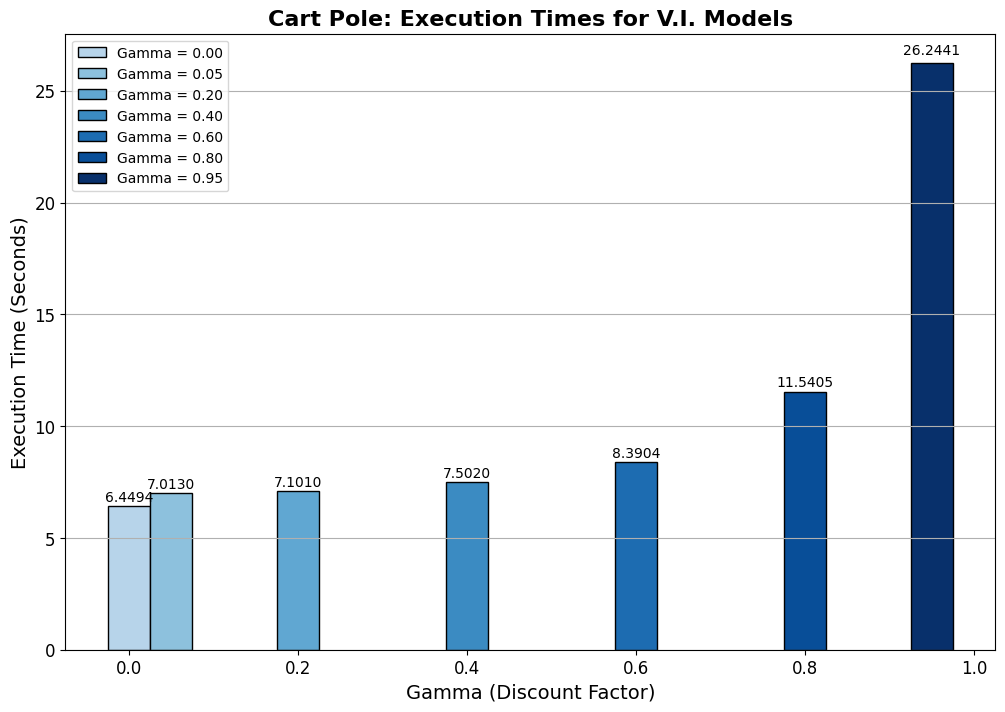

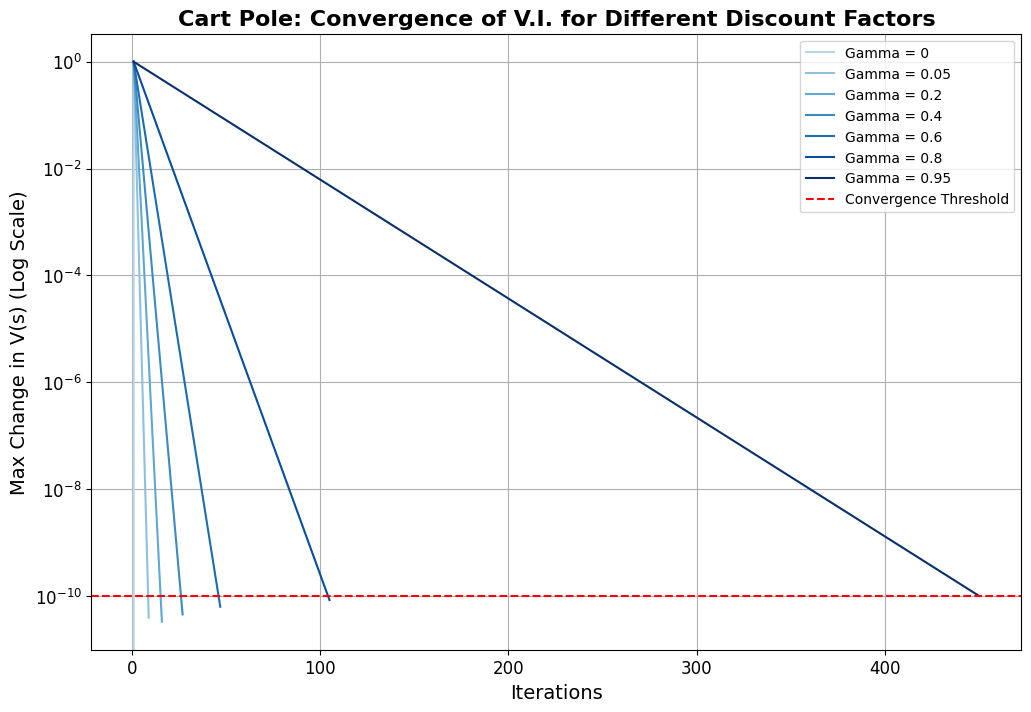


Testing policy for Gamma = 0
Gamma 0: Average reward over 100,000 episodes: 9.3531

Testing policy for Gamma = 0.05
Gamma 0.05: Average reward over 100,000 episodes: 9.3574

Testing policy for Gamma = 0.2
Gamma 0.2: Average reward over 100,000 episodes: 9.3551

Testing policy for Gamma = 0.4
Gamma 0.4: Average reward over 100,000 episodes: 9.3589

Testing policy for Gamma = 0.6
Gamma 0.6: Average reward over 100,000 episodes: 9.3564

Testing policy for Gamma = 0.8
Gamma 0.8: Average reward over 100,000 episodes: 9.3535

Testing policy for Gamma = 0.95
Gamma 0.95: Average reward over 100,000 episodes: 9.3573


In [ ]:
import matplotlib.pyplot as plt
from bettermdptools.envs.cartpole_wrapper import CartpoleWrapper
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.planner import Planner
import gymnasium as gym
import numpy as np
import time  # For tracking execution time

# Parameters for Value Iteration
gammas = [0, 0.05, 0.2, 0.4, 0.6, 0.8, 0.95]  # Discount factors to evaluate
n_iters = 1_000  # Maximum number of iterations
theta = 1e-10  # Convergence criterion

# Store results for plotting
results = {}
execution_times = []  # To track execution time for each gamma

for gamma in gammas:
    # Track execution time for Value Iteration
    start_time = time.time()

    # Initialize the Cart Pole environment
    base_env = gym.make('CartPole-v1', render_mode=None)
    cartpole = CartpoleWrapper(base_env,
                               position_bins=10,
                               velocity_bins=10,
                               angular_velocity_bins=10,
                               angular_center_resolution=0.1,
                               angular_outer_resolution=0.2)

    # Run Value Iteration for the current gamma
    planner = Planner(cartpole.P)
    V, V_track, pi = planner.value_iteration(gamma=gamma, n_iters=n_iters, theta=theta)

    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append((gamma, execution_time))  # Store gamma and its execution time

    # Find the iteration where the model converges
    convergence_iteration = 0
    for i in range(len(V_track) - 1):
        if np.all(V_track[i + 1] == 0):  # Check if the next row is all zeros
            convergence_iteration = i
            break

    # Adjust the convergence_iteration to n_iters if not converged
    if convergence_iteration == 0:
        convergence_iteration = n_iters
        print(f"Gamma {gamma}: Model did not converge within the given iterations.")
    else:
        print(f"Gamma {gamma}: Model converged at iteration: {convergence_iteration}")

    # Compute convergence deltas (up to convergence)
    convergence_deltas = [
        np.max(np.abs(V_track[i] - V_track[i - 1]))
        for i in range(1, convergence_iteration + 1)
    ]

    # Store the results
    results[gamma] = {
        "V": V,
        "V_track": V_track,
        "pi": pi,
        "convergence_deltas": convergence_deltas,
        "convergence_iteration": convergence_iteration,
        "execution_time": execution_time
    }

# Plot Execution Times
gammas_sorted, times_sorted = zip(*sorted(execution_times, key=lambda x: x[0]))  # Sort by gamma for plotting
bar_width = 0.05  # Adjust the width of the bars
colors = plt.cm.Blues(np.linspace(0.3, 1, len(gammas_sorted)))  # Generate a color map

plt.figure(figsize=(12, 8))
for idx, (gamma, time) in enumerate(zip(gammas_sorted, times_sorted)):
    plt.bar(gamma, time, width=bar_width, label=f"Gamma = {gamma:.2f}", color=colors[idx], edgecolor='black')
    # Display time with 3 decimal places on top of each bar
    plt.text(gamma, time + time * 0.01, f"{time:.4f}", ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Gamma (Discount Factor)', fontsize=14)
plt.ylabel('Execution Time (Seconds)', fontsize=14)
plt.title('Cart Pole: Execution Times for V.I. Models', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10, loc='upper left')  # Place legend inside the upper-left corner
plt.grid(axis='y')
plt.show()

print()

# Plot Convergence for Different Gammas
colors = plt.cm.Blues(np.linspace(0.3, 1, len(gammas)))
plt.figure(figsize=(12, 8))
for idx, gamma in enumerate(gammas):
    plt.plot(range(1, len(results[gamma]["convergence_deltas"]) + 1),
             results[gamma]["convergence_deltas"],
             label=f"Gamma = {gamma}", color=colors[idx])
plt.axhline(y=theta, color='r', linestyle='--', label=f"Convergence Threshold")
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Max Change in V(s) (Log Scale)', fontsize=14)
plt.yscale('log')
plt.title('Cart Pole: Convergence of V.I. for Different Discount Factors', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.show()

# Test and Compare Policies for Each Gamma
for gamma in gammas:
    print(f"\nTesting policy for Gamma = {gamma}")
    reward_scores = TestEnv.test_env(env=cartpole, n_iters=100_000, render=False, pi=results[gamma]["pi"], user_input=False)
    print(f"Gamma {gamma}: Average reward over 100,000 episodes: {np.mean(reward_scores):.4f}")


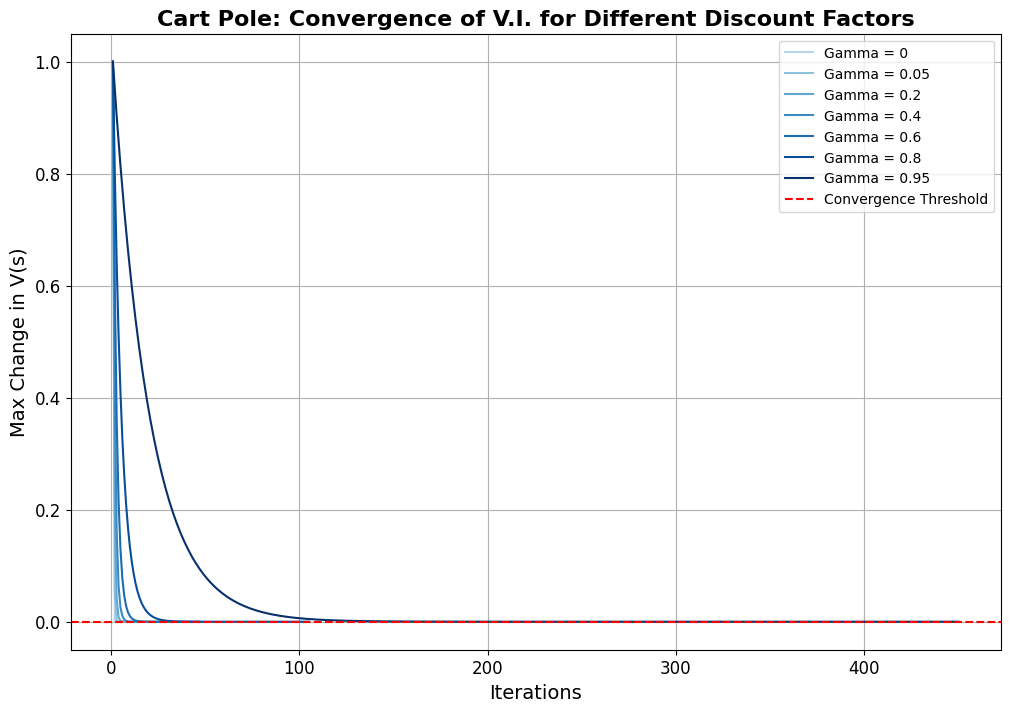

In [ ]:
# Plot Convergence for Different Gammas
colors = plt.cm.Blues(np.linspace(0.3, 1, len(gammas)))
plt.figure(figsize=(12, 8))
for idx, gamma in enumerate(gammas):
    plt.plot(range(1, len(results[gamma]["convergence_deltas"]) + 1),
             results[gamma]["convergence_deltas"],
             label=f"Gamma = {gamma}", color=colors[idx])
plt.axhline(y=theta, color='r', linestyle='--', label=f"Convergence Threshold")
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Max Change in V(s)', fontsize=14)
# plt.yscale('log')
plt.title('Cart Pole: Convergence of V.I. for Different Discount Factors', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.show()

#### Policy Iteration (PI) to Solve Cart Pole problem

Gamma 0: Model converged at iteration: 2
Gamma 0.05: Model converged at iteration: 6
Gamma 0.2: Model converged at iteration: 9
Gamma 0.4: Model converged at iteration: 15
Gamma 0.6: Model converged at iteration: 3
Gamma 0.8: Model converged at iteration: 3
Gamma 0.95: Model converged at iteration: 3


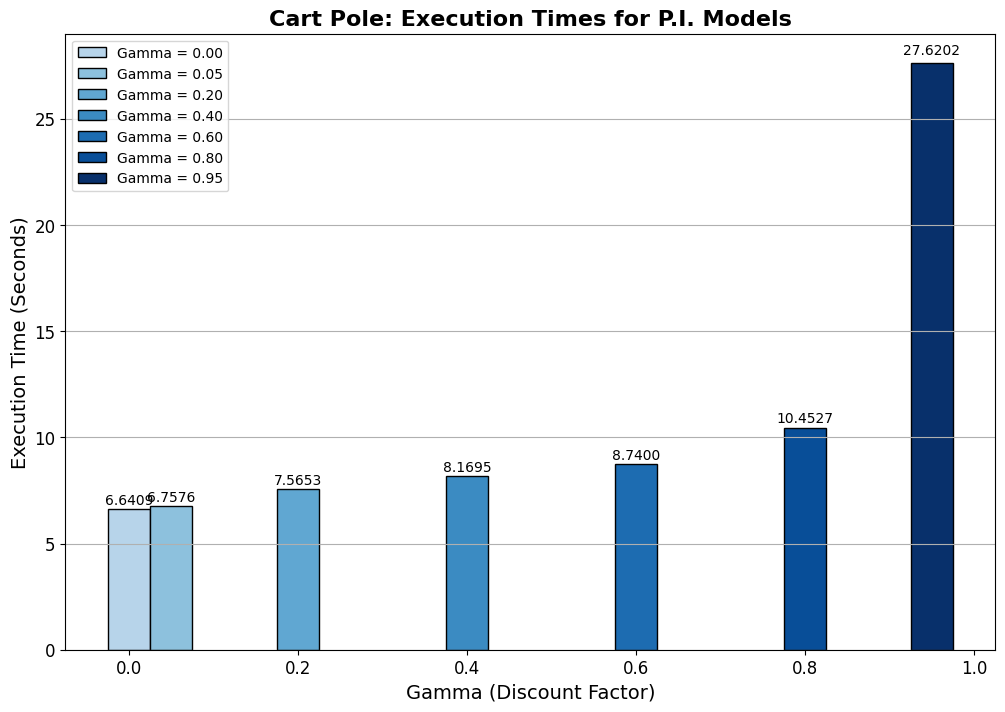

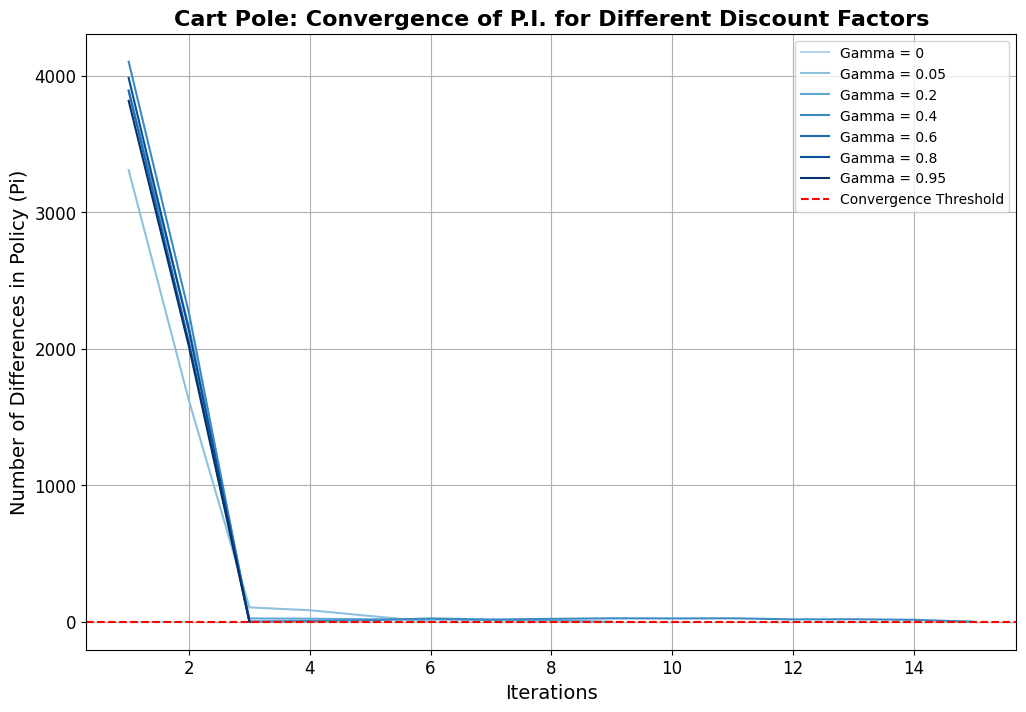


Testing policy for Gamma = 0
Gamma 0: Average reward over 100,000 episodes: 9.3537

Testing policy for Gamma = 0.05
Gamma 0.05: Average reward over 100,000 episodes: 9.3558

Testing policy for Gamma = 0.2
Gamma 0.2: Average reward over 100,000 episodes: 9.3541

Testing policy for Gamma = 0.4
Gamma 0.4: Average reward over 100,000 episodes: 9.3519

Testing policy for Gamma = 0.6
Gamma 0.6: Average reward over 100,000 episodes: 9.3553

Testing policy for Gamma = 0.8
Gamma 0.8: Average reward over 100,000 episodes: 9.3543

Testing policy for Gamma = 0.95
Gamma 0.95: Average reward over 100,000 episodes: 9.3572


In [ ]:
import matplotlib.pyplot as plt
from bettermdptools.envs.cartpole_wrapper import CartpoleWrapper
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.planner import Planner
import gymnasium as gym
import numpy as np
import time  # For tracking execution time

# Parameters for Policy Iteration
gammas = [0, 0.05, 0.2, 0.4, 0.6, 0.8, 0.95]  # Discount factors to evaluate
n_iters = 1_000  # Maximum number of iterations
theta = 1e-10  # Convergence criterion for policy evaluation

# Store results for plotting
results = {}
execution_times = []  # To track execution time for each gamma

for gamma in gammas:
    # Track execution time for Policy Iteration
    start_time = time.time()

    # Initialize the Cart Pole environment
    base_env = gym.make('CartPole-v1', render_mode=None)
    cartpole = CartpoleWrapper(base_env,
                               position_bins=10,
                               velocity_bins=10,
                               angular_velocity_bins=10,
                               angular_center_resolution=0.1,
                               angular_outer_resolution=0.2)

    # Run Policy Iteration for the current gamma
    planner = Planner(cartpole.P)
    V, V_track, pi = planner.policy_iteration(gamma=gamma, n_iters=n_iters, theta=theta)

    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append((gamma, execution_time))  # Store gamma and its execution time

    # Find the convergence iteration based on V_track being all zeros
    convergence_iteration = 0
    for i in range(1, len(V_track)):
        if np.all(V_track[i] == 0):
            convergence_iteration = i - 1
            break

    # If no convergence detected, set it to n_iters
    if convergence_iteration == 0:
        convergence_iteration = n_iters
        print(f"Gamma {gamma}: Model did not converge within the given iterations.")
    else:
        print(f"Gamma {gamma}: Model converged at iteration: {convergence_iteration}")

    # Track the number of differences in pi between successive iterations
    differences_in_pi = []
    for i in range(1, len(V_track)):
        if np.all(V_track[i] == 0):  # Stop when V_track is all zeros
            break
        pi_current = planner.policy_improvement(V_track[i], gamma)
        pi_previous = planner.policy_improvement(V_track[i - 1], gamma)
        differences = sum(1 for s in pi_current.keys() if pi_current[s] != pi_previous[s])
        differences_in_pi.append(differences)

    # Store the results
    results[gamma] = {
        "V": V,
        "V_track": V_track,
        "pi": pi,
        "convergence_iteration": convergence_iteration,
        "execution_time": execution_time,
        "differences_in_pi": differences_in_pi
    }

# Plot Execution Times
gammas_sorted, times_sorted = zip(*sorted(execution_times, key=lambda x: x[0]))  # Sort by gamma for plotting
bar_width = 0.05  # Adjust the width of the bars
colors = plt.cm.Blues(np.linspace(0.3, 1, len(gammas_sorted)))  # Generate a color map

plt.figure(figsize=(12, 8))
for idx, (gamma, time) in enumerate(zip(gammas_sorted, times_sorted)):
    plt.bar(gamma, time, width=bar_width, label=f"Gamma = {gamma:.2f}", color=colors[idx], edgecolor='black')
    # Display time with 3 decimal places on top of each bar
    plt.text(gamma, time + time * 0.01, f"{time:.4f}", ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Gamma (Discount Factor)', fontsize=14)
plt.ylabel('Execution Time (Seconds)', fontsize=14)
plt.title('Cart Pole: Execution Times for P.I. Models', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10, loc='upper left')  # Place legend inside the upper-left corner
plt.grid(axis='y')
plt.show()

print()
# Plot the number of differences in pi for each gamma
plt.figure(figsize=(12, 8))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(gammas)))  # Generate a color map

for idx, gamma in enumerate(gammas):
    plt.plot(range(1, len(results[gamma]["differences_in_pi"]) + 1),
             results[gamma]["differences_in_pi"],
             label=f"Gamma = {gamma}", color=colors[idx])
plt.axhline(y=theta, color='r', linestyle='--', label=f"Convergence Threshold")
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Number of Differences in Policy (Pi)', fontsize=14)
plt.title('Cart Pole: Convergence of P.I. for Different Discount Factors', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.show()

# Test and Compare Policies for Each Gamma
for gamma in gammas:
    print(f"\nTesting policy for Gamma = {gamma}")
    reward_scores = TestEnv.test_env(env=cartpole, n_iters=100_000, render=False, pi=results[gamma]["pi"], user_input=False)
    print(f"Gamma {gamma}: Average reward over 100,000 episodes: {np.mean(reward_scores):.4f}")


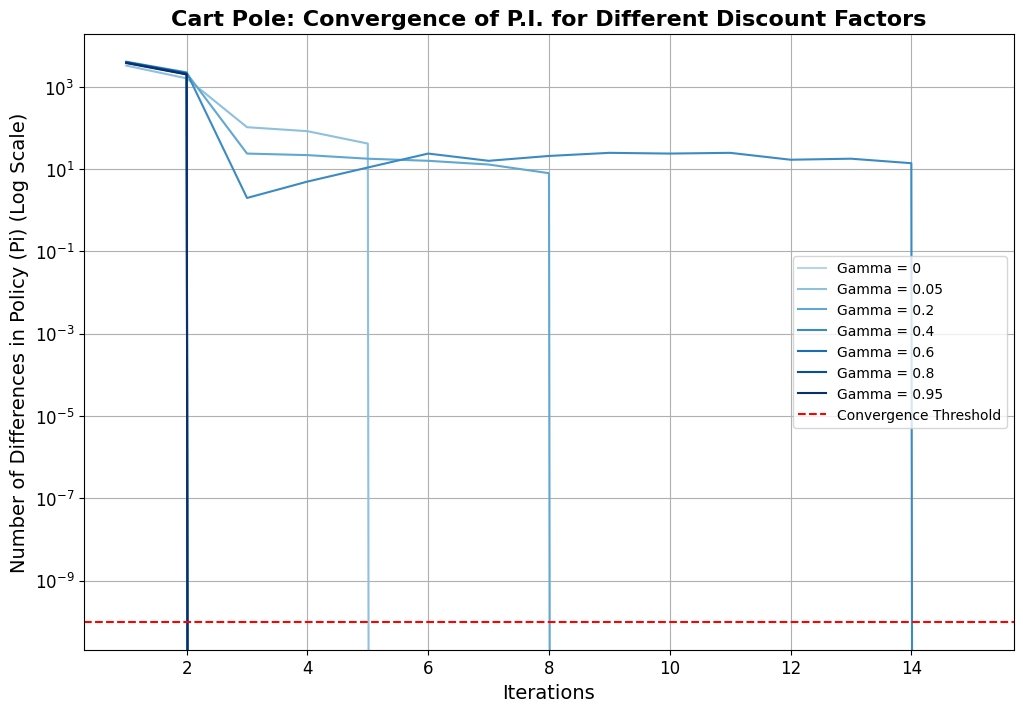

In [ ]:
# Plot the number of differences in pi for each gamma
plt.figure(figsize=(12, 8))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(gammas)))  # Generate a color map

for idx, gamma in enumerate(gammas):
    plt.plot(range(1, len(results[gamma]["differences_in_pi"]) + 1),
             results[gamma]["differences_in_pi"],
             label=f"Gamma = {gamma}", color=colors[idx])
plt.axhline(y=theta, color='r', linestyle='--', label=f"Convergence Threshold")
plt.yscale('log')
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Number of Differences in Policy (Pi) (Log Scale)', fontsize=14)
plt.title('Cart Pole: Convergence of P.I. for Different Discount Factors', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.show()

#### Q-Learning (RL algorithm) to Solve Cart Pole problem

 80%|███████▉  | 15908/20000 [04:48<03:17, 20.77it/s]/usr/local/lib/python3.10/dist-packages/bettermdptools/algorithms/rl.py:183: UserWarning: Episode was truncated.  TD target value may be incorrect.
  warnings.warn("Episode was truncated.  TD target value may be incorrect.")


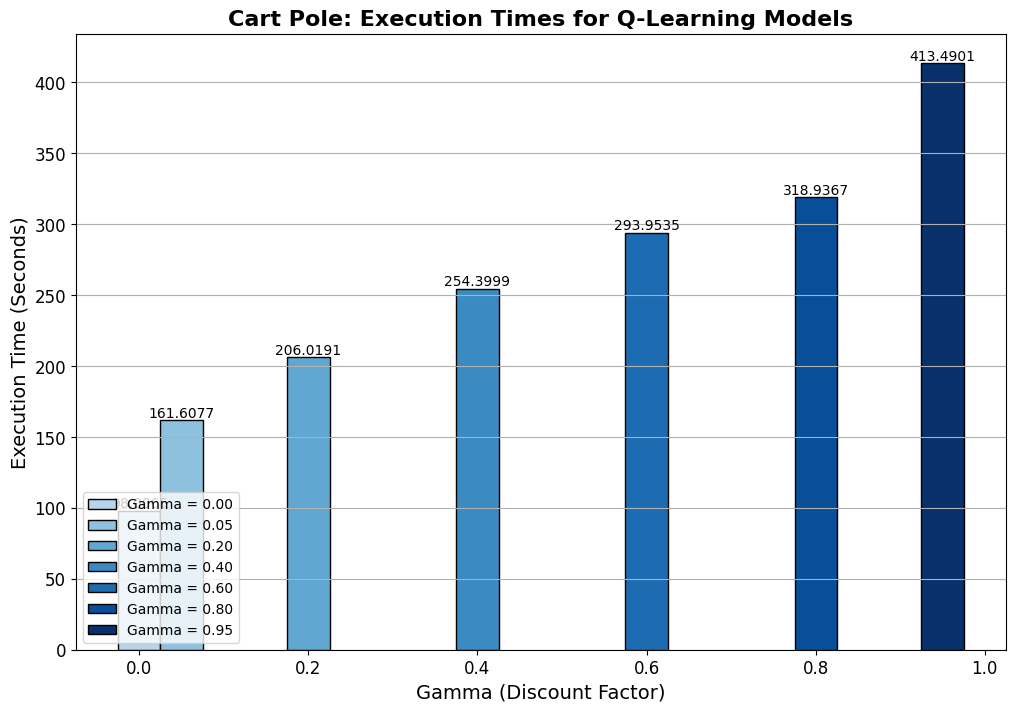

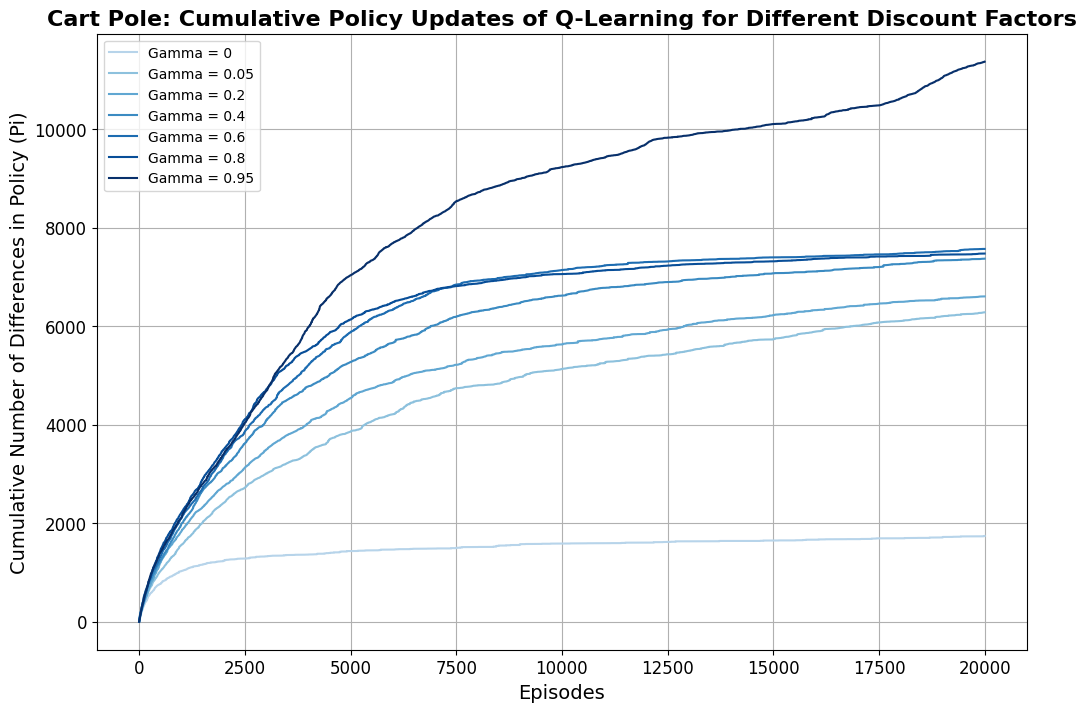


Testing policy for Gamma = 0
Gamma 0: Average reward over 100,000 episodes: 11.0687

Testing policy for Gamma = 0.05
Gamma 0.05: Average reward over 100,000 episodes: 64.8051

Testing policy for Gamma = 0.2
Gamma 0.2: Average reward over 100,000 episodes: 66.9373

Testing policy for Gamma = 0.4
Gamma 0.4: Average reward over 100,000 episodes: 78.0355

Testing policy for Gamma = 0.6
Gamma 0.6: Average reward over 100,000 episodes: 101.7594

Testing policy for Gamma = 0.8
Gamma 0.8: Average reward over 100,000 episodes: 107.3813

Testing policy for Gamma = 0.95
Gamma 0.95: Average reward over 100,000 episodes: 109.8427


In [ ]:
import matplotlib.pyplot as plt
from bettermdptools.envs.cartpole_wrapper import CartpoleWrapper
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.rl import RL  # For Q-Learning
import gymnasium as gym
import numpy as np
import time  # For tracking execution time

# Parameters for Q-Learning
gammas = [0, 0.05, 0.2, 0.4, 0.6, 0.8, 0.95]  # Discount factors to evaluate
n_episodes = 20_000  # Maximum number of episodes for training

# Store results for plotting
results = {}
execution_times = []  # To track execution time for each gamma

for gamma in gammas:
    # Track execution time for Q-Learning
    start_time = time.time()

    # Initialize the Cart Pole environment
    base_env = gym.make('CartPole-v1', render_mode=None)
    cartpole = CartpoleWrapper(base_env,
                               position_bins=10,
                               velocity_bins=10,
                               angular_velocity_bins=10,
                               angular_center_resolution=0.1,
                               angular_outer_resolution=0.2)

    # Run Q-Learning for the current gamma
    rl = RL(cartpole)
    Q, V, pi, Q_track, pi_track = rl.q_learning(gamma=gamma,                                                # Discount factor
                                                init_alpha=0.5, min_alpha=0.01, alpha_decay_ratio=0.5,        # Learning rate exponential decay
                                                init_epsilon=1.0, min_epsilon=0.1, epsilon_decay_ratio=0.9,   # Epsilon-greedy strategy for exploration rate exponential decay
                                                n_episodes=n_episodes)

    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append((gamma, execution_time))  # Store gamma and its execution time

    # Track the number of differences in pi between successive iterations
    differences_in_pi = []
    cum_differences_in_pi = []  # List to store cumulative differences

    for i in range(1, len(pi_track)):
        pi_current = pi_track[i]
        pi_previous = pi_track[i - 1]
        differences = np.sum(pi_current != pi_previous)  # Compute differences
        differences_in_pi.append(differences)

        # Compute cumulative differences
        cumulative_difference = sum(differences_in_pi)
        cum_differences_in_pi.append(cumulative_difference)

    # Store the results
    results[gamma] = {
        "Q": Q,
        "V": V,
        "pi": pi,
        "execution_time": execution_time,
        "differences_in_pi": differences_in_pi,
        "cum_differences_in_pi": cum_differences_in_pi  # Add cumulative differences
    }

# Plot Execution Times
gammas_sorted, times_sorted = zip(*sorted(execution_times, key=lambda x: x[0]))  # Sort by gamma for plotting
bar_width = 0.05  # Adjust the width of the bars
colors = plt.cm.Blues(np.linspace(0.3, 1, len(gammas_sorted)))  # Generate a color map

plt.figure(figsize=(12, 8))
for idx, (gamma, time) in enumerate(zip(gammas_sorted, times_sorted)):
    plt.bar(gamma, time, width=bar_width, label=f"Gamma = {gamma:.2f}", color=colors[idx], edgecolor='black')
    # Display time with 3 decimal places on top of each bar
    plt.text(gamma, time + 0.01, f"{time:.4f}", ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Gamma (Discount Factor)', fontsize=14)
plt.ylabel('Execution Time (Seconds)', fontsize=14)
plt.title('Cart Pole: Execution Times for Q-Learning Models', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10, loc='lower left')  # Place legend inside the upper-left corner
plt.grid(axis='y')
plt.show()

# Plot the number of cumulative differences in pi for each gamma
plt.figure(figsize=(12, 8))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(gammas)))  # Generate a color map

for idx, gamma in enumerate(gammas):
    plt.plot(range(1, len(results[gamma]["cum_differences_in_pi"]) + 1),
             results[gamma]["cum_differences_in_pi"],
             label=f"Gamma = {gamma}", color=colors[idx])

plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Cumulative Number of Differences in Policy (Pi)', fontsize=14)
plt.title('Cart Pole: Cumulative Policy Updates of Q-Learning for Different Discount Factors', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.show()

# Test and Compare Policies for Each Gamma
for gamma in gammas:
    print(f"\nTesting policy for Gamma = {gamma}")
    reward_scores = TestEnv.test_env(env=cartpole, n_iters=100_000, render=False, pi=results[gamma]["pi"], user_input=False)
    print(f"Gamma {gamma}: Average reward over 100,000 episodes: {np.mean(reward_scores):.4f}")


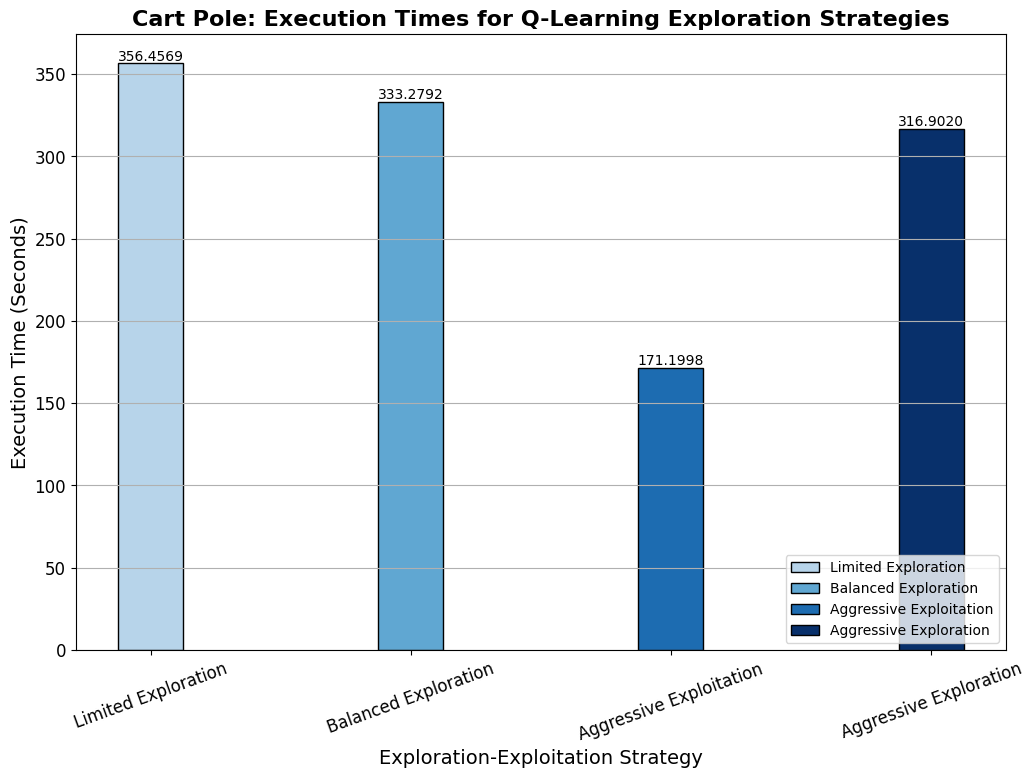

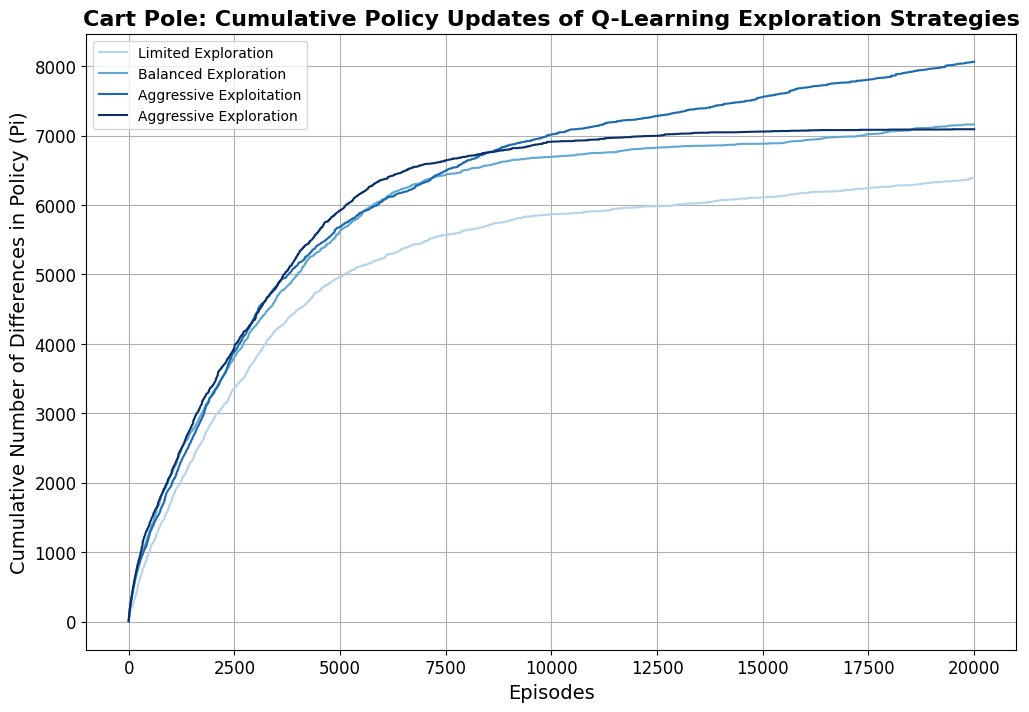


Testing policy for Limited Exploration
Limited Exploration: Average reward over 100,000 episodes: 103.8695

Testing policy for Balanced Exploration
Balanced Exploration: Average reward over 100,000 episodes: 114.8886

Testing policy for Aggressive Exploitation
Aggressive Exploitation: Average reward over 100,000 episodes: 118.8275

Testing policy for Aggressive Exploration
Aggressive Exploration: Average reward over 100,000 episodes: 98.8163


In [ ]:
import matplotlib.pyplot as plt
from bettermdptools.envs.cartpole_wrapper import CartpoleWrapper
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.rl import RL  # For Q-Learning
import gymnasium as gym
import numpy as np
import time  # For tracking execution time

# Parameters for the experiment
exploration_strategies = [
    {"description": "Limited Exploration", "init_epsilon": 0.5, "min_epsilon": 0.1, "epsilon_decay_ratio": 0.9},  # Limited exploration
    {"description": "Balanced Exploration", "init_epsilon": 1.0, "min_epsilon": 0.1, "epsilon_decay_ratio": 0.9},  # Balanced exploration
    {"description": "Aggressive Exploitation", "init_epsilon": 1.0, "min_epsilon": 0.5, "epsilon_decay_ratio": 0.5},  # Aggressive exploitation
    {"description": "Aggressive Exploration", "init_epsilon": 1.0, "min_epsilon": 0.01, "epsilon_decay_ratio": 0.99},  # Aggressive exploration
]
gamma = 0.6  # Fixed discount factor
n_episodes = 20_000  # Maximum number of episodes for training
results = {}
execution_times = []

for strategy_idx, strategy in enumerate(exploration_strategies):

    # Track execution time for Q-Learning
    start_time = time.time()

    # Initialize the Cart Pole environment
    base_env = gym.make('CartPole-v1', render_mode=None)
    cartpole = CartpoleWrapper(base_env,
                               position_bins=10,
                               velocity_bins=10,
                               angular_velocity_bins=10,
                               angular_center_resolution=0.1,
                               angular_outer_resolution=0.2)

    # Run Q-Learning with the current exploration strategy
    rl = RL(cartpole)
    Q, V, pi, Q_track, pi_track = rl.q_learning(
        gamma=gamma,  # Fixed discount factor
        init_alpha=0.5, min_alpha=0.01, alpha_decay_ratio=0.5,        # Learning rate exponential decay
        init_epsilon=strategy["init_epsilon"], min_epsilon=strategy["min_epsilon"], epsilon_decay_ratio=strategy["epsilon_decay_ratio"],  # Exploration-exploitation strategy
        n_episodes=n_episodes
    )

    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append((strategy_idx, execution_time))  # Store index and its execution time

    # Track the number of differences in pi between successive iterations
    differences_in_pi = []
    cum_differences_in_pi = []  # List to store cumulative differences

    for i in range(1, len(pi_track)):
        pi_current = pi_track[i]
        pi_previous = pi_track[i - 1]
        differences = np.sum(pi_current != pi_previous)  # Compute differences
        differences_in_pi.append(differences)
        cumulative_difference = sum(differences_in_pi)
        cum_differences_in_pi.append(cumulative_difference)

    # Store the results
    results[strategy_idx] = {
        "description": strategy["description"],
        "Q": Q,
        "V": V,
        "pi": pi,
        "execution_time": execution_time,
        "differences_in_pi": differences_in_pi,
        "cum_differences_in_pi": cum_differences_in_pi  # Add cumulative differences
    }

# Plot Execution Times
strategies_sorted, times_sorted = zip(*sorted(execution_times, key=lambda x: x[0]))  # Sort by strategy index for plotting
bar_width = 0.25  # Adjust the width of the bars
colors = plt.cm.Blues(np.linspace(0.3, 1, len(strategies_sorted)))  # Generate a color map

plt.figure(figsize=(12, 8))
for idx, (strategy_idx, time) in enumerate(zip(strategies_sorted, times_sorted)):
    description = exploration_strategies[strategy_idx]["description"]
    plt.bar(strategy_idx, time, width=bar_width, label=f"{description}", color=colors[idx], edgecolor='black')
    plt.text(strategy_idx, time + 0.05, f"{time:.4f}", ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Exploration-Exploitation Strategy', fontsize=14)
plt.ylabel('Execution Time (Seconds)', fontsize=14)
plt.title('Cart Pole: Execution Times for Q-Learning Exploration Strategies', fontsize=16, fontweight='bold')
plt.xticks(ticks=range(len(exploration_strategies)), labels=[strategy["description"] for strategy in exploration_strategies], fontsize=12, rotation=20)
plt.yticks(fontsize=12)
plt.legend(fontsize=10, loc='lower right')
plt.grid(axis='y')
plt.show()
print()

# Plot the cumulative number of differences in pi for each strategy
plt.figure(figsize=(12, 8))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(exploration_strategies)))  # Generate a color map

for idx, strategy_idx in enumerate(strategies_sorted):
    description = exploration_strategies[strategy_idx]["description"]
    plt.plot(range(1, len(results[strategy_idx]["cum_differences_in_pi"]) + 1),
             results[strategy_idx]["cum_differences_in_pi"],
             label=f"{description}", color=colors[idx])

plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Cumulative Number of Differences in Policy (Pi)', fontsize=14)
plt.title('Cart Pole: Cumulative Policy Updates of Q-Learning Exploration Strategies', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.show()

# Test and Compare Policies for Each Strategy
for strategy_idx, strategy in enumerate(exploration_strategies):
    description = strategy["description"]
    print(f"\nTesting policy for {description}")
    reward_scores = TestEnv.test_env(env=cartpole, n_iters=100_000, render=False, pi=results[strategy_idx]["pi"], user_input=False)
    print(f"{description}: Average reward over 100,000 episodes: {np.mean(reward_scores):.4f}")


 81%|████████  | 16181/20000 [04:39<01:56, 32.80it/s]/usr/local/lib/python3.10/dist-packages/bettermdptools/algorithms/rl.py:183: UserWarning: Episode was truncated.  TD target value may be incorrect.
  warnings.warn("Episode was truncated.  TD target value may be incorrect.")


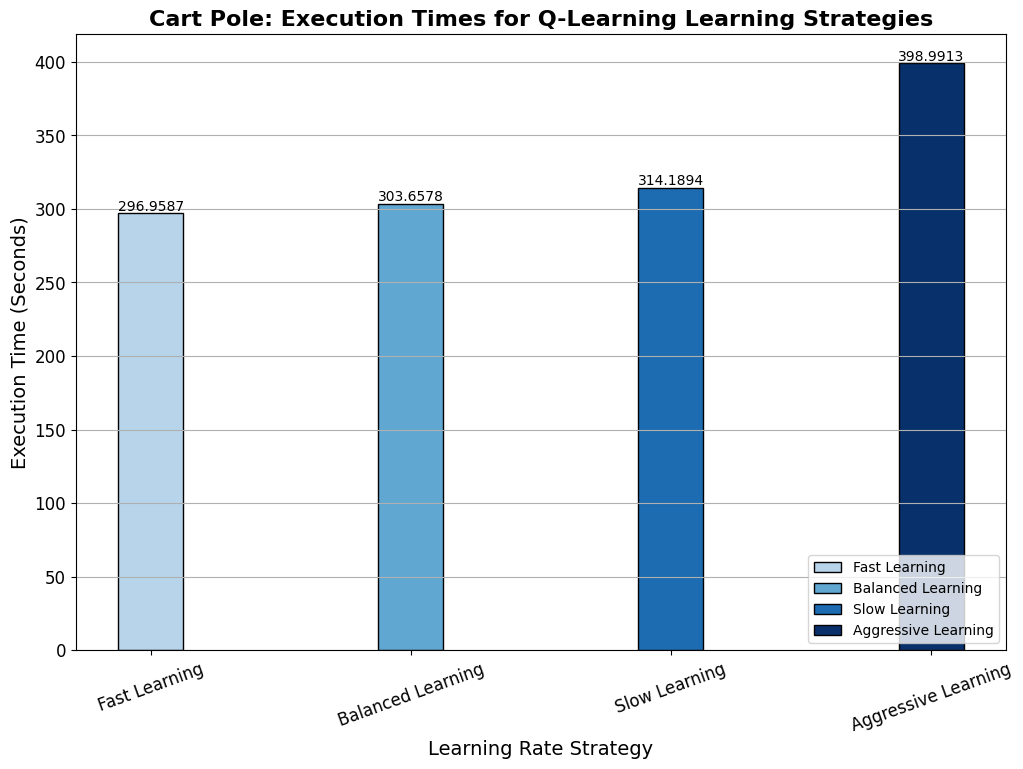

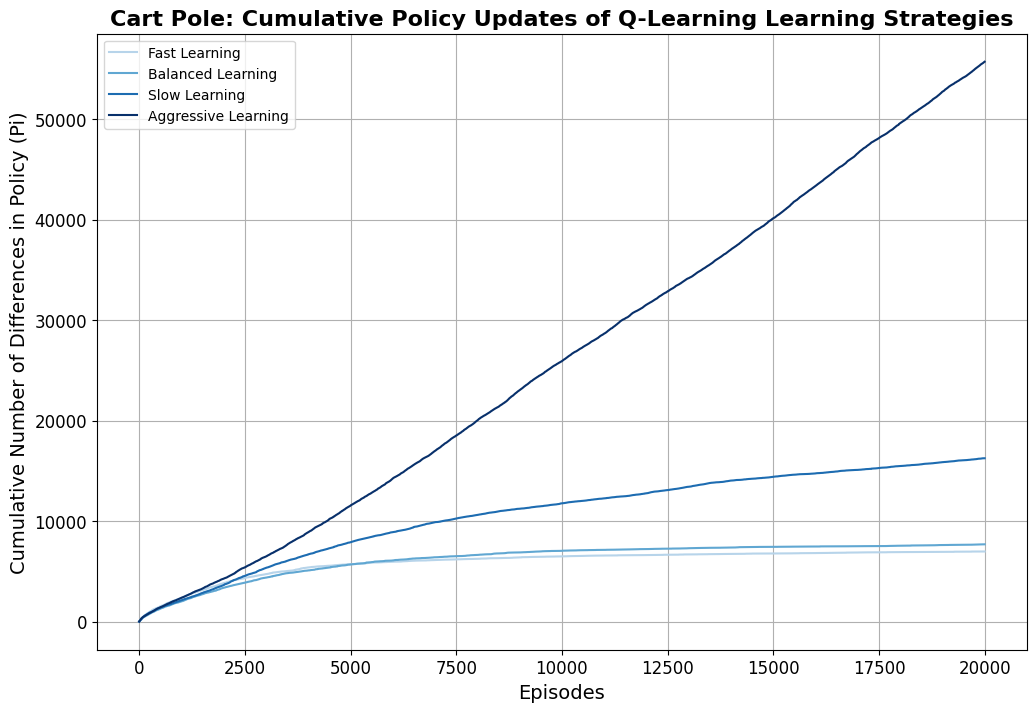


Testing policy for Fast Learning
Fast Learning: Average reward over 100,000 episodes: 91.5966

Testing policy for Balanced Learning
Balanced Learning: Average reward over 100,000 episodes: 100.5694

Testing policy for Slow Learning
Slow Learning: Average reward over 100,000 episodes: 121.6863

Testing policy for Aggressive Learning
Aggressive Learning: Average reward over 100,000 episodes: 201.6467


In [ ]:
import matplotlib.pyplot as plt
from bettermdptools.envs.cartpole_wrapper import CartpoleWrapper
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.rl import RL  # For Q-Learning
import gymnasium as gym
import numpy as np
import time  # For tracking execution time

# Parameters for the experiment
alpha_strategies = [
    {"description": "Fast Learning", "init_alpha": 0.9, "min_alpha": 0.01, "alpha_decay_ratio": 0.3},  # High initial learning rate, fast decay
    {"description": "Balanced Learning", "init_alpha": 0.5, "min_alpha": 0.01, "alpha_decay_ratio": 0.5},  # Moderate learning rate and decay
    {"description": "Slow Learning", "init_alpha": 0.5, "min_alpha": 0.1, "alpha_decay_ratio": 0.8},  # Slower decay with higher minimum learning rate
    {"description": "Aggressive Learning", "init_alpha": 0.9, "min_alpha": 0.5, "alpha_decay_ratio": 0.1},  # Very high initial learning rate, very slow decay
]
gamma = 0.6  # Fixed discount factor
n_episodes = 20_000  # Maximum number of episodes for training
results = {}
execution_times = []

for strategy_idx, strategy in enumerate(alpha_strategies):

    # Track execution time for Q-Learning
    start_time = time.time()

    # Initialize the Cart Pole environment
    base_env = gym.make('CartPole-v1', render_mode=None)
    cartpole = CartpoleWrapper(base_env,
                               position_bins=10,
                               velocity_bins=10,
                               angular_velocity_bins=10,
                               angular_center_resolution=0.1,
                               angular_outer_resolution=0.2)

    # Run Q-Learning with the current alpha strategy
    rl = RL(cartpole)
    Q, V, pi, Q_track, pi_track = rl.q_learning(
        gamma=gamma,  # Fixed discount factor
        init_alpha=strategy["init_alpha"], min_alpha=strategy["min_alpha"], alpha_decay_ratio=strategy["alpha_decay_ratio"],  # Learning rate strategy
        init_epsilon=1.0, min_epsilon=0.1, epsilon_decay_ratio=0.9,  # Fixed exploration strategy for all
        n_episodes=n_episodes
    )

    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append((strategy_idx, execution_time))  # Store index and its execution time

    # Track the number of differences in pi between successive iterations
    differences_in_pi = []
    cum_differences_in_pi = []  # List to store cumulative differences

    for i in range(1, len(pi_track)):
        pi_current = pi_track[i]
        pi_previous = pi_track[i - 1]
        differences = np.sum(pi_current != pi_previous)  # Compute differences
        differences_in_pi.append(differences)
        cumulative_difference = sum(differences_in_pi)
        cum_differences_in_pi.append(cumulative_difference)

    # Store the results
    results[strategy_idx] = {
        "description": strategy["description"],
        "Q": Q,
        "V": V,
        "pi": pi,
        "execution_time": execution_time,
        "differences_in_pi": differences_in_pi,
        "cum_differences_in_pi": cum_differences_in_pi  # Add cumulative differences
    }

# Plot Execution Times
strategies_sorted, times_sorted = zip(*sorted(execution_times, key=lambda x: x[0]))  # Sort by strategy index for plotting
bar_width = 0.25  # Adjust the width of the bars
colors = plt.cm.Blues(np.linspace(0.3, 1, len(strategies_sorted)))  # Generate a color map

plt.figure(figsize=(12, 8))
for idx, (strategy_idx, time) in enumerate(zip(strategies_sorted, times_sorted)):
    description = alpha_strategies[strategy_idx]["description"]
    plt.bar(strategy_idx, time, width=bar_width, label=f"{description}", color=colors[idx], edgecolor='black')
    plt.text(strategy_idx, time + 0.05, f"{time:.4f}", ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Learning Rate Strategy', fontsize=14)
plt.ylabel('Execution Time (Seconds)', fontsize=14)
plt.title('Cart Pole: Execution Times for Q-Learning Learning Strategies', fontsize=16, fontweight='bold')
plt.xticks(ticks=range(len(alpha_strategies)), labels=[strategy["description"] for strategy in alpha_strategies], fontsize=12, rotation=20)
plt.yticks(fontsize=12)
plt.legend(fontsize=10, loc='lower right')
plt.grid(axis='y')
plt.show()
print()

# Plot the cumulative number of differences in pi for each strategy
plt.figure(figsize=(12, 8))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(alpha_strategies)))  # Generate a color map

for idx, strategy_idx in enumerate(strategies_sorted):
    description = alpha_strategies[strategy_idx]["description"]
    plt.plot(range(1, len(results[strategy_idx]["cum_differences_in_pi"]) + 1),
             results[strategy_idx]["cum_differences_in_pi"],
             label=f"{description}", color=colors[idx])

plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Cumulative Number of Differences in Policy (Pi)', fontsize=14)
plt.title('Cart Pole: Cumulative Policy Updates of Q-Learning Learning Strategies', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.show()

# Test and Compare Policies for Each Strategy
for strategy_idx, strategy in enumerate(alpha_strategies):
    description = strategy["description"]
    print(f"\nTesting policy for {description}")
    reward_scores = TestEnv.test_env(env=cartpole, n_iters=100_000, render=False, pi=results[strategy_idx]["pi"], user_input=False)
    print(f"{description}: Average reward over 100,000 episodes: {np.mean(reward_scores):.4f}")


#### SARSA (RL algorithm) to Solve Cart Pole problem

 28%|██▊       | 5602/20000 [01:04<06:39, 36.00it/s]/usr/local/lib/python3.10/dist-packages/bettermdptools/algorithms/rl.py:296: UserWarning: Episode was truncated.  TD target value may be incorrect.
  warnings.warn("Episode was truncated.  TD target value may be incorrect.")


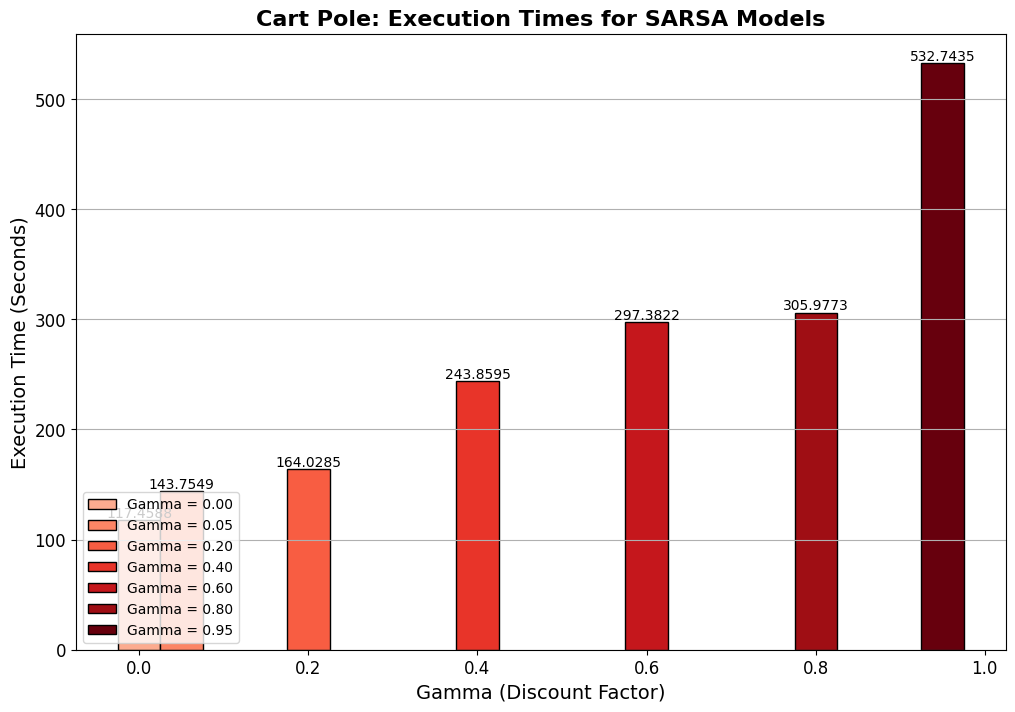

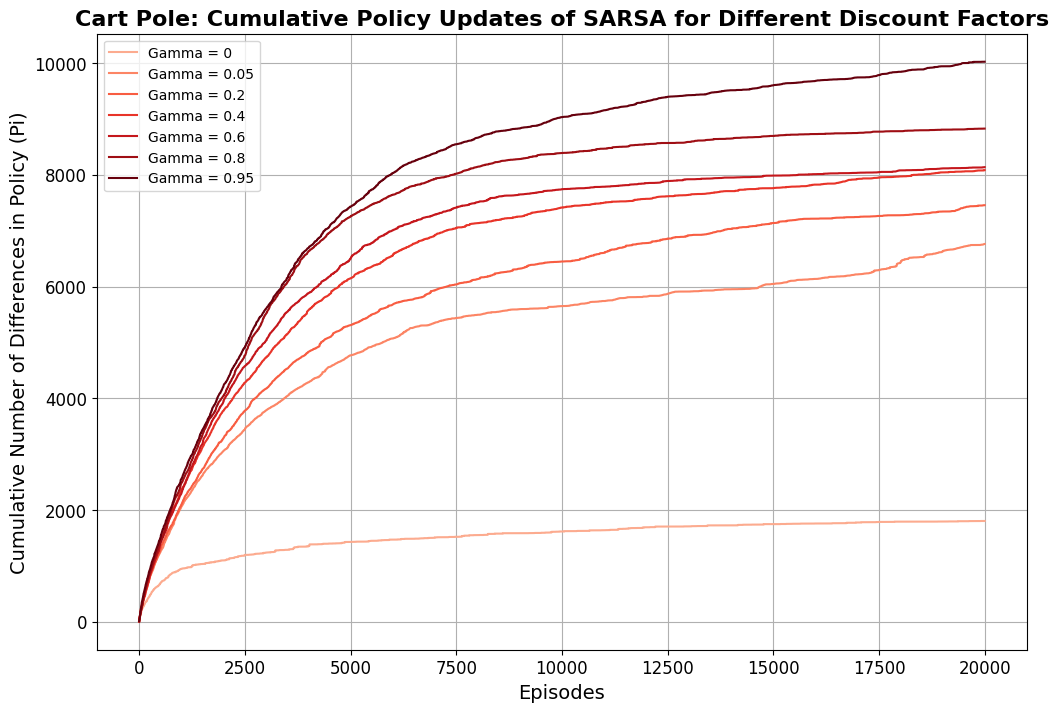


Testing policy for Gamma = 0
Gamma 0: Average reward over 100,000 episodes: 11.4381

Testing policy for Gamma = 0.05
Gamma 0.05: Average reward over 100,000 episodes: 20.9092

Testing policy for Gamma = 0.2
Gamma 0.2: Average reward over 100,000 episodes: 64.0428

Testing policy for Gamma = 0.4
Gamma 0.4: Average reward over 100,000 episodes: 90.8986

Testing policy for Gamma = 0.6
Gamma 0.6: Average reward over 100,000 episodes: 103.5075

Testing policy for Gamma = 0.8
Gamma 0.8: Average reward over 100,000 episodes: 105.9194

Testing policy for Gamma = 0.95
Gamma 0.95: Average reward over 100,000 episodes: 201.7519


In [ ]:
import matplotlib.pyplot as plt
from bettermdptools.envs.cartpole_wrapper import CartpoleWrapper
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.rl import RL  # For SARSA
import gymnasium as gym
import numpy as np
import time  # For tracking execution time

# Parameters for SARSA
gammas = [0, 0.05, 0.2, 0.4, 0.6, 0.8, 0.95]  # Discount factors to evaluate
n_episodes = 20_000  # Maximum number of episodes for training
results = {}
execution_times = []

for gamma in gammas:

    # Track execution time for SARSA
    start_time = time.time()

    # Initialize the Cart Pole environment
    base_env = gym.make('CartPole-v1', render_mode=None)
    cartpole = CartpoleWrapper(base_env,
                               position_bins=10,
                               velocity_bins=10,
                               angular_velocity_bins=10,
                               angular_center_resolution=0.1,
                               angular_outer_resolution=0.2)

    # Run SARSA for the current gamma
    rl = RL(cartpole)
    Q, V, pi, Q_track, pi_track = rl.sarsa(
        gamma=gamma,  # Discount factor
        init_alpha=0.5, min_alpha=0.01, alpha_decay_ratio=0.5,        # Learning rate exponential decay
        init_epsilon=1.0, min_epsilon=0.1, epsilon_decay_ratio=0.9,   # Epsilon-greedy strategy for exploration rate exponential decay
        n_episodes=n_episodes
    )

    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append((gamma, execution_time))  # Store gamma and its execution time

    # Track the number of differences in pi between successive iterations
    differences_in_pi = []
    cum_differences_in_pi = []  # List to store cumulative differences

    for i in range(1, len(pi_track)):
        pi_current = pi_track[i]
        pi_previous = pi_track[i - 1]
        differences = np.sum(pi_current != pi_previous)  # Compute differences
        differences_in_pi.append(differences)
        cumulative_difference = sum(differences_in_pi)
        cum_differences_in_pi.append(cumulative_difference)

    # Store the results
    results[gamma] = {
        "Q": Q,
        "V": V,
        "pi": pi,
        "execution_time": execution_time,
        "differences_in_pi": differences_in_pi,
        "cum_differences_in_pi": cum_differences_in_pi  # Add cumulative differences
    }

# Plot Execution Times
gammas_sorted, times_sorted = zip(*sorted(execution_times, key=lambda x: x[0]))  # Sort by gamma for plotting
bar_width = 0.05  # Adjust the width of the bars
colors = plt.cm.Reds(np.linspace(0.3, 1, len(gammas_sorted)))  # Generate a color map

plt.figure(figsize=(12, 8))
for idx, (gamma, time) in enumerate(zip(gammas_sorted, times_sorted)):
    plt.bar(gamma, time, width=bar_width, label=f"Gamma = {gamma:.2f}", color=colors[idx], edgecolor='black')
    # Display time with 3 decimal places on top of each bar
    plt.text(gamma, time + 0.01, f"{time:.4f}", ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Gamma (Discount Factor)', fontsize=14)
plt.ylabel('Execution Time (Seconds)', fontsize=14)
plt.title('Cart Pole: Execution Times for SARSA Models', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10, loc='lower left')  # Place legend inside the upper-left corner
plt.grid(axis='y')
plt.show()

# Plot the number of cumulative differences in pi for each gamma
plt.figure(figsize=(12, 8))
colors = plt.cm.Reds(np.linspace(0.3, 1, len(gammas)))  # Generate a color map

for idx, gamma in enumerate(gammas):
    plt.plot(range(1, len(results[gamma]["cum_differences_in_pi"]) + 1),
             results[gamma]["cum_differences_in_pi"],
             label=f"Gamma = {gamma}", color=colors[idx])

plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Cumulative Number of Differences in Policy (Pi)', fontsize=14)
plt.title('Cart Pole: Cumulative Policy Updates of SARSA for Different Discount Factors', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.show()

# Test and Compare Policies for Each Gamma
for gamma in gammas:
    print(f"\nTesting policy for Gamma = {gamma}")
    reward_scores = TestEnv.test_env(env=cartpole, n_iters=100_000, render=False, pi=results[gamma]["pi"], user_input=False)
    print(f"Gamma {gamma}: Average reward over 100,000 episodes: {np.mean(reward_scores):.4f}")


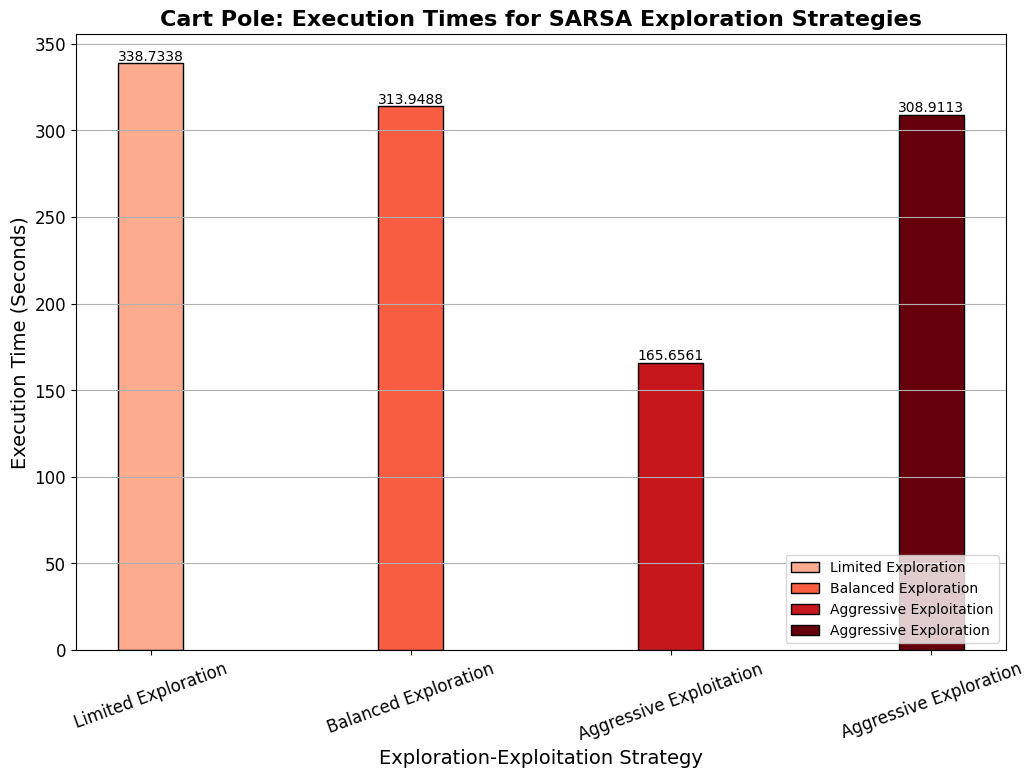

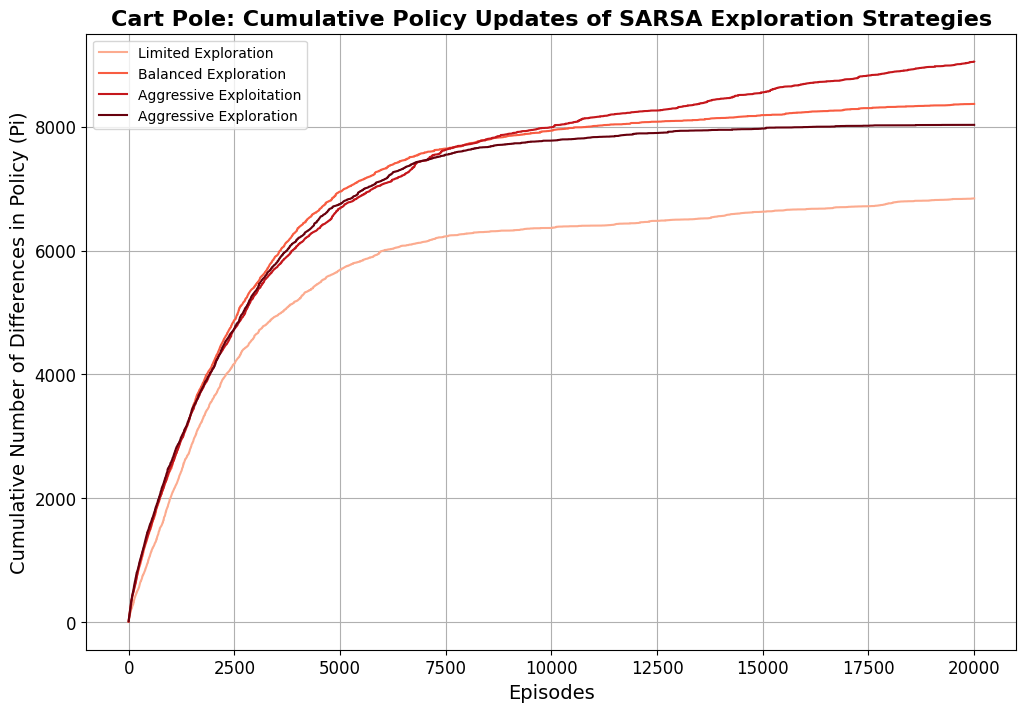


Testing policy for Limited Exploration
Limited Exploration: Average reward over 100,000 episodes: 102.6966

Testing policy for Balanced Exploration
Balanced Exploration: Average reward over 100,000 episodes: 104.9405

Testing policy for Aggressive Exploitation
Aggressive Exploitation: Average reward over 100,000 episodes: 106.6405

Testing policy for Aggressive Exploration
Aggressive Exploration: Average reward over 100,000 episodes: 101.2012


In [ ]:
import matplotlib.pyplot as plt
from bettermdptools.envs.cartpole_wrapper import CartpoleWrapper
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.rl import RL  # For SARSA
import gymnasium as gym
import numpy as np
import time  # For tracking execution time

# Parameters for the experiment
exploration_strategies = [
    {"description": "Limited Exploration", "init_epsilon": 0.5, "min_epsilon": 0.1, "epsilon_decay_ratio": 0.9},  # Limited exploration
    {"description": "Balanced Exploration", "init_epsilon": 1.0, "min_epsilon": 0.1, "epsilon_decay_ratio": 0.9},  # Balanced exploration
    {"description": "Aggressive Exploitation", "init_epsilon": 1.0, "min_epsilon": 0.5, "epsilon_decay_ratio": 0.5},  # Aggressive exploitation
    {"description": "Aggressive Exploration", "init_epsilon": 1.0, "min_epsilon": 0.01, "epsilon_decay_ratio": 0.99},  # Aggressive exploration
]
gamma = 0.6  # Fixed discount factor
n_episodes = 20_000  # Maximum number of episodes for training
results = {}
execution_times = []

for strategy_idx, strategy in enumerate(exploration_strategies):

    # Track execution time for SARSA
    start_time = time.time()

    # Initialize the Cart Pole environment
    base_env = gym.make('CartPole-v1', render_mode=None)
    cartpole = CartpoleWrapper(base_env,
                               position_bins=10,
                               velocity_bins=10,
                               angular_velocity_bins=10,
                               angular_center_resolution=0.1,
                               angular_outer_resolution=0.2)

    # Run SARSA with the current exploration strategy
    rl = RL(cartpole)
    Q, V, pi, Q_track, pi_track = rl.sarsa(
        gamma=gamma,  # Fixed discount factor
        init_alpha=0.5, min_alpha=0.01, alpha_decay_ratio=0.5,        # Learning rate exponential decay
        init_epsilon=strategy["init_epsilon"], min_epsilon=strategy["min_epsilon"], epsilon_decay_ratio=strategy["epsilon_decay_ratio"],  # Exploration-exploitation strategy
        n_episodes=n_episodes
    )

    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append((strategy_idx, execution_time))  # Store index and its execution time

    # Track the number of differences in pi between successive iterations
    differences_in_pi = []
    cum_differences_in_pi = []  # List to store cumulative differences

    for i in range(1, len(pi_track)):
        pi_current = pi_track[i]
        pi_previous = pi_track[i - 1]
        differences = np.sum(pi_current != pi_previous)  # Compute differences
        differences_in_pi.append(differences)
        cumulative_difference = sum(differences_in_pi)
        cum_differences_in_pi.append(cumulative_difference)

    # Store the results
    results[strategy_idx] = {
        "description": strategy["description"],
        "Q": Q,
        "V": V,
        "pi": pi,
        "execution_time": execution_time,
        "differences_in_pi": differences_in_pi,
        "cum_differences_in_pi": cum_differences_in_pi  # Add cumulative differences
    }

# Plot Execution Times
strategies_sorted, times_sorted = zip(*sorted(execution_times, key=lambda x: x[0]))  # Sort by strategy index for plotting
bar_width = 0.25  # Adjust the width of the bars
colors = plt.cm.Reds(np.linspace(0.3, 1, len(strategies_sorted)))  # Generate a color map

plt.figure(figsize=(12, 8))
for idx, (strategy_idx, time) in enumerate(zip(strategies_sorted, times_sorted)):
    description = exploration_strategies[strategy_idx]["description"]
    plt.bar(strategy_idx, time, width=bar_width, label=f"{description}", color=colors[idx], edgecolor='black')
    plt.text(strategy_idx, time + 0.05, f"{time:.4f}", ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Exploration-Exploitation Strategy', fontsize=14)
plt.ylabel('Execution Time (Seconds)', fontsize=14)
plt.title('Cart Pole: Execution Times for SARSA Exploration Strategies', fontsize=16, fontweight='bold')
plt.xticks(ticks=range(len(exploration_strategies)), labels=[strategy["description"] for strategy in exploration_strategies], fontsize=12, rotation=20)
plt.yticks(fontsize=12)
plt.legend(fontsize=10, loc='lower right')
plt.grid(axis='y')
plt.show()
print()

# Plot the cumulative number of differences in pi for each strategy
plt.figure(figsize=(12, 8))
colors = plt.cm.Reds(np.linspace(0.3, 1, len(exploration_strategies)))  # Generate a color map

for idx, strategy_idx in enumerate(strategies_sorted):
    description = exploration_strategies[strategy_idx]["description"]
    plt.plot(range(1, len(results[strategy_idx]["cum_differences_in_pi"]) + 1),
             results[strategy_idx]["cum_differences_in_pi"],
             label=f"{description}", color=colors[idx])

plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Cumulative Number of Differences in Policy (Pi)', fontsize=14)
plt.title('Cart Pole: Cumulative Policy Updates of SARSA Exploration Strategies', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.show()

# Test and Compare Policies for Each Strategy
for strategy_idx, strategy in enumerate(exploration_strategies):
    description = strategy["description"]
    print(f"\nTesting policy for {description}")
    reward_scores = TestEnv.test_env(env=cartpole, n_iters=100_000, render=False, pi=results[strategy_idx]["pi"], user_input=False)
    print(f"{description}: Average reward over 100,000 episodes: {np.mean(reward_scores):.4f}")


 61%|██████    | 12136/20000 [02:30<02:49, 46.42it/s]/usr/local/lib/python3.10/dist-packages/bettermdptools/algorithms/rl.py:296: UserWarning: Episode was truncated.  TD target value may be incorrect.
  warnings.warn("Episode was truncated.  TD target value may be incorrect.")


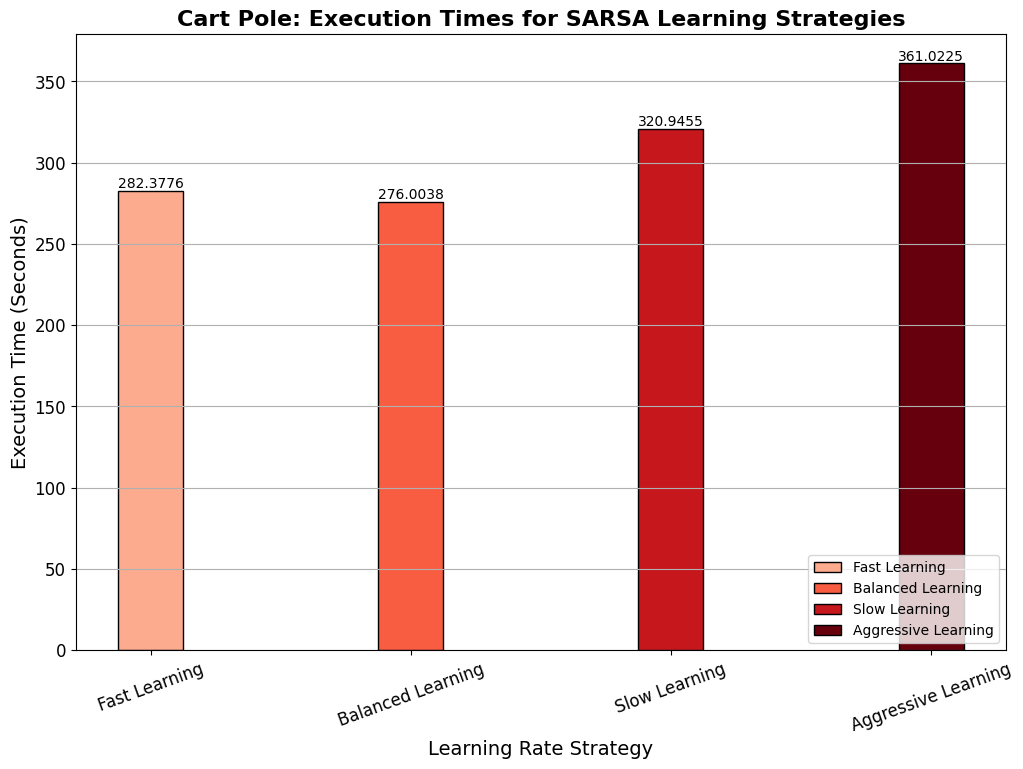

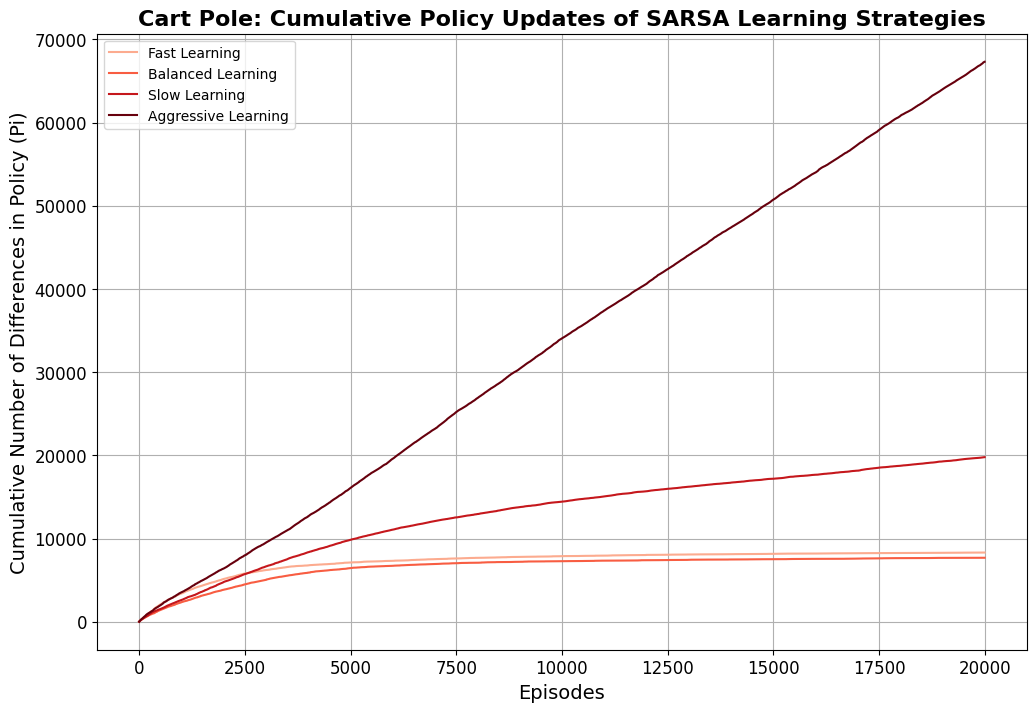


Testing policy for Fast Learning
Fast Learning: Average reward over 100,000 episodes: 94.9689

Testing policy for Balanced Learning
Balanced Learning: Average reward over 100,000 episodes: 88.5315

Testing policy for Slow Learning
Slow Learning: Average reward over 100,000 episodes: 101.9854

Testing policy for Aggressive Learning
Aggressive Learning: Average reward over 100,000 episodes: 158.8102


In [ ]:
import matplotlib.pyplot as plt
from bettermdptools.envs.cartpole_wrapper import CartpoleWrapper
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.rl import RL  # For SARSA
import gymnasium as gym
import numpy as np
import time  # For tracking execution time

# Parameters for the experiment
alpha_strategies = [
    {"description": "Fast Learning", "init_alpha": 0.9, "min_alpha": 0.01, "alpha_decay_ratio": 0.3},  # High initial learning rate, fast decay
    {"description": "Balanced Learning", "init_alpha": 0.5, "min_alpha": 0.01, "alpha_decay_ratio": 0.5},  # Moderate learning rate and decay
    {"description": "Slow Learning", "init_alpha": 0.5, "min_alpha": 0.1, "alpha_decay_ratio": 0.8},  # Slower decay with higher minimum learning rate
    {"description": "Aggressive Learning", "init_alpha": 0.9, "min_alpha": 0.5, "alpha_decay_ratio": 0.1},  # Very high initial learning rate, very slow decay
]
gamma = 0.6  # Fixed discount factor
n_episodes = 20_000  # Maximum number of episodes for training
results = {}
execution_times = []

for strategy_idx, strategy in enumerate(alpha_strategies):

    # Track execution time for SARSA
    start_time = time.time()

    # Initialize the Cart Pole environment
    base_env = gym.make('CartPole-v1', render_mode=None)
    cartpole = CartpoleWrapper(base_env,
                               position_bins=10,
                               velocity_bins=10,
                               angular_velocity_bins=10,
                               angular_center_resolution=0.1,
                               angular_outer_resolution=0.2)

    # Run SARSA with the current learning rate strategy
    rl = RL(cartpole)
    Q, V, pi, Q_track, pi_track = rl.sarsa(
        gamma=gamma,  # Fixed discount factor
        init_alpha=strategy["init_alpha"], min_alpha=strategy["min_alpha"], alpha_decay_ratio=strategy["alpha_decay_ratio"],  # Learning rate strategy
        init_epsilon=1.0, min_epsilon=0.1, epsilon_decay_ratio=0.9,  # Fixed exploration strategy for all
        n_episodes=n_episodes
    )

    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append((strategy_idx, execution_time))  # Store index and its execution time

    # Track the number of differences in pi between successive iterations
    differences_in_pi = []
    cum_differences_in_pi = []  # List to store cumulative differences

    for i in range(1, len(pi_track)):
        pi_current = pi_track[i]
        pi_previous = pi_track[i - 1]
        differences = np.sum(pi_current != pi_previous)  # Compute differences
        differences_in_pi.append(differences)
        cumulative_difference = sum(differences_in_pi)
        cum_differences_in_pi.append(cumulative_difference)

    # Store the results
    results[strategy_idx] = {
        "description": strategy["description"],
        "Q": Q,
        "V": V,
        "pi": pi,
        "execution_time": execution_time,
        "differences_in_pi": differences_in_pi,
        "cum_differences_in_pi": cum_differences_in_pi  # Add cumulative differences
    }

# Plot Execution Times
strategies_sorted, times_sorted = zip(*sorted(execution_times, key=lambda x: x[0]))  # Sort by strategy index for plotting
bar_width = 0.25  # Adjust the width of the bars
colors = plt.cm.Reds(np.linspace(0.3, 1, len(strategies_sorted)))  # Generate a color map

plt.figure(figsize=(12, 8))
for idx, (strategy_idx, time) in enumerate(zip(strategies_sorted, times_sorted)):
    description = alpha_strategies[strategy_idx]["description"]
    plt.bar(strategy_idx, time, width=bar_width, label=f"{description}", color=colors[idx], edgecolor='black')
    plt.text(strategy_idx, time + 0.05, f"{time:.4f}", ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Learning Rate Strategy', fontsize=14)
plt.ylabel('Execution Time (Seconds)', fontsize=14)
plt.title('Cart Pole: Execution Times for SARSA Learning Strategies', fontsize=16, fontweight='bold')
plt.xticks(ticks=range(len(alpha_strategies)), labels=[strategy["description"] for strategy in alpha_strategies], fontsize=12, rotation=20)
plt.yticks(fontsize=12)
plt.legend(fontsize=10, loc='lower right')
plt.grid(axis='y')
plt.show()
print()

# Plot the cumulative number of differences in pi for each strategy
plt.figure(figsize=(12, 8))
colors = plt.cm.Reds(np.linspace(0.3, 1, len(alpha_strategies)))  # Generate a color map

for idx, strategy_idx in enumerate(strategies_sorted):
    description = alpha_strategies[strategy_idx]["description"]
    plt.plot(range(1, len(results[strategy_idx]["cum_differences_in_pi"]) + 1),
             results[strategy_idx]["cum_differences_in_pi"],
             label=f"{description}", color=colors[idx])

plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Cumulative Number of Differences in Policy (Pi)', fontsize=14)
plt.title('Cart Pole: Cumulative Policy Updates of SARSA Learning Strategies', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.show()

# Test and Compare Policies for Each Strategy
for strategy_idx, strategy in enumerate(alpha_strategies):
    description = strategy["description"]
    print(f"\nTesting policy for {description}")
    reward_scores = TestEnv.test_env(env=cartpole, n_iters=100_000, render=False, pi=results[strategy_idx]["pi"], user_input=False)
    print(f"{description}: Average reward over 100,000 episodes: {np.mean(reward_scores):.4f}")


#### Combined RL algorithms to Solve Cart Pole problem

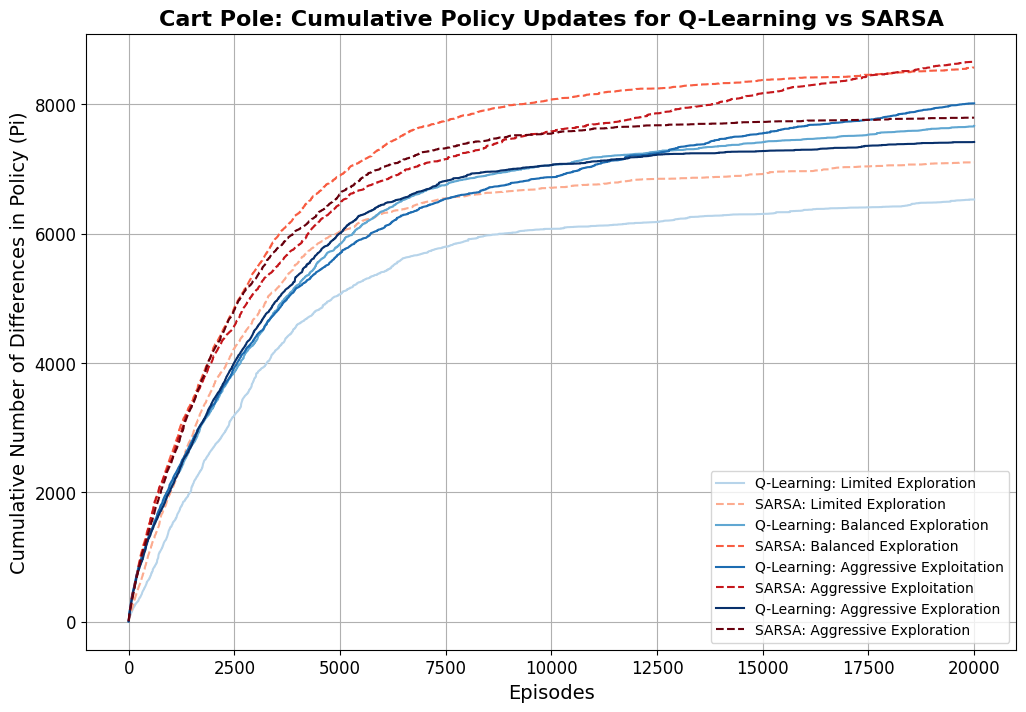

Comparison of Average Rewards:

Limited Exploration:
  Q-Learning Average Reward: 9.9286
  SARSA Average Reward: 9.4656

Balanced Exploration:
  Q-Learning Average Reward: 9.9464
  SARSA Average Reward: 9.3880

Aggressive Exploitation:
  Q-Learning Average Reward: 10.6331
  SARSA Average Reward: 10.5664

Aggressive Exploration:
  Q-Learning Average Reward: 9.7605
  SARSA Average Reward: 9.4067


In [ ]:
import matplotlib.pyplot as plt
from bettermdptools.envs.cartpole_wrapper import CartpoleWrapper
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.rl import RL
import gymnasium as gym
import numpy as np
import time

# Parameters for the experiment
exploration_strategies = [
    {"description": "Limited Exploration", "init_epsilon": 0.5, "min_epsilon": 0.1, "epsilon_decay_ratio": 0.9},
    {"description": "Balanced Exploration", "init_epsilon": 1.0, "min_epsilon": 0.1, "epsilon_decay_ratio": 0.9},
    {"description": "Aggressive Exploitation", "init_epsilon": 1.0, "min_epsilon": 0.5, "epsilon_decay_ratio": 0.5},
    {"description": "Aggressive Exploration", "init_epsilon": 1.0, "min_epsilon": 0.01, "epsilon_decay_ratio": 0.99},
]
gamma = 0.6  # Fixed discount factor
n_episodes = 20_000  # Maximum number of episodes for training

# Initialize results
q_learning_results = {}
sarsa_results = {}

# Function to run Q-Learning or SARSA
def run_experiment(algorithm, strategies, result_store):
    execution_times = []
    for strategy_idx, strategy in enumerate(strategies):
        start_time = time.time()
        base_env = gym.make('CartPole-v1', render_mode=None)
        cartpole = CartpoleWrapper(base_env,
                                   position_bins=10,
                                   velocity_bins=10,
                                   angular_velocity_bins=10,
                                   angular_center_resolution=0.1,
                                   angular_outer_resolution=0.2)
        rl = RL(cartpole)
        if algorithm == "q_learning":
            Q, V, pi, Q_track, pi_track = rl.q_learning(
                gamma=gamma,
                init_alpha=0.5, min_alpha=0.01, alpha_decay_ratio=0.5,
                init_epsilon=strategy["init_epsilon"], min_epsilon=strategy["min_epsilon"], epsilon_decay_ratio=strategy["epsilon_decay_ratio"],
                n_episodes=n_episodes
            )
        elif algorithm == "sarsa":
            Q, V, pi, Q_track, pi_track = rl.sarsa(
                gamma=gamma,
                init_alpha=0.5, min_alpha=0.01, alpha_decay_ratio=0.5,
                init_epsilon=strategy["init_epsilon"], min_epsilon=strategy["min_epsilon"], epsilon_decay_ratio=strategy["epsilon_decay_ratio"],
                n_episodes=n_episodes
            )
        else:
            raise ValueError("Invalid algorithm. Choose 'q_learning' or 'sarsa'.")
        execution_time = time.time() - start_time
        execution_times.append((strategy_idx, execution_time))
        differences_in_pi = []
        cum_differences_in_pi = []
        for i in range(1, len(pi_track)):
            pi_current = pi_track[i]
            pi_previous = pi_track[i - 1]
            differences = np.sum(pi_current != pi_previous)
            differences_in_pi.append(differences)
            cum_differences_in_pi.append(sum(differences_in_pi))
        result_store[strategy_idx] = {
            "description": strategy["description"],
            "Q": Q,
            "V": V,
            "pi": pi,
            "execution_time": execution_time,
            "differences_in_pi": differences_in_pi,
            "cum_differences_in_pi": cum_differences_in_pi,
        }
    return execution_times

# Run experiments
q_learning_execution_times = run_experiment("q_learning", exploration_strategies, q_learning_results)
sarsa_execution_times = run_experiment("sarsa", exploration_strategies, sarsa_results)

# Plot cumulative differences for both algorithms
plt.figure(figsize=(12, 8))
q_colors = plt.cm.Blues(np.linspace(0.3, 1, len(exploration_strategies)))
sarsa_colors = plt.cm.Reds(np.linspace(0.3, 1, len(exploration_strategies)))

for idx, strategy_idx in enumerate(range(len(exploration_strategies))):
    description = exploration_strategies[strategy_idx]["description"]
    plt.plot(range(1, len(q_learning_results[strategy_idx]["cum_differences_in_pi"]) + 1),
             q_learning_results[strategy_idx]["cum_differences_in_pi"],
             label=f"Q-Learning: {description}", color=q_colors[idx], linestyle='-')
    plt.plot(range(1, len(sarsa_results[strategy_idx]["cum_differences_in_pi"]) + 1),
             sarsa_results[strategy_idx]["cum_differences_in_pi"],
             label=f"SARSA: {description}", color=sarsa_colors[idx], linestyle='--')

plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Cumulative Number of Differences in Policy (Pi)', fontsize=14)
plt.title('Cart Pole: Cumulative Policy Updates for Q-Learning vs SARSA', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.show()

# Test and Compare Policies for Each Strategy
print("Comparison of Average Rewards:")
for strategy_idx, strategy in enumerate(exploration_strategies):
    description = strategy["description"]
    base_env = gym.make('CartPole-v1', render_mode=None)
    cartpole = CartpoleWrapper(base_env,
                               position_bins=10,
                               velocity_bins=10,
                               angular_velocity_bins=10,
                               angular_center_resolution=0.1,
                               angular_outer_resolution=0.5)
    q_learning_rewards = TestEnv.test_env(env=cartpole, n_iters=10_000, render=False, pi=q_learning_results[strategy_idx]["pi"], user_input=False)
    sarsa_rewards = TestEnv.test_env(env=cartpole, n_iters=10_000, render=False, pi=sarsa_results[strategy_idx]["pi"], user_input=False)
    print(f"\n{description}:")
    print(f"  Q-Learning Average Reward: {np.mean(q_learning_rewards):.4f}")
    print(f"  SARSA Average Reward: {np.mean(sarsa_rewards):.4f}")


 75%|███████▌  | 7501/10000 [01:55<01:00, 41.62it/s]/usr/local/lib/python3.10/dist-packages/bettermdptools/algorithms/rl.py:183: UserWarning: Episode was truncated.  TD target value may be incorrect.
  warnings.warn("Episode was truncated.  TD target value may be incorrect.")
 95%|█████████▍| 9476/10000 [02:08<00:12, 43.16it/s]/usr/local/lib/python3.10/dist-packages/bettermdptools/algorithms/rl.py:296: UserWarning: Episode was truncated.  TD target value may be incorrect.
  warnings.warn("Episode was truncated.  TD target value may be incorrect.")


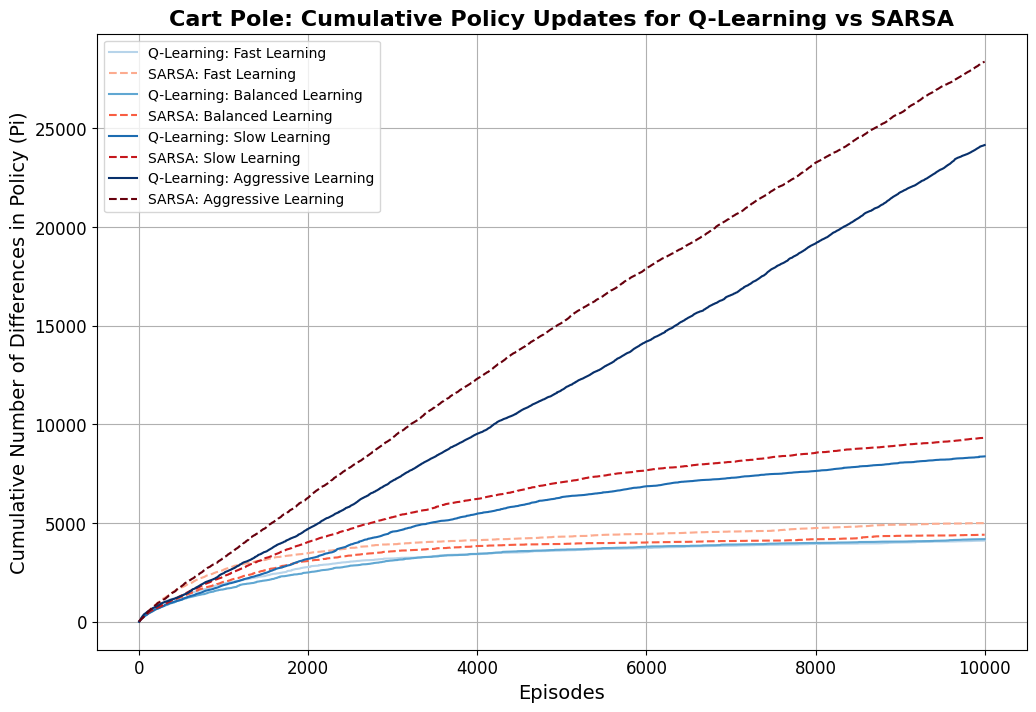

Comparison of Average Rewards:

Fast Learning:
  Q-Learning Average Reward: 88.6016
  SARSA Average Reward: 133.3592

Balanced Learning:
  Q-Learning Average Reward: 99.7909
  SARSA Average Reward: 94.5557

Slow Learning:
  Q-Learning Average Reward: 97.5509
  SARSA Average Reward: 102.9527

Aggressive Learning:
  Q-Learning Average Reward: 164.1965
  SARSA Average Reward: 102.5984


In [ ]:
import matplotlib.pyplot as plt
from bettermdptools.envs.cartpole_wrapper import CartpoleWrapper
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.rl import RL
import gymnasium as gym
import numpy as np
import time

# Parameters for the experiment
alpha_strategies = [
    {"description": "Fast Learning", "init_alpha": 0.9, "min_alpha": 0.01, "alpha_decay_ratio": 0.3},  # High initial learning rate, fast decay
    {"description": "Balanced Learning", "init_alpha": 0.5, "min_alpha": 0.01, "alpha_decay_ratio": 0.5},  # Moderate learning rate and decay
    {"description": "Slow Learning", "init_alpha": 0.5, "min_alpha": 0.1, "alpha_decay_ratio": 0.8},  # Slower decay with higher minimum learning rate
    {"description": "Aggressive Learning", "init_alpha": 0.9, "min_alpha": 0.5, "alpha_decay_ratio": 0.1},  # Very high initial learning rate, very slow decay
]
gamma = 0.6  # Fixed discount factor
n_episodes = 10_000  # Maximum number of episodes for training

# Initialize results
q_learning_results = {}
sarsa_results = {}

# Function to run Q-Learning or SARSA
def run_experiment(algorithm, strategies, result_store):
    execution_times = []
    for strategy_idx, strategy in enumerate(strategies):
        start_time = time.time()
        base_env = gym.make('CartPole-v1', render_mode=None)
        cartpole = CartpoleWrapper(base_env,
                                   position_bins=10,
                                   velocity_bins=10,
                                   angular_velocity_bins=10,
                                   angular_center_resolution=0.1,
                                   angular_outer_resolution=0.5)
        rl = RL(cartpole)
        if algorithm == "q_learning":
            Q, V, pi, Q_track, pi_track = rl.q_learning(
                gamma=gamma,
                init_alpha=strategy["init_alpha"], min_alpha=strategy["min_alpha"], alpha_decay_ratio=strategy["alpha_decay_ratio"],
                init_epsilon=1.0, min_epsilon=0.1, epsilon_decay_ratio=0.9,
                n_episodes=n_episodes
            )
        elif algorithm == "sarsa":
            Q, V, pi, Q_track, pi_track = rl.sarsa(
                gamma=gamma,
                init_alpha=strategy["init_alpha"], min_alpha=strategy["min_alpha"], alpha_decay_ratio=strategy["alpha_decay_ratio"],
                init_epsilon=1.0, min_epsilon=0.1, epsilon_decay_ratio=0.9,
                n_episodes=n_episodes
            )
        else:
            raise ValueError("Invalid algorithm. Choose 'q_learning' or 'sarsa'.")
        execution_time = time.time() - start_time
        execution_times.append((strategy_idx, execution_time))
        differences_in_pi = []
        cum_differences_in_pi = []
        for i in range(1, len(pi_track)):
            pi_current = pi_track[i]
            pi_previous = pi_track[i - 1]
            differences = np.sum(pi_current != pi_previous)
            differences_in_pi.append(differences)
            cum_differences_in_pi.append(sum(differences_in_pi))
        result_store[strategy_idx] = {
            "description": strategy["description"],
            "Q": Q,
            "V": V,
            "pi": pi,
            "execution_time": execution_time,
            "differences_in_pi": differences_in_pi,
            "cum_differences_in_pi": cum_differences_in_pi,
        }
    return execution_times

# Run experiments for Q-Learning and SARSA
q_learning_execution_times = run_experiment("q_learning", alpha_strategies, q_learning_results)
sarsa_execution_times = run_experiment("sarsa", alpha_strategies, sarsa_results)

# Plot cumulative differences for both algorithms
plt.figure(figsize=(12, 8))
q_colors = plt.cm.Blues(np.linspace(0.3, 1, len(alpha_strategies)))
sarsa_colors = plt.cm.Reds(np.linspace(0.3, 1, len(alpha_strategies)))

for idx, strategy_idx in enumerate(range(len(alpha_strategies))):
    description = alpha_strategies[strategy_idx]["description"]
    plt.plot(range(1, len(q_learning_results[strategy_idx]["cum_differences_in_pi"]) + 1),
             q_learning_results[strategy_idx]["cum_differences_in_pi"],
             label=f"Q-Learning: {description}", color=q_colors[idx], linestyle='-')
    plt.plot(range(1, len(sarsa_results[strategy_idx]["cum_differences_in_pi"]) + 1),
             sarsa_results[strategy_idx]["cum_differences_in_pi"],
             label=f"SARSA: {description}", color=sarsa_colors[idx], linestyle='--')

plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Cumulative Number of Differences in Policy (Pi)', fontsize=14)
plt.title('Cart Pole: Cumulative Policy Updates for Q-Learning vs SARSA', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.show()

# Test and Compare Policies for Each Strategy
print("Comparison of Average Rewards:")
for strategy_idx, strategy in enumerate(alpha_strategies):
    description = strategy["description"]
    base_env = gym.make('CartPole-v1', render_mode=None)
    cartpole = CartpoleWrapper(base_env,
                               position_bins=10,
                               velocity_bins=10,
                               angular_velocity_bins=10,
                               angular_center_resolution=0.1,
                               angular_outer_resolution=0.5)
    q_learning_rewards = TestEnv.test_env(env=cartpole, n_iters=10_000, render=False, pi=q_learning_results[strategy_idx]["pi"], user_input=False)
    sarsa_rewards = TestEnv.test_env(env=cartpole, n_iters=10_000, render=False, pi=sarsa_results[strategy_idx]["pi"], user_input=False)
    print(f"\n{description}:")
    print(f"  Q-Learning Average Reward: {np.mean(q_learning_rewards):.4f}")
    print(f"  SARSA Average Reward: {np.mean(sarsa_rewards):.4f}")
